In [70]:
import time
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.utils import resample

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from cycler import cycler

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(20, 10))
    plt.title(title, fontsize=20, fontweight='bold')
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize=16)
    plt.ylabel("Score", fontsize=16)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# grid_param_2 is the one you do want to plot on the x-axis (e.g max depth)
def plot_grid_search_2(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, set_x_log=False):
    # Get Test Scores Mean and std for each grid search
    scores_mean = np.array(cv_results['mean_test_score']).reshape(len(grid_param_2),len(grid_param_1))
    scores_sd = np.array(cv_results['std_test_score']).reshape(len(grid_param_2),len(grid_param_1))

    times_mean = np.array(cv_results['mean_fit_time']).reshape(len(grid_param_2), len(grid_param_1))
    # Plot Grid search scores
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_1):
        ax1.plot(grid_param_2, scores_mean[:,idx], '--', label= name_param_1 + ': ' + str(val))
        ax1.plot(grid_param_2, scores_mean[:,idx], '*')

        
    ax1.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax1.set_xlabel(name_param_2, fontsize=16)
    ax1.set_ylabel('CV Average Score', fontsize=16)
#     ax1.legend(loc="best", fontsize=15)
    ax1.grid('on')
    if set_x_log:
        ax1.set_xscale('log')
    
    for idx, val in enumerate(grid_param_1):
        ax2.plot(grid_param_2, times_mean[:,idx], '--', label= name_param_1 + ': ' + str(val))
        ax2.plot(grid_param_2, times_mean[:,idx], '*')
        
    ax2.set_title("Fit times", fontsize=20, fontweight='bold')
    ax2.set_xlabel(name_param_2, fontsize=16)
    ax2.set_ylabel('Seconds', fontsize=16)
    ax2.legend(loc="best", fontsize=12)
    ax2.grid('on')
    if set_x_log:
        ax2.set_xscale('log')


# plots in log
def plot_grid_search(cv_results, grid_param, name_param, set_x_log=False):
    test_scores_mean = np.array(cv_results['mean_test_score'])
    train_scores_mean = np.array(cv_results['mean_train_score'])
    fit_times_mean = np.array(cv_results['mean_fit_time'])
    
    print(test_scores_mean)
    print(train_scores_mean)
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.plot(grid_param, test_scores_mean, '--', label=  'test set')
    ax1.plot(grid_param, train_scores_mean, '--', label= 'train set')
    ax1.plot(grid_param, test_scores_mean, '*')
    ax1.plot(grid_param, train_scores_mean, '*')
    ax1.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax1.set_xlabel(name_param, fontsize=16)
    ax1.set_ylabel('Score', fontsize=16)
    ax1.legend(loc="best", fontsize=15)
    if set_x_log:
        ax1.set_xscale('log')
        
    ax2.plot(grid_param, fit_times_mean, '--')
    ax2.plot(grid_param, fit_times_mean, '*')
    ax2.set_title("Fit times", fontsize=20, fontweight='bold')
    ax2.set_xlabel(name_param, fontsize=16)
    ax2.set_ylabel('Seconds', fontsize=16)
    ax2.legend(loc="best", fontsize=15)
    ax2.grid('on')
    if set_x_log:
        ax2.set_xscale('log')



In [41]:
# want feature with more features than samples 
import pickle
with open("pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)
train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]
train_labels_one_hot = data[4]
test_labels_one_hot = data[5]
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

train_labels.shape
X_train = train_imgs
y_train = train_labels.reshape(-1)
X_test = test_imgs
y_test = test_labels.reshape(-1)

In [48]:
len(X_test)

2115

In [31]:
%time (MLPClassifier(activation='identity', solver='sgd', learning_rate='adaptive', early_stopping=True, max_iter=10000, shuffle=False, alpha=0.0, verbose=True, random_state=123)).fit(train_imgs, train_labels.reshape(-1))



Iteration 1, loss = 0.24284161, Validation score: 0.991318, Training score: 0.994736
Validation score: 0.991318
Iteration 2, loss = 0.06069319, Validation score: 0.992897, Training score: 0.996052
Validation score: 0.992897
Iteration 3, loss = 0.03993699, Validation score: 0.992897, Training score: 0.996578
Validation score: 0.992897
Iteration 4, loss = 0.03087171, Validation score: 0.992897, Training score: 0.996754
Validation score: 0.992897
Iteration 5, loss = 0.02560257, Validation score: 0.994475, Training score: 0.997192
Validation score: 0.994475
Iteration 6, loss = 0.02214084, Validation score: 0.994475, Training score: 0.997456
Validation score: 0.994475
Iteration 7, loss = 0.01968944, Validation score: 0.994475, Training score: 0.997456
Validation score: 0.994475
Iteration 8, loss = 0.01782437, Validation score: 0.994475, Training score: 0.997719
Validation score: 0.994475
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rat

MLPClassifier(activation='identity', alpha=0.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=False, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [59]:
hidden_layer_sizes = [(2,), (100,), (5, 2), (100,10), (100, 50, 5)]
learning_rate_inits = [1e-2, 1e-4, 1e-6]

# Set the parameters by cross-validation
tuned_parameters = [{'hidden_layer_sizes': hidden_layer_sizes,
                     'learning_rate_init': learning_rate_inits}]


estimator = MLPClassifier(activation='identity', solver='sgd', learning_rate='adaptive', early_stopping=False, alpha=0.0, verbose=False, max_iter=5000, random_state=123)


scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    gs = GridSearchCV(estimator, tuned_parameters, cv=5,
                       scoring=score) # TODO check of 
    gs.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(gs.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, gs.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()





# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'hidden_layer_sizes': (100, 10), 'learning_rate_init': 0.01}

Grid scores on development set:

0.998 (+/-0.001) for {'hidden_layer_sizes': (2,), 'learning_rate_init': 0.01}
0.997 (+/-0.002) for {'hidden_layer_sizes': (2,), 'learning_rate_init': 0.0001}
0.990 (+/-0.003) for {'hidden_layer_sizes': (2,), 'learning_rate_init': 1e-06}
0.998 (+/-0.001) for {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}
0.997 (+/-0.001) for {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0001}
0.993 (+/-0.003) for {'hidden_layer_sizes': (100,), 'learning_rate_init': 1e-06}
0.998 (+/-0.001) for {'hidden_layer_sizes': (5, 2), 'learning_rate_init': 0.01}
0.997 (+/-0.002) for {'hidden_layer_sizes': (5, 2), 'learning_rate_init': 0.0001}
0.993 (+/-0.003) for {'hidden_layer_sizes': (5, 2), 'learning_rate_init': 1e-06}
0.999 (+/-0.001) for {'hidden_layer_sizes': (100, 10), 'learning_rate_init': 0.01}
0.998 (+/-0

In [61]:
# MLPClassifier(activation='identity', solver='sgd', learning_rate='adaptive', early_stopping=False, max_iter=10000, shuffle=False, alpha=0.0, verbose=True, random_state=123)
gs.best_estimator_


MLPClassifier(activation='identity', alpha=0.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 10), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:567: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:567: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:567: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:567: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged ye

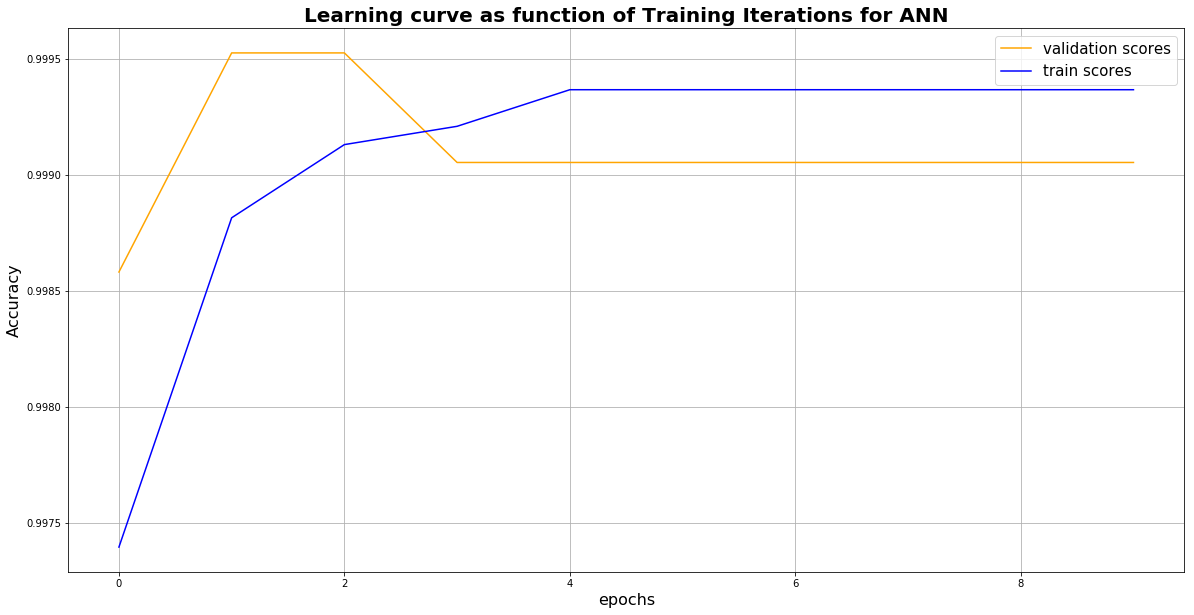

In [68]:
# pick the best parameter for the model and plot learning curve as a function of iterations
estimator = gs.best_estimator_
epochs = 50
train_accuracies = []
test_accuracies = []
for i in range(1, 50,5):
    estimator.set_params(max_iter=i) #  fresh untrained model
    estimator.fit(X_train, y_train)
    test_accuracies.append(estimator.score(X_test, y_test))
    train_accuracies.append(estimator.score(X_train, y_train))

plt.figure(figsize=(20, 10))
plt.title('Learning curve as function of Training Iterations for ANN', fontsize=20, fontweight='bold')
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('epochs', fontsize=16)
plt.plot(test_accuracies, color='orange', label='validation scores')
plt.plot(train_accuracies, color='blue', label='train scores')
plt.grid(True)
plt.legend(loc='best', fontsize=15)
plt.show()


/Users/whe318/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


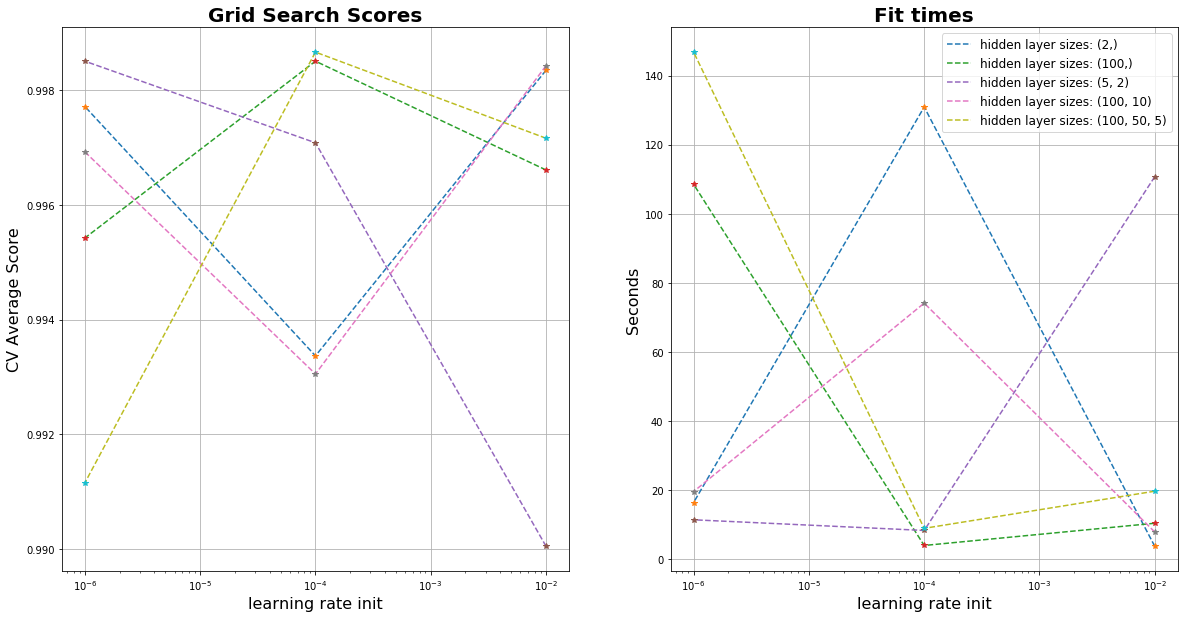

In [67]:
# revise legend placement and do this next
plot_grid_search_2(gs.cv_results_, tuned_parameters[0]['hidden_layer_sizes'], tuned_parameters[0]['learning_rate_init'], 'hidden layer sizes', 'learning rate init', set_x_log=True)

# plot_grid_search(gs.cv_results_, tuned_parameters[0]['hidden_layer_sizes'], 'hidden layer sizes', set_x_log=False)


In [152]:
# cv_results = gs.cv_results_

# plt.figure(figsize=(20, 10))
# test_scores_mean = np.array(cv_results['mean_test_score'])
# plt.bar([i for i in range(len(test_scores_mean))], test_scores_mean)
# plt.xticks([i for i in range(len(test_scores_mean))], tuple(hidden_layer_sizes))
# plt.title("Grid Search Scores", fontsize=20, fontweight='bold')
# plt.xlabel('Learning rate inits')
# plt.ylabel('Mean Test Score')



# plt.figure(figsize=(20, 10))
# train_scores_mean = np.array(cv_results['mean_train_score'])
# plt.bar([i for i in range(len(train_scores_mean))], train_scores_mean)
# plt.ylabel('Mean Train Score', fontsize=20)
# plt.xlabel('Learning rate inits')
# plt.xticks([i for i in range(len(train_scores_mean))], tuple(hidden_layer_sizes))
# plt.show()

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


inner train size: 1266, inner test size: 11399


/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:567: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


inner train size: 4115, inner test size: 8550
inner train size: 6965, inner test size: 5700
inner train size: 9814, inner test size: 2851
inner train size: 12663, inner test size: 2


/Users/whe318/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:567: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:567: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:567: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the opti

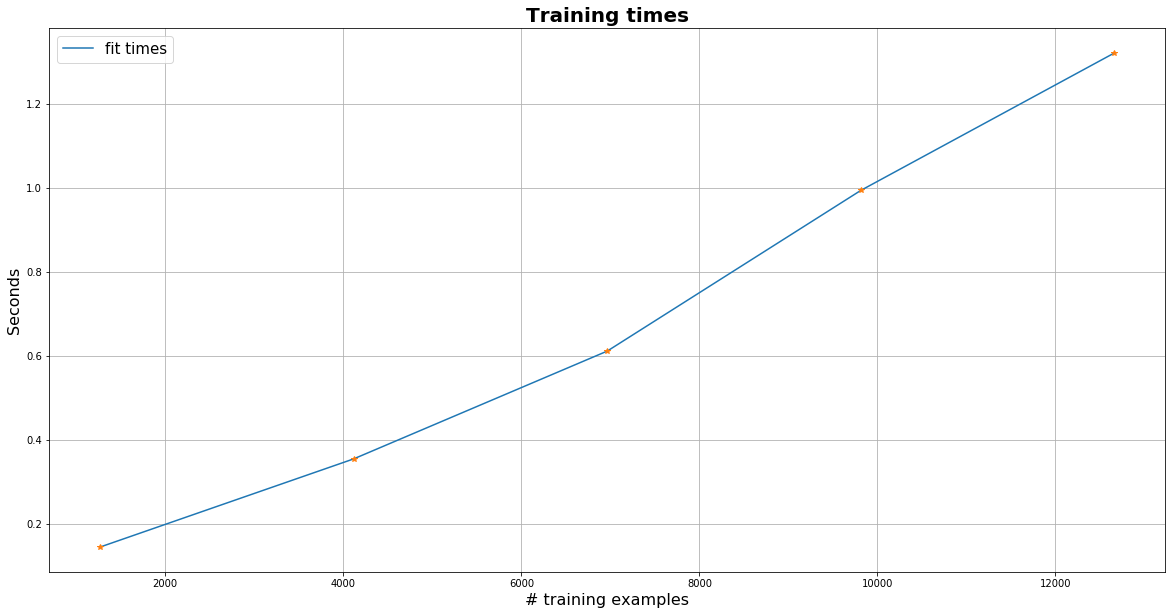

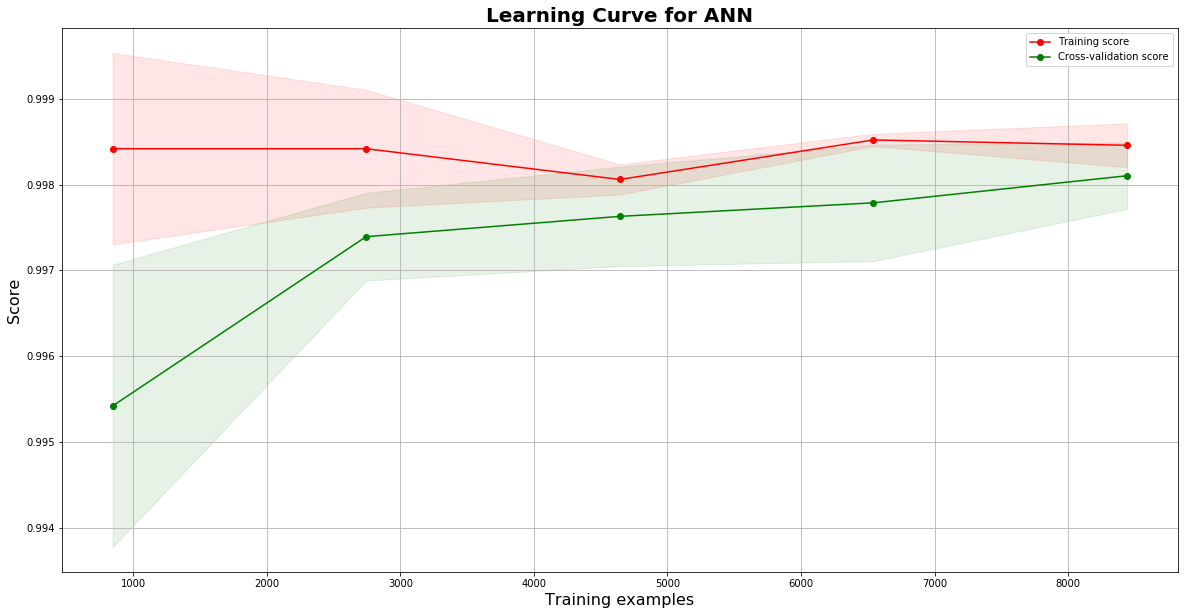

In [72]:
# pick the best stopping interation for ANN and plot learning curve for it
estimator = gs.best_estimator_.set_params(max_iter=6)

# get train times for each training set size
X_test, y_test
train_sizes = []
train_scores=[]
test_scores=[]
fit_times=[]
for frac in np.linspace(0.1, 0.9999, 5):
    inner_train_X, inner_test_X, inner_train_y, inner_test_y = train_test_split(X_train, y_train, train_size=frac, shuffle=True, stratify=y_train)
    print("inner train size: {}, inner test size: {}".format(len(inner_train_X), len(inner_test_X)))
    train_sizes.append(len(inner_train_X))
    start = time.time()
    estimator.fit(inner_train_X, inner_train_y)
    fit_times.append(time.time() - start)
    train_scores.append(estimator.score(inner_train_X, inner_train_y))
    test_scores.append(estimator.score(X_test, y_test)) # score on the original test set
    

# associate the train times with the learning curve
plt.figure(figsize=(20,10))
plt.plot(train_sizes, fit_times, label='fit times')
plt.plot(train_sizes, fit_times, '*')
plt.ylabel('Seconds', fontsize=16)
plt.xlabel('# training examples', fontsize=16)
plt.title('Training times', fontsize=20, fontweight='bold')
plt.legend(loc='best', fontsize=15)
plt.grid('on')

title = 'Learning Curve for ANN'
plot_learning_curve(estimator, title, X_train, y_train)
plt.show() 



/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


inner train size: 78, inner test size: 703
inner train size: 234, inner test size: 547
inner train size: 390, inner test size: 391
inner train size: 546, inner test size: 235
inner train size: 702, inner test size: 79


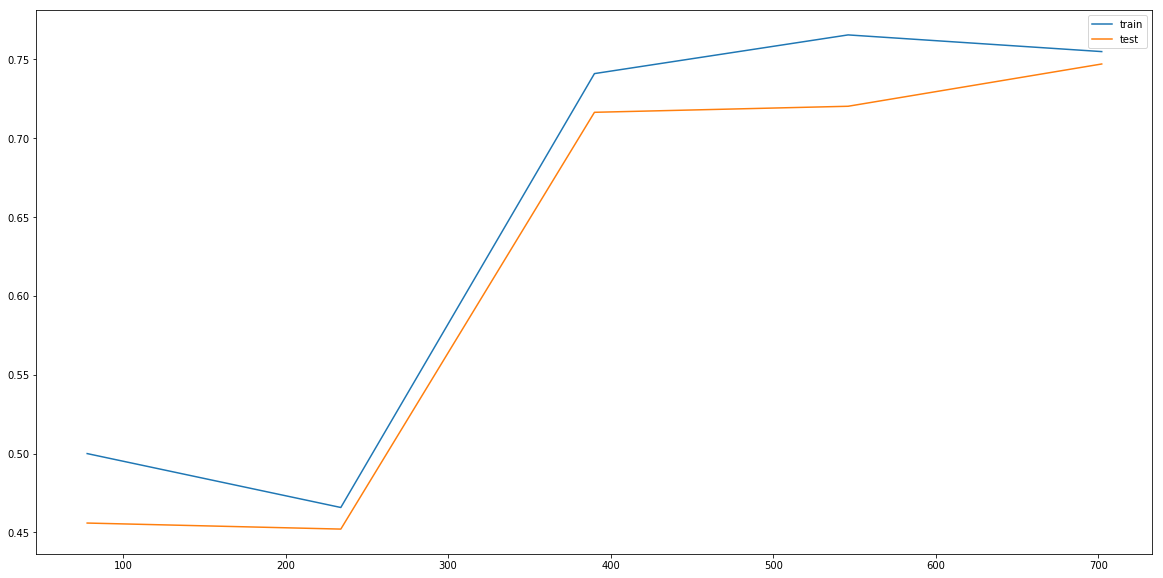

In [147]:
# pick the estimator with the best parameter and plot learning curve for it
# my own learning curve generator

X_test, y_test
train_sizes = []
train_scores=[]
test_scores=[]
fit_times=[]
for frac in np.linspace(0.1, 0.9, 5):
    inner_train_X, inner_test_X, inner_train_y, inner_test_y = train_test_split(X_train, y_train, train_size=frac, shuffle=True, stratify=y_train)
    print("inner train size: {}, inner test size: {}".format(len(inner_train_X), len(inner_test_X)))
    train_sizes.append(len(inner_train_X))
    start = time.time()
    estimator.fit(inner_train_X, inner_train_y)
    fit_times.append(time.time() - start)
    train_scores.append(estimator.score(inner_train_X, inner_train_y))
    test_scores.append(estimator.score(X_test, y_test)) # score on the original test set
    
plt.figure(figsize=(20,10))
plt.plot(train_sizes, train_scores, label='train')
plt.plot(train_sizes, test_scores, label='test')
plt.legend(loc='best')
plt.show()


# associate the train times with the learning curve
plt.figure(figsize=(20,10))
plt.plot(train_sizes, fit_times, label='fit times')
plt.plot(train_sizes, fit_times, '*')
plt.ylabel('Seconds', fontsize=16)
plt.xlabel('# training examples', fontsize=16)
plt.title('Training times', fontsize=20, fontweight='bold')
plt.legend(loc='best', fontsize=15)
plt.grid('on')
# plt.show()

title = 'Learning Curve for ANN'
plot_learning_curve(estimator, title, X_train, y_train)
plt.show() 


/Users/whe318/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:652: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


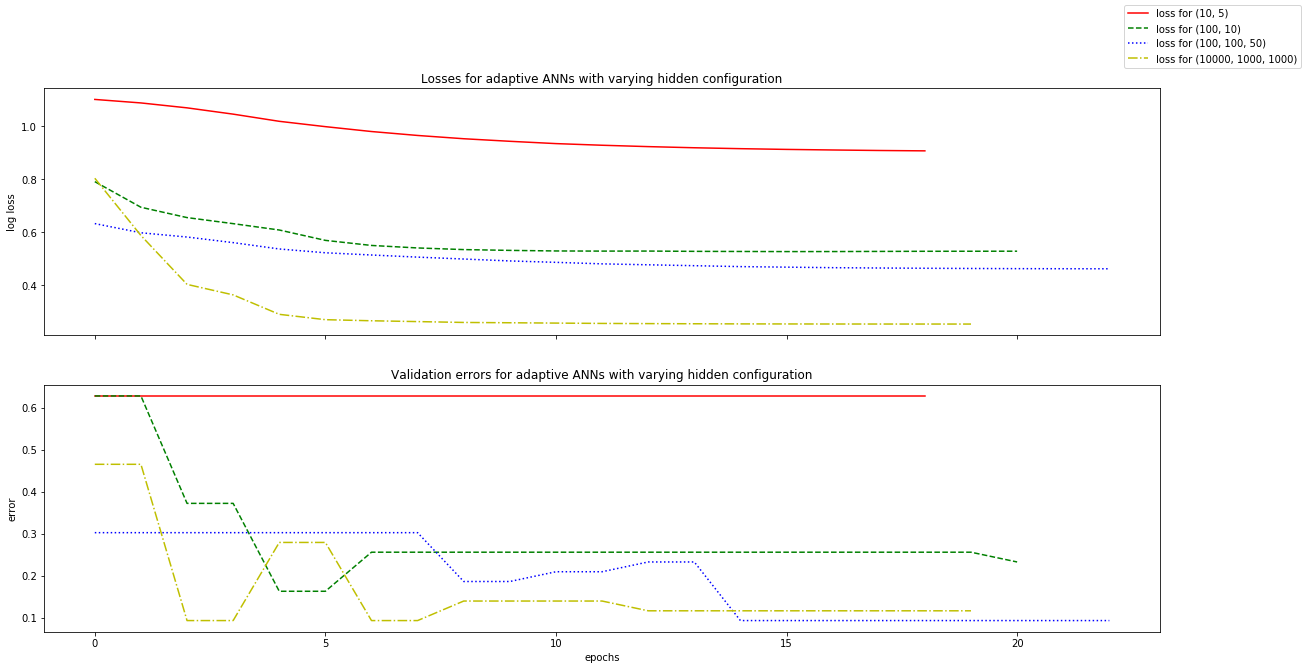

In [93]:
import time
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(20, 10), sharex=True)
ax0.set_title('Losses for adaptive ANNs with varying hidden configuration')
ax0.set_ylabel('log loss')
ax1.set_title('Validation errors for adaptive ANNs with varying hidden configuration')
ax1.set_xlabel('epochs')
ax1.set_ylabel('error')
ax0.set_prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']) +
                           cycler('linestyle', ['-', '--', ':', '-.']))
ax1.set_prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']) +
                           cycler('linestyle', ['-', '--', ':', '-.']))
hidden_config = [(10, 5), (100, 10), (100, 100, 50), (10000, 1000, 1000)]
for i, config in enumerate(hidden_config):
    clf = MLPClassifier(activation='tanh', solver='sgd', hidden_layer_sizes=config, max_iter=1e5, verbose=False, random_state=1, learning_rate='adaptive', early_stopping=True)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    ax0.plot(clf.loss_curve_, label='{} took {}s'.format(config, end_time - start_time))
    ax1.plot([1 - score for score in clf.validation_scores_[:len(clf.loss_curve_)]], label='validation score {}'.format(config))
# plt.legend(loc='best')
handles, labels = ax0.get_legend_handles_labels()
fig.legend(handles, labels, loc='best')
plt.show()

In [91]:
help(learning_curve)

Help on function learning_curve in module sklearn.model_selection._validation:

learning_curve(estimator, X, y, groups=None, train_sizes=array([0.1  , 0.325, 0.55 , 0.775, 1.   ]), cv=None, scoring=None, exploit_incremental_learning=False, n_jobs=1, pre_dispatch='all', verbose=0, shuffle=False, random_state=None)
    Learning curve.
    
    Determines cross-validated training and test scores for different training
    set sizes.
    
    A cross-validation generator splits the whole dataset k times in training
    and test data. Subsets of the training set with varying sizes will be used
    to train the estimator and a score for each training subset size and the
    test set will be computed. Afterwards, the scores will be averaged over
    all k runs for each training subset size.
    
    Read more in the :ref:`User Guide <learning_curve>`.
    
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type w

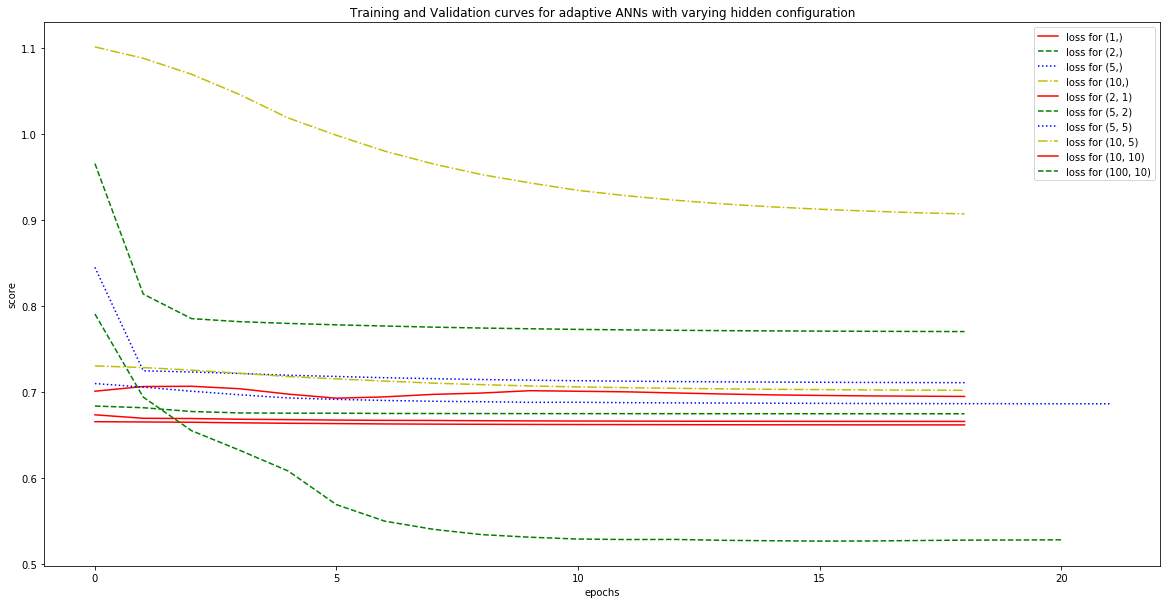

In [52]:
plt.figure(figsize=(20, 10))
plt.title('Training and Validation curves for adaptive ANNs with varying hidden configuration')
plt.ylabel('score')
plt.xlabel('epochs')
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']) +
                           cycler('linestyle', ['-', '--', ':', '-.'])))
hidden_config = [(1, ), (2, ), (5, ), (10,), (2, 1), (5, 2), (5, 5), (10, 5), (10, 10), (100, 10)]
for i, config in enumerate(hidden_config):
    clf = MLPClassifier(activation='tanh', solver='sgd', hidden_layer_sizes=config, max_iter=1e5, verbose=False, random_state=1, learning_rate='adaptive', early_stopping=True)
    clf.fit(X_train, y_train)
    plt.plot(clf.loss_curve_, label='loss for {}'.format(config))
#     plt.plot(clf.validation_scores_, label='validation score {}'.format(config))
plt.legend(loc='best')
plt.show()

n_train_samples: 37, train: 379, test: 190
n_train_samples: 37, train: 379, test: 190
n_train_samples: 37, train: 380, test: 189
n_train_samples: 123, train: 379, test: 190
n_train_samples: 123, train: 379, test: 190
n_train_samples: 123, train: 380, test: 189
n_train_samples: 208, train: 379, test: 190
n_train_samples: 208, train: 379, test: 190
n_train_samples: 208, train: 380, test: 189
n_train_samples: 293, train: 379, test: 190
n_train_samples: 293, train: 379, test: 190
n_train_samples: 293, train: 380, test: 189
n_train_samples: 379, train: 379, test: 190
n_train_samples: 379, train: 379, test: 190
n_train_samples: 379, train: 380, test: 189
[learning_curve] Training set sizes: [ 37 123 208 293 379]
[CV]  ................................................................
[CV] .......................................................  -   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......................................................  -   0.2s
[CV]  ................................................................
[CV] .......................................................  -   0.1s
[CV]  ................................................................
[CV] .......................................................  -   0.2s
[CV]  ................................................................
[CV] .......................................................  -   0.3s
[CV]  ................................................................
[CV] .......................................................  -   0.0s
[CV]  ................................................................
[CV] .......................................................  -   0.2s
[CV]  ................................................................
[CV] .......................................................  -   0.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.5s finished


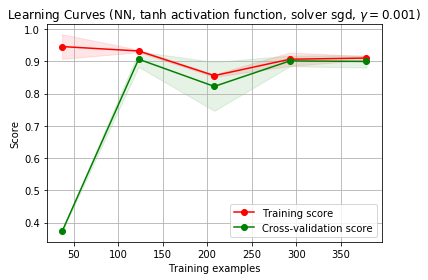

array([ 37, 123, 208, 293, 379])

In [129]:
test_scores

array([[0.37368421, 0.37368421, 0.37037037],
       [0.87368421, 0.87368421, 0.87301587],
       [0.90526316, 0.9       , 0.78306878],
       [0.91578947, 0.91052632, 0.82010582],
       [0.92105263, 0.90526316, 0.86772487]])

In [127]:
np.mean(train_scores, axis=1)

array([0.94594595, 0.87262873, 0.8974359 , 0.90784983, 0.90149516])

In [128]:
np.mean(test_scores, axis=1)

array([0.3725796 , 0.87346143, 0.86277731, 0.88214054, 0.89801355])

In [135]:
from sklearn.cross_validation import check_cv

In [136]:
check_cv(None, y, classifier=False)

sklearn.cross_validation.KFold(n=569, n_folds=3, shuffle=False, random_state=None)

In [6]:
def learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 5),
                   cv=None, scoring=None, exploit_incremental_learning=False,
                   n_jobs=1, pre_dispatch="all", verbose=0,
                   error_score='raise'):

SyntaxError: invalid syntax (<ipython-input-6-95e43f4ddc35>, line 1)

In [15]:
np.linspace(0.1, 1, 5)

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [18]:
123 / 379

0.3245382585751979

In [26]:
len(X)


569

In [46]:
getattr(clf, "_pairwise", False)

False

In [31]:
help(getattr)

Help on built-in function getattr in module builtins:

getattr(...)
    getattr(object, name[, default]) -> value
    
    Get a named attribute from an object; getattr(x, 'y') is equivalent to x.y.
    When a default argument is given, it is returned when the attribute doesn't
    exist; without it, an exception is raised in that case.



In [40]:
train = [121,122,126,127,129,131,132,134,135,138,141,146,156,161,162,164,167,168
,171,172,177,180,181,182,184,186,190,193,194,196,197,198,199,201,202,203
,205,207,210,212,213,214,215,218,219,223,229,230,233,236,237,239,242,243
,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261
,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297
,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315
,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333
,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351
,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369
,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387
,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405
,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423
,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441
,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459
,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477
,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495
,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513
,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531
,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549
,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567
,568]
hasattr(train, 'dtype')
X[train]

array([[1.866e+01, 1.712e+01, 1.214e+02, ..., 1.674e-01, 2.894e-01,
        8.456e-02],
       [2.425e+01, 2.020e+01, 1.662e+02, ..., 2.248e-01, 3.222e-01,
        8.009e-02],
       [1.361e+01, 2.469e+01, 8.776e+01, ..., 1.329e-01, 3.470e-01,
        7.900e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [45]:
hasattr(X, "shape")

True

In [37]:
out = [[1.0, 0.3736842105263158, 190, 0.041010141372680664], [0.3821138211382114, 0.6157894736842106, 190, 0.04250693321228027], [0.8317307692307693, 0.8105263157894737, 190, 0.059062957763671875], [0.856655290102389, 0.8736842105263158, 190, 0.06868815422058105], [0.8469656992084432, 0.8894736842105263, 190, 0.10385513305664062], [0.8378378378378378, 0.5421052631578948, 190, 0.024340152740478516], [0.8455284552845529, 0.8526315789473684, 190, 0.035160064697265625], [0.6923076923076923, 0.7105263157894737, 190, 0.04418492317199707], [0.8532423208191127, 0.8315789473684211, 190, 0.07536792755126953], [0.8733509234828496, 0.868421052631579, 190, 0.09178328514099121], [0.8378378378378378, 0.6243386243386243, 189, 0.02510690689086914], [0.8699186991869918, 0.8571428571428571, 189, 0.039051055908203125], [0.7884615384615384, 0.8201058201058201, 189, 0.04597210884094238], [0.8737201365187713, 0.8465608465608465, 189, 0.06205606460571289], [0.8970976253298153, 0.8412698412698413, 189, 0.10693907737731934]]
# out = np.array(out)[:, :2]
#         n_cv_folds = out.shape[0] // n_unique_ticks
#         out = out.reshape(n_cv_folds, n_unique_ticks, 2)

#     out = np.asarray(out).transpose((2, 1, 0))

#     return train_sizes_abs, out[0], out[1] # list of training sizes, train accuracies, test accuracies

out = np.array(out)[:, :2]
n_cv_folds = out.shape[0]  // 5
out = out.reshape(n_cv_folds, 5, 2) # only keep test and train accuracy
out = np.asarray(out).transpose((2, 1, 0)) # group the train accuracies by training size (that's one row)



In [44]:
out[0], out[1]


(array([[1.        , 0.83783784, 0.83783784],
        [0.38211382, 0.84552846, 0.8699187 ],
        [0.83173077, 0.69230769, 0.78846154],
        [0.85665529, 0.85324232, 0.87372014],
        [0.8469657 , 0.87335092, 0.89709763]]),
 array([[0.37368421, 0.54210526, 0.62433862],
        [0.61578947, 0.85263158, 0.85714286],
        [0.81052632, 0.71052632, 0.82010582],
        [0.87368421, 0.83157895, 0.84656085],
        [0.88947368, 0.86842105, 0.84126984]]))

In [19]:
# np.mean(out[0], axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)

[1.0, 0.1, 0.01, 0.001, 0.0001]

In [24]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'hidden_layer_sizes': [(5, ), (10,), (2, 1), (10, 5), (100, 100), (100, 100, 10)],
               'learning_rate_init' : [1e-2, 1e-3, 1e-4, 1e-5],
               'tol': [1e-4, 1e-5, 1e-6],
               'momentum': [0.3, 0.6, 0.9]}]

clf = MLPClassifier(activation='tanh', solver='sgd', hidden_layer_sizes=(100,100), max_iter=1e5, verbose=0, random_state=1, learning_rate='adaptive', early_stopping=True)


scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    gs = GridSearchCV(clf, tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    gs.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(gs.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, gs.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Iteration 1, loss = 0.97001022
Validation score: 0.391304
Iteration 2, loss = 0.72020023
Validation score: 0.391304
Iteration 3, loss = 0.71907700
Validation score: 0.391304
Iteration 4, loss = 0.71084137
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.70994205
Validation score: 0.391304
Iteration 6, loss = 0.70919359
Validation score: 0.391304
Iteration 7, loss = 0.70838916
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.70829154
Validation score: 0.391304
Iteration 9, loss = 0.70815536
Validation score: 0.391304
Iteration 10, loss = 0.70813924
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.7

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.391304
Iteration 15, loss = 0.70806065
Validation score: 0.391304
Iteration 16, loss = 0.70806506
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.70805965
Validation score: 0.391304
Iteration 18, loss = 0.70805924
Validation score: 0.391304
Iteration 19, loss = 0.70805801
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.70805560
Validation score: 0.391304
Iteration 21, loss = 0.70805518
Validation score: 0.391304
Iteration 22, loss = 0.70805513
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.95712624
Validation score: 0.521739
Iteration 2, loss = 0.72454550
Validation score: 0.521739
Iteration 3, loss = 0.71797608

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.71187808
Validation score: 0.521739
Iteration 18, loss = 0.71187436
Validation score: 0.521739
Iteration 19, loss = 0.71187147
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.71187230
Validation score: 0.521739
Iteration 21, loss = 0.71187189
Validation score: 0.521739
Iteration 22, loss = 0.71187152
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.97827809
Validation score: 0.478261
Iteration 2, loss = 0.72676427
Validation score: 0.478261
Iteration 3, loss = 0.72042484
Validation score: 0.478261
Iteration 4, loss = 0.71429763
Validation score: 0.478261
Validation score did not improve

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.95347303
Validation score: 0.434783
Iteration 2, loss = 0.72328302
Validation score: 0.434783
Iteration 3, loss = 0.72021458
Validation score: 0.434783
Iteration 4, loss = 0.71451373
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.70850555
Validation score: 0.434783
Iteration 6, loss = 0.70606012
Validation score: 0.434783
Iteration 7, loss = 0.70397639
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.70165193
Validation score: 0.434783
Iteration 9, loss = 0.70074271
Validation score: 0.434783
Iteration 10, loss = 0.70021947
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.69999661
Validation score: 0.434783
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.69977113
Validation score: 0.434783
Iteration 18, loss = 0.69976919
Validation score: 0.434783
Iteration 19, loss = 0.69976824
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.69976621
Validation score: 0.434783
Iteration 21, loss = 0.69976524
Validation score: 0.434783
Iteration 22, loss = 0.69976469
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.97107745
Validation score: 0.478261
Iteration 2, loss = 0.72435806
Validation score: 0.478261
Iteration 3, loss = 0.72110541
Validation score: 0.478261
Iteration 4, loss = 0.71513012
Validation score: 0.478261
Validation score did not improve

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.478261
Iteration 22, loss = 0.69906394
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.96998733
Validation score: 0.391304
Iteration 2, loss = 0.71658122
Validation score: 0.391304
Iteration 3, loss = 0.70922858
Validation score: 0.391304
Iteration 4, loss = 0.69510495
Validation score: 0.608696
Iteration 5, loss = 0.68612974
Validation score: 0.608696
Iteration 6, loss = 0.67848561
Validation score: 0.608696
Iteration 7, loss = 0.67310378
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 8, loss = 0.67070688
Validation score: 0.608696
Iteration 9, loss = 0.66954191
Validation score: 0.608696
Iteration 10, loss = 0.66892811
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting lear

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 19, loss = 0.66841624
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 20, loss = 0.66843523
Validation score: 0.608696
Iteration 21, loss = 0.66845091
Validation score: 0.608696
Iteration 22, loss = 0.66845993
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 23, loss = 0.66846765
Validation score: 0.608696
Iteration 24, loss = 0.66847195
Validation score: 0.608696
Iteration 25, loss = 0.66847607
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.95711857
Validation score: 0.521739
Iteration 2, loss = 0.72133870
Validation score: 0.521739
Iteration 3, loss = 0.70804314
Validation score: 0.478261
Iteration 4, loss = 0.69322640
Validation score: 0.478261


/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 7, loss = 0.67670241
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.67446158
Validation score: 0.478261
Iteration 9, loss = 0.67286475
Validation score: 0.478261
Iteration 10, loss = 0.67162185
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.67067097
Validation score: 0.478261
Iteration 12, loss = 0.66985333
Validation score: 0.478261
Iteration 13, loss = 0.66931241
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.66886920
Validation score: 0.478261
Iteration 15, loss = 0.66848054
Validation score: 0.478261
Iteration 16, loss = 0.66818831
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an


Validation score: 0.478261
Iteration 9, loss = 0.72560258
Validation score: 0.478261
Iteration 10, loss = 0.72557497
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.72556002
Validation score: 0.478261
Iteration 12, loss = 0.72555659
Validation score: 0.478261
Iteration 13, loss = 0.72554862
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.72554542
Validation score: 0.478261
Iteration 15, loss = 0.72554525
Validation score: 0.478261
Iteration 16, loss = 0.72554474
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.72554419
Validation score: 0.478261
Iteration 18, loss = 0.72554385
Validation score: 0.478261
Iteration 19, loss = 0.725543

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 13, loss = 0.72566619
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.72565812
Validation score: 0.478261
Iteration 15, loss = 0.72565638
Validation score: 0.478261
Iteration 16, loss = 0.72565591
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.72565516
Validation score: 0.478261
Iteration 18, loss = 0.72565497
Validation score: 0.478261
Iteration 19, loss = 0.72565489
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.97005539
Validation score: 0.391304
Iteration 2, loss = 0.72854093
Validation score: 0.391304
Iteration 3, loss = 0.72498724
Validation score: 0.391304
Iteration 4, loss = 0.72405338
Validation score: 0.391304


/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 2, loss = 0.72787563
Validation score: 0.521739
Iteration 3, loss = 0.72686005
Validation score: 0.521739
Iteration 4, loss = 0.72570783
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.72529739
Validation score: 0.521739
Iteration 6, loss = 0.72528922
Validation score: 0.521739
Iteration 7, loss = 0.72521254
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.72518652
Validation score: 0.521739
Iteration 9, loss = 0.72515662
Validation score: 0.521739
Iteration 10, loss = 0.72511421
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.72508335
Validation score: 0.521739
Iteration 12, loss = 0.72507407
Validation score: 0.521739
Itera

Iteration 17, loss = 0.72427219
Validation score: 0.478261
Iteration 18, loss = 0.72427150
Validation score: 0.478261
Iteration 19, loss = 0.72427089
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.95345374
Validation score: 0.434783
Iteration 2, loss = 0.72623919
Validation score: 0.434783
Iteration 3, loss = 0.72589519
Validation score: 0.434783
Iteration 4, loss = 0.72523611
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.72447270
Validation score: 0.434783
Iteration 6, loss = 0.72414027
Validation score: 0.434783
Iteration 7, loss = 0.72385136
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.72352546
Validation score: 0.434783
Iter

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.97005306
Validation score: 0.391304
Iteration 2, loss = 0.72473959
Validation score: 0.391304
Iteration 3, loss = 0.72383398
Validation score: 0.391304
Iteration 4, loss = 0.72184872
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.72011047
Validation score: 0.391304
Iteration 6, loss = 0.71871401
Validation score: 0.391304
Iteration 7, loss = 0.71748322
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.71645300
Validation score: 0.391304
Iteration 9, loss = 0.71564540
Validation score: 0.391304
Iteration 10, loss = 0.71498284
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.71443261
Validation score: 0.391304
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.478261
Iteration 10, loss = 0.71847935
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.71798190
Validation score: 0.478261
Iteration 12, loss = 0.71757127
Validation score: 0.478261
Iteration 13, loss = 0.71724853
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.71697992
Validation score: 0.478261
Iteration 15, loss = 0.71675737
Validation score: 0.478261
Iteration 16, loss = 0.71657972
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.71643168
Validation score: 0.478261
Iteration 18, loss = 0.71631544
Validation score: 0.478261
Iteration 19, loss = 0.71622473
Validation score: 0.478261
Validation score did not impr

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 8, loss = 0.71980410
Validation score: 0.478261
Iteration 9, loss = 0.71876030
Validation score: 0.478261
Iteration 10, loss = 0.71791034
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.71719852
Validation score: 0.478261
Iteration 12, loss = 0.71663408
Validation score: 0.478261
Iteration 13, loss = 0.71616266
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.71578903
Validation score: 0.478261
Iteration 15, loss = 0.71549003
Validation score: 0.478261
Iteration 16, loss = 0.71523692
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.71503474
Validation score: 0.478261
Iteration 18, loss = 0.71487341
Validation score: 0.478261

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 6, loss = 0.73101354
Validation score: 0.434783
Iteration 7, loss = 0.73099792
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.73097726
Validation score: 0.434783
Iteration 9, loss = 0.73097380
Validation score: 0.434783
Iteration 10, loss = 0.73097069
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.73096964
Validation score: 0.434783
Iteration 12, loss = 0.73096924
Validation score: 0.434783
Iteration 13, loss = 0.73096884
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.97105672
Validation score: 0.478261
Iteration 2, loss = 0.90789426
Validation score: 0.478261
Iteration 3, loss = 0.88518473
Validation score: 0.478261
Ite

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.95345202
Validation score: 0.434783
Iteration 2, loss = 0.85276002
Validation score: 0.434783
Iteration 3, loss = 0.78940725
Validation score: 0.434783
Iteration 4, loss = 0.74611364
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.91576457
Validation score: 0.434783
Iteration 6, loss = 1.05404777
Validation score: 0.434783
Iteration 7, loss = 1.03665643
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 1.00309281
Validation score: 0.434783
Iteration 9, loss = 0.99754970
Validation score: 0.434783
Iteration 10, loss = 0.99200335
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.97787906
Validation score: 0.434783
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 2, loss = 0.85276002
Validation score: 0.434783
Iteration 3, loss = 0.78940725
Validation score: 0.434783
Iteration 4, loss = 0.74611364
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.91576457
Validation score: 0.434783
Iteration 6, loss = 1.05404777
Validation score: 0.434783
Iteration 7, loss = 1.03665643
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 1.00309281
Validation score: 0.434783
Iteration 9, loss = 0.99754970
Validation score: 0.434783
Iteration 10, loss = 0.99200335
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.97787906
Validation score: 0.434783
Iteration 12, loss = 0.97218765
Validation score: 0.434783
Itera

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 7, loss = 0.72657261
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.72647476
Validation score: 0.478261
Iteration 9, loss = 0.72639656
Validation score: 0.478261
Iteration 10, loss = 0.72633030
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.72627401
Validation score: 0.478261
Iteration 12, loss = 0.72622744
Validation score: 0.478261
Iteration 13, loss = 0.72619059
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.95345200
Validation score: 0.434783
Iteration 2, loss = 0.83051499
Validation score: 0.434783
Iteration 3, loss = 0.74217452
Validation score: 0.434783
Iteration 4, loss = 0.73093368
Validation score: 0.434783
Val

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.97821468
Validation score: 0.478261
Iteration 2, loss = 0.96944096
Validation score: 0.478261
Iteration 3, loss = 0.96041295
Validation score: 0.478261
Iteration 4, loss = 0.91617850
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.90527975
Validation score: 0.478261
Iteration 6, loss = 0.89377534
Validation score: 0.478261
Iteration 7, loss = 0.89040688
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.88610109
Validation score: 0.478261
Iteration 9, loss = 0.88559767
Validation score: 0.478261
Iteration 10, loss = 0.88536175
Validation score: 0.478261
Validation score did not improve more

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 3, loss = 0.95683562
Validation score: 0.478261
Iteration 4, loss = 0.94725675
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.93613540
Validation score: 0.478261
Iteration 6, loss = 0.93425850
Validation score: 0.478261
Iteration 7, loss = 0.93294443
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.93168711
Validation score: 0.478261
Iteration 9, loss = 0.93045849
Validation score: 0.478261
Iteration 10, loss = 0.93012416
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.97159780
Validation score: 0.391304
Iteration 2, loss = 0.91496619
Validation score: 0.391304
Iteration 3, loss = 0.88973351
Validation score: 0.391304
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.391304
Iteration 2, loss = 0.91496619
Validation score: 0.391304
Iteration 3, loss = 0.88973351
Validation score: 0.391304
Iteration 4, loss = 0.88076584
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.87676038
Validation score: 0.391304
Iteration 6, loss = 0.87529164
Validation score: 0.391304
Iteration 7, loss = 0.87369732
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.87262557
Validation score: 0.391304
Iteration 9, loss = 0.87220329
Validation score: 0.391304
Iteration 10, loss = 0.87194611
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.96405668
Validation score: 0.521739
Iteration 2, loss = 0.95845859
Valida

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 2, loss = 0.96139535
Validation score: 0.478261
Iteration 3, loss = 0.93723662
Validation score: 0.478261
Iteration 4, loss = 0.89118691
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.85826995
Validation score: 0.478261
Iteration 6, loss = 0.81754646
Validation score: 0.478261
Iteration 7, loss = 0.78117688
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.76578904
Validation score: 0.478261
Iteration 9, loss = 0.75481654
Validation score: 0.478261
Iteration 10, loss = 0.74810406
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.95345696
Validation score: 0.434783
Iteration 2, loss = 0.93882352
Validation score: 0.434783
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 4, loss = 0.71715862
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.71816488
Validation score: 0.391304
Iteration 6, loss = 0.71862619
Validation score: 0.391304
Iteration 7, loss = 0.71774879
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.71676955
Validation score: 0.391304
Iteration 9, loss = 0.71633440
Validation score: 0.391304
Iteration 10, loss = 0.71612466
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.71614026
Validation score: 0.391304
Iteration 12, loss = 0.71602949
Validation score: 0.391304
Iteration 13, loss = 0.71594405
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for tw

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 4, loss = 0.71099219
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.70045669
Validation score: 0.521739
Iteration 6, loss = 0.69951505
Validation score: 0.521739
Iteration 7, loss = 0.69994221
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.69900960
Validation score: 0.521739
Iteration 9, loss = 0.69876742
Validation score: 0.521739
Iteration 10, loss = 0.69870425
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.69865615
Validation score: 0.521739
Iteration 12, loss = 0.69861974
Validation score: 0.521739
Iteration 13, loss = 0.69857670
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for tw

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.73182303
Validation score: 0.521739
Iteration 2, loss = 0.72261400
Validation score: 0.521739
Iteration 3, loss = 0.71421466
Validation score: 0.521739
Iteration 4, loss = 0.70685841
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.69698185
Validation score: 0.521739
Iteration 6, loss = 0.69545012
Validation score: 0.521739
Iteration 7, loss = 0.69584531
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.69501614
Validation score: 0.521739
Iteration 9, loss = 0.69492397
Validation score: 0.521739
Iteration 10, loss = 0.69488703
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.69485381
Validation score: 0.521739
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.478261
Iteration 19, loss = 0.67890807
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.67890622
Validation score: 0.478261
Iteration 21, loss = 0.67890529
Validation score: 0.478261
Iteration 22, loss = 0.67890457
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72967222
Validation score: 0.434783
Iteration 2, loss = 0.71679913
Validation score: 0.434783
Iteration 3, loss = 0.71158237
Validation score: 0.434783
Iteration 4, loss = 0.70131018
Validation score: 0.565217
Iteration 5, loss = 0.69067475
Validation score: 0.565217
Iteration 6, loss = 0.67819188
Validation score: 0.565217
Iteration 7, loss = 0.67626210
Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting le

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 9, loss = 0.67835708
Validation score: 0.565217
Iteration 10, loss = 0.67905795
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 11, loss = 0.67869263
Validation score: 0.565217
Iteration 12, loss = 0.67829870
Validation score: 0.565217
Iteration 13, loss = 0.67786768
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 14, loss = 0.67759999
Validation score: 0.565217
Iteration 15, loss = 0.67748785
Validation score: 0.565217
Iteration 16, loss = 0.67739238
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 17, loss = 0.67733561
Validation score: 0.565217
Iteration 18, loss = 0.67731228
Validation score: 0.565217
Iteration 19, loss = 0.67729866
Validation score: 0.56521

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.70150567
Validation score: 0.391304
Iteration 6, loss = 0.69869040
Validation score: 0.391304
Iteration 7, loss = 0.69589021
Validation score: 0.608696
Iteration 8, loss = 0.69220941
Validation score: 0.608696
Iteration 9, loss = 0.68896820
Validation score: 0.608696
Iteration 10, loss = 0.68628329
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 11, loss = 0.68468082
Validation score: 0.608696
Iteration 12, loss = 0.68331333
Validation score: 0.608696
Iteration 13, loss = 0.68210226
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 14, loss = 0.68116960
Validation score: 0.608696
Iteration 15, loss = 0.68047204
Va

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 19, loss = 0.67875373
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 20, loss = 0.67850525
Validation score: 0.608696
Iteration 21, loss = 0.67831842
Validation score: 0.608696
Iteration 22, loss = 0.67815198
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 23, loss = 0.67802734
Validation score: 0.608696
Iteration 24, loss = 0.67791995
Validation score: 0.608696
Iteration 25, loss = 0.67783672
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72794160
Validation score: 0.391304
Iteration 2, loss = 0.72561673
Validation score: 0.391304
Iteration 3, loss = 0.70972710
Validation score: 0.391304
Iteration 4, loss = 0.70078965
Validation score: 0.391304


Iteration 9, loss = 0.69165567
Validation score: 0.608696
Iteration 10, loss = 0.69048159
Validation score: 0.608696
Iteration 11, loss = 0.68958832
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 12, loss = 0.68847026
Validation score: 0.608696
Iteration 13, loss = 0.68759132
Validation score: 0.608696
Iteration 14, loss = 0.68684803
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 15, loss = 0.68623865
Validation score: 0.608696
Iteration 16, loss = 0.68575951
Validation score: 0.608696
Iteration 17, loss = 0.68535400
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 18, loss = 0.68502875
Validation score: 0.608696
Iteration 19, loss = 0.68476680
Validation score: 0.60869

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 2, loss = 0.73094953
Validation score: 0.521739
Iteration 3, loss = 0.72994540
Validation score: 0.521739
Iteration 4, loss = 0.72893822
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.72747383
Validation score: 0.521739
Iteration 6, loss = 0.72719906
Validation score: 0.521739
Iteration 7, loss = 0.72719514
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.72702336
Validation score: 0.521739
Iteration 9, loss = 0.72699657
Validation score: 0.521739
Iteration 10, loss = 0.72697952
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.72696327
Validation score: 0.521739
Iteration 12, loss = 0.72695985
Validation score: 0.521739
Itera

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 9, loss = 0.72623922
Validation score: 0.391304
Iteration 10, loss = 0.72621413
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.72621271
Validation score: 0.391304
Iteration 12, loss = 0.72619976
Validation score: 0.391304
Iteration 13, loss = 0.72618970
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.72618895
Validation score: 0.391304
Iteration 15, loss = 0.72618725
Validation score: 0.391304
Iteration 16, loss = 0.72618529
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.72618423
Validation score: 0.391304
Iteration 18, loss = 0.72618399
Validation score: 0.391304
Iteration 19, loss = 0.72618342
Validation score: 0.39130

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 12, loss = 0.72450670
Validation score: 0.521739
Iteration 13, loss = 0.72449160
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.72446902
Validation score: 0.521739
Iteration 15, loss = 0.72446066
Validation score: 0.521739
Iteration 16, loss = 0.72445602
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.72445180
Validation score: 0.521739
Iteration 18, loss = 0.72444993
Validation score: 0.521739
Iteration 19, loss = 0.72444894
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.73191396
Validation score: 0.521739
Iteration 2, loss = 0.73062673
Validation score: 0.521739
Iteration 3, loss = 0.72904843
Validation score: 0.521739

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 12, loss = 0.72265775
Validation score: 0.434783
Iteration 13, loss = 0.72262923
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.72260976
Validation score: 0.434783
Iteration 15, loss = 0.72260157
Validation score: 0.434783
Iteration 16, loss = 0.72259533
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.72259124
Validation score: 0.434783
Iteration 18, loss = 0.72258954
Validation score: 0.434783
Iteration 19, loss = 0.72258854
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72781018
Validation score: 0.391304
Iteration 2, loss = 0.72769704
Validation score: 0.391304
Iteration 3, loss = 0.72630573
Validation score: 0.391304

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 3, loss = 0.72574009
Validation score: 0.391304
Iteration 4, loss = 0.72430402
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.72322153
Validation score: 0.391304
Iteration 6, loss = 0.72256872
Validation score: 0.391304
Iteration 7, loss = 0.72190631
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.72121901
Validation score: 0.391304
Iteration 9, loss = 0.72065720
Validation score: 0.391304
Iteration 10, loss = 0.72017577
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.71976915
Validation score: 0.391304
Iteration 12, loss = 0.71944953
Validation score: 0.391304
Iteration 13, loss = 0.71918282
Validation score: 0.391304
Vali

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 6, loss = 0.71628627
Validation score: 0.521739
Iteration 7, loss = 0.71347053
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.71115248
Validation score: 0.521739
Iteration 9, loss = 0.70931023
Validation score: 0.521739
Iteration 10, loss = 0.70782999
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.70663732
Validation score: 0.521739
Iteration 12, loss = 0.70567405
Validation score: 0.521739
Iteration 13, loss = 0.70488598
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.70426691
Validation score: 0.521739
Iteration 15, loss = 0.70376642
Validation score: 0.521739
Iteration 16, loss = 0.70335470
Validation score: 0.521739
V

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.391304
Iteration 9, loss = 0.72763937
Validation score: 0.391304
Iteration 10, loss = 0.72763678
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.72763659
Validation score: 0.391304
Iteration 12, loss = 0.72763527
Validation score: 0.391304
Iteration 13, loss = 0.72763424
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72780223
Validation score: 0.391304
Iteration 2, loss = 0.72779939
Validation score: 0.391304
Iteration 3, loss = 0.72768495
Validation score: 0.391304
Iteration 4, loss = 0.72767667
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.72767775
Validation score: 0.391304
Iteration 6, loss = 0.72768064
Val

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.72779959
Validation score: 0.391304
Iteration 2, loss = 0.72779686
Validation score: 0.391304
Iteration 3, loss = 0.72768427
Validation score: 0.391304
Iteration 4, loss = 0.72773301
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.72768132
Validation score: 0.391304
Iteration 6, loss = 0.72767919
Validation score: 0.391304
Iteration 7, loss = 0.72766741
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.72764338
Validation score: 0.391304
Iteration 9, loss = 0.72763937
Validation score: 0.391304
Iteration 10, loss = 0.72763678
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.72763659
Validation score: 0.391304
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.72779980
Validation score: 0.391304
Iteration 2, loss = 0.72778827
Validation score: 0.391304
Iteration 3, loss = 0.72764793
Validation score: 0.391304
Iteration 4, loss = 0.72766672
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.72760634
Validation score: 0.391304
Iteration 6, loss = 0.72759380
Validation score: 0.391304
Iteration 7, loss = 0.72757516
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.72754041
Validation score: 0.391304
Iteration 9, loss = 0.72752678
Validation score: 0.391304
Iteration 10, loss = 0.72751918
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.72751641
Validation score: 0.391304
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.434783
Iteration 10, loss = 0.72750854
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.72737614
Validation score: 0.434783
Iteration 12, loss = 0.72726927
Validation score: 0.434783
Iteration 13, loss = 0.72718173
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72780002
Validation score: 0.391304
Iteration 2, loss = 0.72777355
Validation score: 0.391304
Iteration 3, loss = 0.72759462
Validation score: 0.391304
Iteration 4, loss = 0.72752450
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.72739395
Validation score: 0.391304
Iteration 6, loss = 0.72730686
Validation score: 0.391304
Iteration 7, loss = 0.72721995
Val

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 10, loss = 0.72750854
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.72737614
Validation score: 0.434783
Iteration 12, loss = 0.72726927
Validation score: 0.434783
Iteration 13, loss = 0.72718173
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72780002
Validation score: 0.391304
Iteration 2, loss = 0.72777355
Validation score: 0.391304
Iteration 3, loss = 0.72759462
Validation score: 0.391304
Iteration 4, loss = 0.72752450
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.72739395
Validation score: 0.391304
Iteration 6, loss = 0.72730686
Validation score: 0.391304
Iteration 7, loss = 0.72721995
Validation score: 0.391304
Val

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.72780138
Validation score: 0.391304
Iteration 2, loss = 0.72780110
Validation score: 0.391304
Iteration 3, loss = 0.72778965
Validation score: 0.391304
Iteration 4, loss = 0.72778881
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.72778891
Validation score: 0.391304
Iteration 6, loss = 0.72778919
Validation score: 0.391304
Iteration 7, loss = 0.72778808
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.72778683
Validation score: 0.391304
Iteration 9, loss = 0.72778630
Validation score: 0.391304
Iteration 10, loss = 0.72778603
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.73192439
Validation score: 0.521739
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.521739
Iteration 9, loss = 0.73183844
Validation score: 0.521739
Iteration 10, loss = 0.73183779
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72977608
Validation score: 0.434783
Iteration 2, loss = 0.72976223
Validation score: 0.434783
Iteration 3, loss = 0.72975449
Validation score: 0.434783
Iteration 4, loss = 0.72973899
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.72971977
Validation score: 0.434783
Iteration 6, loss = 0.72970951
Validation score: 0.434783
Iteration 7, loss = 0.72970521
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.72970316
Validation score: 0.434783
Iteration 9, loss = 0.72970253
Valida

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 2, loss = 0.72779875
Validation score: 0.391304
Iteration 3, loss = 0.72778037
Validation score: 0.391304
Iteration 4, loss = 0.72776528
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.72775331
Validation score: 0.391304
Iteration 6, loss = 0.72774583
Validation score: 0.391304
Iteration 7, loss = 0.72773822
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.72773030
Validation score: 0.391304
Iteration 9, loss = 0.72772379
Validation score: 0.391304
Iteration 10, loss = 0.72771818
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.73192440
Validation score: 0.521739
Iteration 2, loss = 0.73191493
Validation score: 0.521739
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67251994
Validation score: 0.565217
Iteration 2, loss = 0.67117408
Validation score: 0.565217
Iteration 3, loss = 0.67075336
Validation score: 0.565217
Iteration 4, loss = 0.67039929
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.66940874
Validation score: 0.565217
Iteration 6, loss = 0.66932595
Validation score: 0.565217
Iteration 7, loss = 0.66925578
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.66917669
Validation score: 0.565217
Iteration 9, loss = 0.66915931
Validation score: 0.565217
Iteration 10, loss = 0.66914340
Validation score: 0.565217
Validation score did not improve more

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an


Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.66911672
Validation score: 0.565217
Iteration 15, loss = 0.66911350
Validation score: 0.565217
Iteration 16, loss = 0.66911256
Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.66911171
Validation score: 0.565217
Iteration 18, loss = 0.66911154
Validation score: 0.565217
Iteration 19, loss = 0.66911139
Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.66911005
Validation score: 0.565217
Iteration 21, loss = 0.66910991
Validation score: 0.565217
Iteration 22, loss = 0.66910987
Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Lea

Iteration 20, loss = 0.66911005
Validation score: 0.565217
Iteration 21, loss = 0.66910991
Validation score: 0.565217
Iteration 22, loss = 0.66910987
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.66467461
Validation score: 0.391304
Iteration 2, loss = 0.66326106
Validation score: 0.391304
Iteration 3, loss = 0.66261290
Validation score: 0.391304
Iteration 4, loss = 0.66210270
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.66105037
Validation score: 0.391304
Iteration 6, loss = 0.66004012
Validation score: 0.391304
Iteration 7, loss = 0.65984860
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.65976866
Validation score: 0.391304
Iter

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 7, loss = 0.65895096
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.65892118
Validation score: 0.391304
Iteration 9, loss = 0.65890766
Validation score: 0.391304
Iteration 10, loss = 0.65890158
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.65890208
Validation score: 0.391304
Iteration 12, loss = 0.65890053
Validation score: 0.391304
Iteration 13, loss = 0.65889877
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.65889753
Validation score: 0.391304
Iteration 15, loss = 0.65889707
Validation score: 0.391304
Iteration 16, loss = 0.65889667
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 5, loss = 0.65939943
Validation score: 0.391304
Iteration 6, loss = 0.65904622
Validation score: 0.391304
Iteration 7, loss = 0.65895096
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.65892118
Validation score: 0.391304
Iteration 9, loss = 0.65890766
Validation score: 0.391304
Iteration 10, loss = 0.65890158
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.65890208
Validation score: 0.391304
Iteration 12, loss = 0.65890053
Validation score: 0.391304
Iteration 13, loss = 0.65889877
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.65889753
Validation score: 0.391304
Iteration 15, loss = 0.65889707
Validation score: 0.391304
It

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 8, loss = 0.65892118
Validation score: 0.391304
Iteration 9, loss = 0.65890766
Validation score: 0.391304
Iteration 10, loss = 0.65890158
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.65890208
Validation score: 0.391304
Iteration 12, loss = 0.65890053
Validation score: 0.391304
Iteration 13, loss = 0.65889877
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.65889753
Validation score: 0.391304
Iteration 15, loss = 0.65889707
Validation score: 0.391304
Iteration 16, loss = 0.65889667
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.65889638
Validation score: 0.391304
Iteration 18, loss = 0.65889628
Validation score: 0.391304

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 12, loss = 0.65885606
Validation score: 0.391304
Iteration 13, loss = 0.65888464
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.65890358
Validation score: 0.391304
Iteration 15, loss = 0.65891966
Validation score: 0.391304
Iteration 16, loss = 0.65892018
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.65891871
Validation score: 0.391304
Iteration 18, loss = 0.65891936
Validation score: 0.391304
Iteration 19, loss = 0.65892102
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.65892340
Validation score: 0.391304
Iteration 21, loss = 0.65892669
Validation score: 0.391304
Iteration 22, loss = 0.65892867
Validation score: 0.3913

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 5, loss = 0.66097302
Validation score: 0.434783
Iteration 6, loss = 0.66096257
Validation score: 0.434783
Iteration 7, loss = 0.66073458
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.66069662
Validation score: 0.434783
Iteration 9, loss = 0.66066505
Validation score: 0.434783
Iteration 10, loss = 0.66063260
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.66064497
Validation score: 0.434783
Iteration 12, loss = 0.66065213
Validation score: 0.434783
Iteration 13, loss = 0.66065070
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.66064151
Validation score: 0.434783
Iteration 15, loss = 0.66062955
Validation score: 0.434783
It

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an


Validation score: 0.434783
Iteration 22, loss = 0.66058984
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67808049
Validation score: 0.652174
Iteration 2, loss = 0.67553390
Validation score: 0.652174
Iteration 3, loss = 0.67292226
Validation score: 0.652174
Iteration 4, loss = 0.67260324
Validation score: 0.652174
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.67246859
Validation score: 0.652174
Iteration 6, loss = 0.67235657
Validation score: 0.652174
Iteration 7, loss = 0.67239091
Validation score: 0.652174
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.67245134
Validation score: 0.652174
Iteration 9, loss = 0.67246951
Validation score: 0.652174
Iteration 10, loss = 0.67251095
Vali

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.67525713
Validation score: 0.608696
Iteration 6, loss = 0.67524552
Validation score: 0.608696
Iteration 7, loss = 0.67522031
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.67520929
Validation score: 0.608696
Iteration 9, loss = 0.67520618
Validation score: 0.608696
Iteration 10, loss = 0.67520412
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.67520220
Validation score: 0.608696
Iteration 12, loss = 0.67519956
Validation score: 0.608696
Iteration 13, loss = 0.67519897
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting l

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.565217
Iteration 15, loss = 0.67164774
Validation score: 0.565217
Iteration 16, loss = 0.67164762
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.67164753
Validation score: 0.565217
Iteration 18, loss = 0.67164750
Validation score: 0.565217
Iteration 19, loss = 0.67164736
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.66467149
Validation score: 0.391304
Iteration 2, loss = 0.66449712
Validation score: 0.391304
Iteration 3, loss = 0.66435130
Validation score: 0.391304
Iteration 4, loss = 0.66398838
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.66388613
Validation score: 0.391304
Iteration 6, loss = 0.66386631
Va

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.434783
Iteration 6, loss = 0.66504407
Validation score: 0.434783
Iteration 7, loss = 0.66498921
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.66496106
Validation score: 0.434783
Iteration 9, loss = 0.66495128
Validation score: 0.434783
Iteration 10, loss = 0.66494579
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.66494124
Validation score: 0.434783
Iteration 12, loss = 0.66493937
Validation score: 0.434783
Iteration 13, loss = 0.66493825
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.66493743
Validation score: 0.434783
Iteration 15, loss = 0.66493712
Validation score: 0.434783
Iteration 16, loss = 0.66493691
V

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.67591117
Validation score: 0.608696
Iteration 2, loss = 0.67556793
Validation score: 0.608696
Iteration 3, loss = 0.67532958
Validation score: 0.608696
Iteration 4, loss = 0.67508458
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.67486370
Validation score: 0.608696
Iteration 6, loss = 0.67472879
Validation score: 0.608696
Iteration 7, loss = 0.67432594
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.67416992
Validation score: 0.608696
Iteration 9, loss = 0.67411408
Validation score: 0.608696
Iteration 10, loss = 0.67408949
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.67407630
Validation score: 0.608696
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 14, loss = 0.66921404
Validation score: 0.565217
Iteration 15, loss = 0.66916904
Validation score: 0.565217
Iteration 16, loss = 0.66913033
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.66909832
Validation score: 0.565217
Iteration 18, loss = 0.66907122
Validation score: 0.565217
Iteration 19, loss = 0.66904783
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.66467165
Validation score: 0.391304
Iteration 2, loss = 0.66434589
Validation score: 0.391304
Iteration 3, loss = 0.66396214
Validation score: 0.391304
Iteration 4, loss = 0.66270168
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.66169019
Validation score: 0.391304
I

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.434783
Iteration 7, loss = 0.66231740
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.66171615
Validation score: 0.434783
Iteration 9, loss = 0.66140000
Validation score: 0.434783
Iteration 10, loss = 0.66124170
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.66116963
Validation score: 0.434783
Iteration 12, loss = 0.66127496
Validation score: 0.434783
Iteration 13, loss = 0.66129778
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.66128401
Validation score: 0.434783
Iteration 15, loss = 0.66127210
Validation score: 0.434783
Iteration 16, loss = 0.66126106
Validation score: 0.434783
Validation score did not improve

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.67591115
Validation score: 0.608696
Iteration 2, loss = 0.67546908
Validation score: 0.608696
Iteration 3, loss = 0.67508915
Validation score: 0.608696
Iteration 4, loss = 0.67379598
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.67267858
Validation score: 0.608696
Iteration 6, loss = 0.67200717
Validation score: 0.608696
Iteration 7, loss = 0.67156375
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.67125948
Validation score: 0.608696
Iteration 9, loss = 0.67096127
Validation score: 0.608696
Iteration 10, loss = 0.67068231
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.67051270
Validation score: 0.608696
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.652174
Iteration 3, loss = 0.67802796
Validation score: 0.652174
Iteration 4, loss = 0.67800157
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.67797791
Validation score: 0.652174
Iteration 6, loss = 0.67797289
Validation score: 0.652174
Iteration 7, loss = 0.67796809
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.67796364
Validation score: 0.652174
Iteration 9, loss = 0.67796033
Validation score: 0.652174
Iteration 10, loss = 0.67795526
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.67795403
Validation score: 0.652174
Iteration 12, loss = 0.67795381
Validation score: 0.652174
Iteration 13, loss = 0.67795363
Vali

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.66656882
Validation score: 0.434783
Iteration 9, loss = 0.66656502
Validation score: 0.434783
Iteration 10, loss = 0.66656296
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.66656159
Validation score: 0.434783
Iteration 12, loss = 0.66656107
Validation score: 0.434783
Iteration 13, loss = 0.66656068
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67807981
Validation score: 0.652174
Iteration 2, loss = 0.67804350
Validation score: 0.652174
Iteration 3, loss = 0.67800252
Validation score: 0.652174
Iteration 4, loss = 0.67796058
Validation score: 0.652174
Validation score did not improve m

Validation score: 0.391304
Iteration 10, loss = 0.66450813
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.66450664
Validation score: 0.391304
Iteration 12, loss = 0.66450606
Validation score: 0.391304
Iteration 13, loss = 0.66450565
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.66672057
Validation score: 0.434783
Iteration 2, loss = 0.66669433
Validation score: 0.434783
Iteration 3, loss = 0.66666357
Validation score: 0.434783
Iteration 4, loss = 0.66662754
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.66659620
Validation score: 0.434783
Iteration 6, loss = 0.66658337
Validation score: 0.434783
Iteration 7, loss = 0.66657505
Val

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an


Validation score: 0.565217
Iteration 7, loss = 0.67197082
Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.67191685
Validation score: 0.565217
Iteration 9, loss = 0.67187529
Validation score: 0.565217
Iteration 10, loss = 0.67184019
Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.67181013
Validation score: 0.565217
Iteration 12, loss = 0.67178962
Validation score: 0.565217
Iteration 13, loss = 0.67177154
Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.66467120
Validation score: 0.391304
Iteration 2, loss = 0.66463452
Validation score: 0.391304
Iteration 3, loss = 0.66458108
Validation score: 0.391304
Iteration 4, loss = 0.66450851
Va

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 8, loss = 0.67544369
Validation score: 0.608696
Iteration 9, loss = 0.67541347
Validation score: 0.608696
Iteration 10, loss = 0.67538914
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.67536817
Validation score: 0.608696
Iteration 12, loss = 0.67535413
Validation score: 0.608696
Iteration 13, loss = 0.67534166
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67253557
Validation score: 0.565217
Iteration 2, loss = 0.67252605
Validation score: 0.565217
Iteration 3, loss = 0.67252291
Validation score: 0.565217
Iteration 4, loss = 0.67252046
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.67251742
Validation score: 0.565217
Ite

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 8, loss = 0.67251585
Validation score: 0.565217
Iteration 9, loss = 0.67251564
Validation score: 0.565217
Iteration 10, loss = 0.67251553
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.66467115
Validation score: 0.391304
Iteration 2, loss = 0.66466928
Validation score: 0.391304
Iteration 3, loss = 0.66466731
Validation score: 0.391304
Iteration 4, loss = 0.66466490
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.66466273
Validation score: 0.391304
Iteration 6, loss = 0.66466226
Validation score: 0.391304
Iteration 7, loss = 0.66466181
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.66466138
Validation score: 0.391304
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.66672054
Validation score: 0.434783
Iteration 2, loss = 0.66671788
Validation score: 0.434783
Iteration 3, loss = 0.66671460
Validation score: 0.434783
Iteration 4, loss = 0.66671073
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.66670697
Validation score: 0.434783
Iteration 6, loss = 0.66670527
Validation score: 0.434783
Iteration 7, loss = 0.66670417
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.66670335
Validation score: 0.434783
Iteration 9, loss = 0.66670292
Validation score: 0.434783
Iteration 10, loss = 0.66670268
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67807981
Validation score: 0.652174
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an


Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.67804559
Validation score: 0.652174
Iteration 6, loss = 0.67803682
Validation score: 0.652174
Iteration 7, loss = 0.67802911
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.67802198
Validation score: 0.652174
Iteration 9, loss = 0.67801602
Validation score: 0.652174
Iteration 10, loss = 0.67801085
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67591124
Validation score: 0.608696
Iteration 2, loss = 0.67590563
Validation score: 0.608696
Iteration 3, loss = 0.67589699
Validation score: 0.608696
Iteration 4, loss = 0.67588597
Validation score: 0.608696
Validation score did not improve mor

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.608696
Iteration 6, loss = 0.67586363
Validation score: 0.608696
Iteration 7, loss = 0.67585510
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.67584726
Validation score: 0.608696
Iteration 9, loss = 0.67584107
Validation score: 0.608696
Iteration 10, loss = 0.67583573
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.10404880
Validation score: 0.434783
Iteration 2, loss = 1.08413168
Validation score: 0.434783
Iteration 3, loss = 0.99676387
Validation score: 0.434783
Iteration 4, loss = 0.93648496
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.90653334
Validation score: 0.434783
Iteration 6, loss = 0.90429305
Valida

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.434783
Iteration 12, loss = 0.88537414
Validation score: 0.434783
Iteration 13, loss = 0.88517708
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.88499927
Validation score: 0.434783
Iteration 15, loss = 0.88490172
Validation score: 0.434783
Iteration 16, loss = 0.88480340
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.88470577
Validation score: 0.434783
Iteration 18, loss = 0.88468079
Validation score: 0.434783
Iteration 19, loss = 0.88466641
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.88465304
Validation score: 0.434783
Iteration 21, loss = 0.88464862
Validation score: 0.434783
Iteration 22, loss = 0.884646

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 4, loss = 0.94395505
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.89020412
Validation score: 0.434783
Iteration 6, loss = 0.87581441
Validation score: 0.434783
Iteration 7, loss = 0.86663234
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.85839386
Validation score: 0.434783
Iteration 9, loss = 0.85732401
Validation score: 0.434783
Iteration 10, loss = 0.85625407
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.85470313
Validation score: 0.434783
Iteration 12, loss = 0.85449758
Validation score: 0.434783
Iteration 13, loss = 0.85428236
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for tw

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 19, loss = 0.76358656
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.76357788
Validation score: 0.434783
Iteration 21, loss = 0.76357397
Validation score: 0.434783
Iteration 22, loss = 0.76357138
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.09225926
Validation score: 0.391304
Iteration 2, loss = 1.04197325
Validation score: 0.391304
Iteration 3, loss = 0.94873304
Validation score: 0.391304
Iteration 4, loss = 0.87743119
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.82685303
Validation score: 0.391304
Iteration 6, loss = 0.80735242
Validation score: 0.391304
Iteration 7, loss = 0.79312582
Validation score: 0.391304
Val

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 15, loss = 0.77569870
Validation score: 0.391304
Iteration 16, loss = 0.77563688
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.77558053
Validation score: 0.391304
Iteration 18, loss = 0.77555849
Validation score: 0.391304
Iteration 19, loss = 0.77554909
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.77554131
Validation score: 0.391304
Iteration 21, loss = 0.77553762
Validation score: 0.391304
Iteration 22, loss = 0.77553492
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.08639800
Validation score: 0.347826
Iteration 2, loss = 0.99173602
Validation score: 0.347826
Iteration 3, loss = 0.89137465
Validation score: 0.347826

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 11, loss = 0.75355217
Validation score: 0.347826
Iteration 12, loss = 0.75321404
Validation score: 0.347826
Iteration 13, loss = 0.75308606
Validation score: 0.347826
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.75303711
Validation score: 0.347826
Iteration 15, loss = 0.75302800
Validation score: 0.347826
Iteration 16, loss = 0.75300626
Validation score: 0.347826
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.75297978
Validation score: 0.347826
Iteration 18, loss = 0.75296659
Validation score: 0.347826
Iteration 19, loss = 0.75295806
Validation score: 0.347826
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.75295124
Validation score: 0.347826
Iteration 21, loss = 0.75294805
Validation score: 0.3478

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 3, loss = 0.82668206
Validation score: 0.434783
Iteration 4, loss = 0.73845063
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.69429865
Validation score: 0.565217
Iteration 6, loss = 0.67585027
Validation score: 0.565217
Iteration 7, loss = 0.66866652
Validation score: 0.565217
Iteration 8, loss = 0.66570611
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 9, loss = 0.66506458
Validation score: 0.565217
Iteration 10, loss = 0.66612898
Validation score: 0.565217
Iteration 11, loss = 0.66710061
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 12, loss = 0.66834216
Validation score: 0.565217
Iteration 13, loss = 0.66963014
Validation score: 0.565217
Iter

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 15, loss = 0.67166342
Validation score: 0.565217
Iteration 16, loss = 0.67250642
Validation score: 0.565217
Iteration 17, loss = 0.67317143
Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 18, loss = 0.67382717
Validation score: 0.565217
Iteration 19, loss = 0.67433138
Validation score: 0.565217
Iteration 20, loss = 0.67473546
Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 21, loss = 0.67509355
Validation score: 0.565217
Iteration 22, loss = 0.67538551
Validation score: 0.565217
Iteration 23, loss = 0.67560845
Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.10415466
Validation score: 0.434783
Iteration 2, loss = 1.05932579
Validation score: 0.43478

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 4, loss = 1.08538882
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 1.08067695
Validation score: 0.434783
Iteration 6, loss = 1.08007432
Validation score: 0.434783
Iteration 7, loss = 1.07873872
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 1.07780864
Validation score: 0.434783
Iteration 9, loss = 1.07750156
Validation score: 0.434783
Iteration 10, loss = 1.07721626
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 1.07693459
Validation score: 0.434783
Iteration 12, loss = 1.07686479
Validation score: 0.434783
Iteration 13, loss = 1.07682614
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for tw

Validation score: 0.434783
Iteration 19, loss = 1.06815668
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.09234420
Validation score: 0.391304
Iteration 2, loss = 1.08860777
Validation score: 0.391304
Iteration 3, loss = 1.08137292
Validation score: 0.391304
Iteration 4, loss = 1.07556401
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 1.06994060
Validation score: 0.391304
Iteration 6, loss = 1.06822119
Validation score: 0.391304
Iteration 7, loss = 1.06635341
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 1.06483362
Validation score: 0.391304
Iteration 9, loss = 1.06459299
Validation score: 0.391304
Iteration 10, loss = 1.06436701
Valid

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 8, loss = 1.05577688
Validation score: 0.347826
Iteration 9, loss = 1.05543746
Validation score: 0.347826
Iteration 10, loss = 1.05507328
Validation score: 0.347826
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 1.05486876
Validation score: 0.347826
Iteration 12, loss = 1.05481199
Validation score: 0.347826
Iteration 13, loss = 1.05478349
Validation score: 0.347826
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 1.05475764
Validation score: 0.347826
Iteration 15, loss = 1.05475185
Validation score: 0.347826
Iteration 16, loss = 1.05474224
Validation score: 0.347826
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 1.05473236
Validation score: 0.347826
Iteration 18, loss = 1.05472948
Validation score: 0.347826

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 2, loss = 1.10067021
Validation score: 0.434783
Iteration 3, loss = 1.08862486
Validation score: 0.434783
Iteration 4, loss = 1.07639656
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 1.06709317
Validation score: 0.434783
Iteration 6, loss = 1.06398659
Validation score: 0.434783
Iteration 7, loss = 1.06134183
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 1.05941199
Validation score: 0.434783
Iteration 9, loss = 1.05854394
Validation score: 0.434783
Iteration 10, loss = 1.05792071
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 1.05738770
Validation score: 0.434783
Iteration 12, loss = 1.05716103
Validation score: 0.434783
Itera

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 14, loss = 1.04555004
Validation score: 0.434783
Iteration 15, loss = 1.04550516
Validation score: 0.434783
Iteration 16, loss = 1.04547882
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 1.04545625
Validation score: 0.434783
Iteration 18, loss = 1.04544718
Validation score: 0.434783
Iteration 19, loss = 1.04544256
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.09234227
Validation score: 0.391304
Iteration 2, loss = 1.08715188
Validation score: 0.391304
Iteration 3, loss = 1.07684753
Validation score: 0.391304
Iteration 4, loss = 1.06683000
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 1.05702049
Validation score: 0.391304
I

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 6, loss = 0.98116546
Validation score: 0.347826
Iteration 7, loss = 0.96274323
Validation score: 0.347826
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.94694545
Validation score: 0.347826
Iteration 9, loss = 0.93445421
Validation score: 0.347826
Iteration 10, loss = 0.92442697
Validation score: 0.347826
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.91605936
Validation score: 0.347826
Iteration 12, loss = 0.90952059
Validation score: 0.347826
Iteration 13, loss = 0.90419686
Validation score: 0.347826
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.89991682
Validation score: 0.347826
Iteration 15, loss = 0.89644352
Validation score: 0.347826
Iteration 16, loss = 0.89368772
Validation score: 0.347826
V

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.434783
Iteration 16, loss = 0.89952841
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.89709415
Validation score: 0.434783
Iteration 18, loss = 0.89518729
Validation score: 0.434783
Iteration 19, loss = 0.89362360
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.10386217
Validation score: 0.434783
Iteration 2, loss = 1.09913013
Validation score: 0.434783
Iteration 3, loss = 1.08247236
Validation score: 0.434783
Iteration 4, loss = 1.05984120
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 1.03616809
Validation score: 0.434783
Iteration 6, loss = 1.01805706
Validation score: 0.434783
Iteration 7, loss = 1.00220693
Val

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an


Validation score: 0.434783
Iteration 9, loss = 1.09603039
Validation score: 0.434783
Iteration 10, loss = 1.09600681
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 1.09597682
Validation score: 0.434783
Iteration 12, loss = 1.09597191
Validation score: 0.434783
Iteration 13, loss = 1.09596725
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.09235181
Validation score: 0.391304
Iteration 2, loss = 1.09197730
Validation score: 0.391304
Iteration 3, loss = 1.09125141
Validation score: 0.391304
Iteration 4, loss = 1.09066470
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 1.09009364
Validation score: 0.391304
Iteration 6, loss = 1.08991911
Va

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 6, loss = 1.10143455
Validation score: 0.434783
Iteration 7, loss = 1.10129868
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 1.10120318
Validation score: 0.434783
Iteration 9, loss = 1.10117186
Validation score: 0.434783
Iteration 10, loss = 1.10114282
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 1.10111415
Validation score: 0.434783
Iteration 12, loss = 1.10110704
Validation score: 0.434783
Iteration 13, loss = 1.10110307
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.09907823
Validation score: 0.434783
Iteration 2, loss = 1.09869535
Validation score: 0.434783
Iteration 3, loss = 1.09795683
Validation score: 0.434783
Ite

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 1.10383400
Validation score: 0.434783
Iteration 2, loss = 1.10351369
Validation score: 0.434783
Iteration 3, loss = 1.10230525
Validation score: 0.434783
Iteration 4, loss = 1.10106879
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 1.10011304
Validation score: 0.434783
Iteration 6, loss = 1.09978914
Validation score: 0.434783
Iteration 7, loss = 1.09951476
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 1.09931275
Validation score: 0.434783
Iteration 9, loss = 1.09922201
Validation score: 0.434783
Iteration 10, loss = 1.09915710
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 1.09910171
Validation score: 0.434783
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 7, loss = 1.09670024
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 1.09642033
Validation score: 0.434783
Iteration 9, loss = 1.09629659
Validation score: 0.434783
Iteration 10, loss = 1.09620970
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 1.09615510
Validation score: 0.434783
Iteration 12, loss = 1.09613236
Validation score: 0.434783
Iteration 13, loss = 1.09611830
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.10383448
Validation score: 0.434783
Iteration 2, loss = 1.10335890
Validation score: 0.434783
Iteration 3, loss = 1.10168425
Validation score: 0.434783
Iteration 4, loss = 1.09938156
Validation score: 0.434783
Val

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.434783
Iteration 3, loss = 1.09875884
Validation score: 0.434783
Iteration 4, loss = 1.09632264
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 1.09332559
Validation score: 0.434783
Iteration 6, loss = 1.09086619
Validation score: 0.434783
Iteration 7, loss = 1.08869385
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 1.08674190
Validation score: 0.434783
Iteration 9, loss = 1.08515036
Validation score: 0.434783
Iteration 10, loss = 1.08383857
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 1.08272487
Validation score: 0.434783
Iteration 12, loss = 1.08182777
Validation score: 0.434783
Iteration 13, loss = 1.08109810
Vali

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 7, loss = 1.10186457
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 1.10185108
Validation score: 0.434783
Iteration 9, loss = 1.10184720
Validation score: 0.434783
Iteration 10, loss = 1.10184334
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.10383163
Validation score: 0.434783
Iteration 2, loss = 1.10381057
Validation score: 0.434783
Iteration 3, loss = 1.10371954
Validation score: 0.434783
Iteration 4, loss = 1.10364606
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 1.10359789
Validation score: 0.434783
Iteration 6, loss = 1.10359155
Validation score: 0.434783
Iteration 7, loss = 1.10357794
Validation score: 0.434783
Valida

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 10, loss = 1.10336332
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.09907899
Validation score: 0.434783
Iteration 2, loss = 1.09902576
Validation score: 0.434783
Iteration 3, loss = 1.09892028
Validation score: 0.434783
Iteration 4, loss = 1.09881606
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 1.09869197
Validation score: 0.434783
Iteration 6, loss = 1.09863275
Validation score: 0.434783
Iteration 7, loss = 1.09859387
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 1.09856276
Validation score: 0.434783
Iteration 9, loss = 1.09855099
Validation score: 0.434783
Iteration 10, loss = 1.09854413
Validation score: 0.434783
Valid

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 1.09235255
Validation score: 0.391304
Iteration 2, loss = 1.09230049
Validation score: 0.391304
Iteration 3, loss = 1.09219689
Validation score: 0.391304
Iteration 4, loss = 1.09209521
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 1.09199457
Validation score: 0.391304
Iteration 6, loss = 1.09194782
Validation score: 0.391304
Iteration 7, loss = 1.09190979
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 1.09187922
Validation score: 0.391304
Iteration 9, loss = 1.09186764
Validation score: 0.391304
Iteration 10, loss = 1.09186091
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.08767827
Validation score: 0.347826
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 10, loss = 1.08590103
Validation score: 0.347826
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.10218612
Validation score: 0.434783
Iteration 2, loss = 1.10205623
Validation score: 0.434783
Iteration 3, loss = 1.10184460
Validation score: 0.434783
Iteration 4, loss = 1.10160050
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 1.10129988
Validation score: 0.434783
Iteration 6, loss = 1.10105295
Validation score: 0.434783
Iteration 7, loss = 1.10083461
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 1.10063823
Validation score: 0.434783
Iteration 9, loss = 1.10047801
Validation score: 0.434783
Iteration 10, loss = 1.10034584
Validation score: 0.434783
Valid

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 13, loss = 0.61436350
Validation score: 0.608696
Iteration 14, loss = 0.61316983
Validation score: 0.608696
Iteration 15, loss = 0.61262173
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 16, loss = 0.61188818
Validation score: 0.608696
Iteration 17, loss = 0.61174323
Validation score: 0.608696
Iteration 18, loss = 0.61156706
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 19, loss = 0.61144901
Validation score: 0.608696
Iteration 20, loss = 0.61141891
Validation score: 0.608696
Iteration 21, loss = 0.61139310
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 22, loss = 0.61137026
Validation score: 0.608696
Iteration 23, loss = 0.61136585
Validation score: 0.6086

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation score: 0.521739
Iteration 13, loss = 0.57756429
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.57672012
Validation score: 0.521739
Iteration 15, loss = 0.57656024
Validation score: 0.521739
Iteration 16, loss = 0.57638578
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.57623249
Validation score: 0.521739
Iteration 18, loss = 0.57619677
Validation score: 0.521739
Iteration 19, loss = 0.57616512
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.57613754
Validation score: 0.521739
Iteration 21, loss = 0.57613188
Validation score: 0.521739
Iteration 22, loss = 0.57612462
Validation score: 0.521739
Validation score did not impr

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.59801546
Validation score: 0.695652
Iteration 18, loss = 0.59802243
Validation score: 0.695652
Iteration 19, loss = 0.59800665
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.59799038
Validation score: 0.695652
Iteration 21, loss = 0.59798929
Validation score: 0.695652
Iteration 22, loss = 0.59798840
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69527988
Validation score: 0.608696
Iteration 2, loss = 0.64060671
Validation score: 0.608696
Iteration 3, loss = 0.63534292
Validation score: 0.695652
Iteration 4, loss = 0.65845897
Validation score: 0.608696
Iteration 5, loss = 0.64487121
V

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 4, loss = 0.74787325
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.64680317
Validation score: 0.478261
Iteration 6, loss = 0.64073597
Validation score: 0.478261
Iteration 7, loss = 0.64186076
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.64443187
Validation score: 0.478261
Iteration 9, loss = 0.64675533
Validation score: 0.478261
Iteration 10, loss = 0.64166609
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.63854247
Validation score: 0.478261
Iteration 12, loss = 0.63820913
Validation score: 0.478261
Iteration 13, loss = 0.63783852
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for tw

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation score: 0.478261
Iteration 11, loss = 0.64447308
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 12, loss = 0.63965890
Validation score: 0.478261
Iteration 13, loss = 0.64310888
Validation score: 0.478261
Iteration 14, loss = 0.64340734
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 15, loss = 0.64261099
Validation score: 0.478261
Iteration 16, loss = 0.64228650
Validation score: 0.478261
Iteration 17, loss = 0.64190761
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 18, loss = 0.64148081
Validation score: 0.478261
Iteration 19, loss = 0.64131003
Validation score: 0.478261
Iteration 20, loss = 0.64121149
Validation score: 0.478261
Validation score did not impr

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 4, loss = 0.61721587
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.62870321
Validation score: 0.521739
Iteration 6, loss = 0.62037911
Validation score: 0.521739
Iteration 7, loss = 0.61541775
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.63473655
Validation score: 0.521739
Iteration 9, loss = 0.63123504
Validation score: 0.521739
Iteration 10, loss = 0.63098412
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.63000224
Validation score: 0.521739
Iteration 12, loss = 0.62958099
Validation score: 0.521739
Iteration 13, loss = 0.62826126
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for tw

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 19, loss = 0.66050821
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.66048475
Validation score: 0.478261
Iteration 21, loss = 0.66047661
Validation score: 0.478261
Iteration 22, loss = 0.66047367
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67964008
Validation score: 0.478261
Iteration 2, loss = 0.68995372
Validation score: 0.478261
Iteration 3, loss = 0.73740846
Validation score: 0.478261
Iteration 4, loss = 0.65880706
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.62891977
Validation score: 0.521739
Iteration 6, loss = 0.61725003
Validation score: 0.478261
Iteration 7, loss = 0.63605683
Validation score: 0.478261
Ite

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 23, loss = 0.68884540
Validation score: 0.608696
Iteration 24, loss = 0.68999683
Validation score: 0.608696
Iteration 25, loss = 0.69097906
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.68255057
Validation score: 0.521739
Iteration 2, loss = 0.64848686
Validation score: 0.521739
Iteration 3, loss = 0.60075013
Validation score: 0.739130
Iteration 4, loss = 0.53641549
Validation score: 0.521739
Iteration 5, loss = 0.57921529
Validation score: 0.478261
Iteration 6, loss = 0.70120354
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 7, loss = 0.63789652
Validation score: 0.521739
Iteration 8, loss = 0.68314248
Validation score: 0.521739
Iteration 9, loss = 0.68109164
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two 

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 1, loss = 0.69530139
Validation score: 0.695652
Iteration 2, loss = 0.71375209
Validation score: 0.695652
Iteration 3, loss = 0.71209228
Validation score: 0.695652
Iteration 4, loss = 0.83455155
Validation score: 0.695652
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.69314127
Validation score: 0.695652
Iteration 6, loss = 0.65380958
Validation score: 0.695652
Iteration 7, loss = 0.62637191
Validation score: 0.695652
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.61800911
Validation score: 0.695652
Iteration 9, loss = 0.61229488
Validation score: 0.695652
Iteration 10, loss = 0.68039515
Validation score: 0.695652
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.68400175
Validation score: 0.695652
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation score: 0.478261
Iteration 11, loss = 0.69895093
Validation score: 0.478261
Iteration 12, loss = 0.71269256
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 13, loss = 0.72031107
Validation score: 0.478261
Iteration 14, loss = 0.72494968
Validation score: 0.478261
Iteration 15, loss = 0.72717752
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 16, loss = 0.72795207
Validation score: 0.478261
Iteration 17, loss = 0.72838002
Validation score: 0.478261
Iteration 18, loss = 0.72849997
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 19, loss = 0.72824867
Validation score: 0.478261
Iteration 20, loss = 0.72801347
Validation score: 0.478261
Iteration 21, loss = 0.727779

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 22, loss = 0.72754452
Validation score: 0.478261
Iteration 23, loss = 0.72735701
Validation score: 0.478261
Iteration 24, loss = 0.72719632
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69688402
Validation score: 0.695652
Iteration 2, loss = 0.67522199
Validation score: 0.695652
Iteration 3, loss = 0.66583076
Validation score: 0.695652
Iteration 4, loss = 0.66399949
Validation score: 0.695652
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.64480519
Validation score: 0.695652
Iteration 6, loss = 0.66566569
Validation score: 0.695652
Iteration 7, loss = 0.65250897
Validation score: 0.695652
Validation score did not improve mo

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 10, loss = 0.65433430
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.65389234
Validation score: 0.478261
Iteration 12, loss = 0.65381754
Validation score: 0.478261
Iteration 13, loss = 0.65357461
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.65314769
Validation score: 0.478261
Iteration 15, loss = 0.65309719
Validation score: 0.478261
Iteration 16, loss = 0.65306407
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.65302657
Validation score: 0.478261
Iteration 18, loss = 0.65302169
Validation score: 0.478261
Iteration 19, loss = 0.65301366
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 5, loss = 0.62769164
Validation score: 0.521739
Iteration 6, loss = 0.60168691
Validation score: 0.521739
Iteration 7, loss = 0.61624071
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.61543692
Validation score: 0.521739
Iteration 9, loss = 0.61526575
Validation score: 0.521739
Iteration 10, loss = 0.61936542
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.61839888
Validation score: 0.521739
Iteration 12, loss = 0.61828018
Validation score: 0.521739
Iteration 13, loss = 0.61819205
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.61804579
Validation score: 0.521739
Iteration 15, loss = 0.61800859
Validation score: 0.521739
It

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 16, loss = 0.65306407
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.65302657
Validation score: 0.478261
Iteration 18, loss = 0.65302169
Validation score: 0.478261
Iteration 19, loss = 0.65301366
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.68206214
Validation score: 0.478261
Iteration 2, loss = 0.63629539
Validation score: 0.478261
Iteration 3, loss = 0.62924565
Validation score: 0.478261
Iteration 4, loss = 0.63391338
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.62921594
Validation score: 0.478261
Iteration 6, loss = 0.62859021
Validation score: 0.478261
Iteration 7, loss = 0.62824420
Validation score: 0.478261
Val

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 18, loss = 0.60899881
Validation score: 0.608696
Iteration 19, loss = 0.60898963
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.68321555
Validation score: 0.521739
Iteration 2, loss = 0.63809362
Validation score: 0.521739
Iteration 3, loss = 0.63187346
Validation score: 0.521739
Iteration 4, loss = 0.61820470
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.61565671
Validation score: 0.521739
Iteration 6, loss = 0.61340896
Validation score: 0.521739
Iteration 7, loss = 0.61224802
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.60916139
Validation score: 0.521739
Iteration 9, loss = 0.60922679
Validation score: 0.521739
Itera

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 15, loss = 0.62890134
Validation score: 0.695652
Iteration 16, loss = 0.62887346
Validation score: 0.695652
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.62887201
Validation score: 0.695652
Iteration 18, loss = 0.62887316
Validation score: 0.695652
Iteration 19, loss = 0.62887124
Validation score: 0.695652
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69621065
Validation score: 0.608696
Iteration 2, loss = 0.64515957
Validation score: 0.608696
Iteration 3, loss = 0.63676873
Validation score: 0.608696
Iteration 4, loss = 0.61854166
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.61546333
Validation score: 0.608696
Iteration 6, loss = 0.61567451
Validation score: 0.608696
It

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 11, loss = 0.59732573
Validation score: 0.478261
Iteration 12, loss = 0.59694072
Validation score: 0.478261
Iteration 13, loss = 0.59673443
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.59645718
Validation score: 0.478261
Iteration 15, loss = 0.59631326
Validation score: 0.478261
Iteration 16, loss = 0.59617269
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.59609960
Validation score: 0.478261
Iteration 18, loss = 0.59607046
Validation score: 0.478261
Iteration 19, loss = 0.59605633
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69688301
Validation score: 0.695652
Iteration 2, loss = 0.67238953
Validation score: 0.69565

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 6, loss = 0.63437702
Validation score: 0.478261
Iteration 7, loss = 0.63385893
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.63398283
Validation score: 0.478261
Iteration 9, loss = 0.63486245
Validation score: 0.478261
Iteration 10, loss = 0.63457159
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.63281456
Validation score: 0.478261
Iteration 12, loss = 0.63226785
Validation score: 0.478261
Iteration 13, loss = 0.63200300
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.63180572
Validation score: 0.478261
Iteration 15, loss = 0.63170339
Validation score: 0.478261
Iteration 16, loss = 0.63163407
Validation score: 0.478261
V

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 22, loss = 0.56795401
Validation score: 0.782609
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.68308930
Validation score: 0.521739
Iteration 2, loss = 0.64849156
Validation score: 0.521739
Iteration 3, loss = 0.64362946
Validation score: 0.521739
Iteration 4, loss = 0.63919945
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.62722867
Validation score: 0.521739
Iteration 6, loss = 0.61933593
Validation score: 0.521739
Iteration 7, loss = 0.61246985
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.60875108
Validation score: 0.521739
Iteration 9, loss = 0.60560057
Validation score: 0.521739
Iteration 10, loss = 0.60122456
Validation score: 0.521739
Valid

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 17, loss = 0.66199677
Validation score: 0.695652
Iteration 18, loss = 0.66080617
Validation score: 0.695652
Iteration 19, loss = 0.65960791
Validation score: 0.695652
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69610751
Validation score: 0.608696
Iteration 2, loss = 0.64301135
Validation score: 0.608696
Iteration 3, loss = 0.63373295
Validation score: 0.608696
Iteration 4, loss = 0.61125392
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.59347948
Validation score: 0.608696
Iteration 6, loss = 0.59221561
Validation score: 0.652174
Iteration 7, loss = 0.59044598
Validation score: 0.782609
Iteration 8, loss = 0.58847477
Validation score: 0.782609
Iteration 9, loss = 0.58247495
Validation score: 0.782609
Iteration 10, loss = 0.58677894
Validation score: 0.739130
Valid

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 12, loss = 0.61879959
Validation score: 0.478261
Iteration 13, loss = 0.61797814
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.61709692
Validation score: 0.478261
Iteration 15, loss = 0.61562582
Validation score: 0.478261
Iteration 16, loss = 0.61432996
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.61370536
Validation score: 0.478261
Iteration 18, loss = 0.61328335
Validation score: 0.478261
Iteration 19, loss = 0.61278733
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69687080
Validation score: 0.695652
Iteration 2, loss = 0.67118007
Validation score: 0.695652
Iteration 3, loss = 0.66458229
Validation score: 0.695652

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.478261
Iteration 7, loss = 0.66441997
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.65988902
Validation score: 0.478261
Iteration 9, loss = 0.65391515
Validation score: 0.478261
Iteration 10, loss = 0.64909063
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.64334375
Validation score: 0.478261
Iteration 12, loss = 0.63915138
Validation score: 0.478261
Iteration 13, loss = 0.63419127
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.63085507
Validation score: 0.478261
Iteration 15, loss = 0.62801491
Validation score: 0.478261
Iteration 16, loss = 0.62543328
Validation score: 0.478261
Validation score did not improve

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.68322477
Validation score: 0.478261
Iteration 2, loss = 0.67644662
Validation score: 0.478261
Iteration 3, loss = 0.67000267
Validation score: 0.478261
Iteration 4, loss = 0.66781578
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.65894451
Validation score: 0.478261
Iteration 6, loss = 0.65644699
Validation score: 0.478261
Iteration 7, loss = 0.65457119
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.65283674
Validation score: 0.478261
Iteration 9, loss = 0.65263632
Validation score: 0.478261
Iteration 10, loss = 0.65219253
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.65202874
Validation score: 0.478261
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.478261
Iteration 2, loss = 0.67012162
Validation score: 0.478261
Iteration 3, loss = 0.66262882
Validation score: 0.478261
Iteration 4, loss = 0.66010161
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.65244251
Validation score: 0.478261
Iteration 6, loss = 0.65074043
Validation score: 0.478261
Iteration 7, loss = 0.64872297
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.64729773
Validation score: 0.478261
Iteration 9, loss = 0.64711116
Validation score: 0.478261
Iteration 10, loss = 0.64716114
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.64687935
Validation score: 0.478261
Iteration 12, loss = 0.64684547
Valid

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.478261
Iteration 10, loss = 0.63813930
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.63757738
Validation score: 0.478261
Iteration 12, loss = 0.63739485
Validation score: 0.478261
Iteration 13, loss = 0.63722551
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69539415
Validation score: 0.695652
Iteration 2, loss = 0.67995470
Validation score: 0.695652
Iteration 3, loss = 0.66675694
Validation score: 0.695652
Iteration 4, loss = 0.66460901
Validation score: 0.695652
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.66468733
Validation score: 0.695652
Iteration 6, loss = 0.66554430
Validation score: 0.695652
Iteration 7, loss = 0.66325844
Val

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 11, loss = 0.63757738
Validation score: 0.478261
Iteration 12, loss = 0.63739485
Validation score: 0.478261
Iteration 13, loss = 0.63722551
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69539415
Validation score: 0.695652
Iteration 2, loss = 0.67995470
Validation score: 0.695652
Iteration 3, loss = 0.66675694
Validation score: 0.695652
Iteration 4, loss = 0.66460901
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.66468733
Validation score: 0.695652
Iteration 6, loss = 0.66554430
Validation score: 0.695652
Iteration 7, loss = 0.66325844
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.66242179
Validation score: 0.695652
Iter

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 7, loss = 0.64483663
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.64423786
Validation score: 0.521739
Iteration 9, loss = 0.64400079
Validation score: 0.521739
Iteration 10, loss = 0.64390767
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.64390191
Validation score: 0.521739
Iteration 12, loss = 0.64391264
Validation score: 0.521739
Iteration 13, loss = 0.64389560
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.68323405
Validation score: 0.478261
Iteration 2, loss = 0.67384625
Validation score: 0.478261
Iteration 3, loss = 0.66277616
Validation score: 0.478261
Iteration 4, loss = 0.66303057
Validation score: 0.478261
Val

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 5, loss = 0.67225681
Validation score: 0.608696
Iteration 6, loss = 0.67568666
Validation score: 0.608696
Iteration 7, loss = 0.67641457
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.67157667
Validation score: 0.608696
Iteration 9, loss = 0.66900503
Validation score: 0.608696
Iteration 10, loss = 0.66707515
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.66568261
Validation score: 0.608696
Iteration 12, loss = 0.66444948
Validation score: 0.608696
Iteration 13, loss = 0.66338091
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.68304335
Validation score: 0.521739
Iteration 2, loss = 0.66561531
Validation score: 0.521739
Ite

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.695652
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69569439
Validation score: 0.608696
Iteration 2, loss = 0.68146737
Validation score: 0.608696
Iteration 3, loss = 0.66570248
Validation score: 0.608696
Iteration 4, loss = 0.66532863
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.67225681
Validation score: 0.608696
Iteration 6, loss = 0.67568666
Validation score: 0.608696
Iteration 7, loss = 0.67641457
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.67157667
Validation score: 0.608696
Iteration 9, loss = 0.66900503
Validation score: 0.608696
Iteration 10, loss = 0.66707515
Validation score: 0.608696
Validation score did not improve more

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 4, loss = 0.64562243
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.63849427
Validation score: 0.695652
Iteration 6, loss = 0.64517745
Validation score: 0.695652
Iteration 7, loss = 0.64784799
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.65118042
Validation score: 0.695652
Iteration 9, loss = 0.65454621
Validation score: 0.695652
Iteration 10, loss = 0.65844690
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.65940247
Validation score: 0.695652
Iteration 12, loss = 0.66023188
Validation score: 0.695652
Iteration 13, loss = 0.66119735
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for tw

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.63273820
Validation score: 0.478261
Iteration 6, loss = 0.62250828
Validation score: 0.478261
Iteration 7, loss = 0.61320385
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.60574636
Validation score: 0.478261
Iteration 9, loss = 0.60211967
Validation score: 0.478261
Iteration 10, loss = 0.60063999
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.60025301
Validation score: 0.478261
Iteration 12, loss = 0.60151034
Validation score: 0.478261
Iteration 13, loss = 0.60290838
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning 

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 5, loss = 0.69014170
Validation score: 0.695652
Iteration 6, loss = 0.68995213
Validation score: 0.695652
Iteration 7, loss = 0.68953568
Validation score: 0.695652
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.68946815
Validation score: 0.695652
Iteration 9, loss = 0.68932630
Validation score: 0.695652
Iteration 10, loss = 0.68921318
Validation score: 0.695652
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69562943
Validation score: 0.608696
Iteration 2, loss = 0.69459296
Validation score: 0.608696
Iteration 3, loss = 0.69345903
Validation score: 0.608696
Iteration 4, loss = 0.68827485
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.68731399
Validation score: 0.608696
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.69562943
Validation score: 0.608696
Iteration 2, loss = 0.69459296
Validation score: 0.608696
Iteration 3, loss = 0.69345903
Validation score: 0.608696
Iteration 4, loss = 0.68827485
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.68731399
Validation score: 0.608696
Iteration 6, loss = 0.68694818
Validation score: 0.608696
Iteration 7, loss = 0.68683741
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.68666341
Validation score: 0.608696
Iteration 9, loss = 0.68661100
Validation score: 0.608696
Iteration 10, loss = 0.68655830
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.68299330
Validation score: 0.521739
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 3, loss = 0.69259715
Validation score: 0.608696
Iteration 4, loss = 0.68810421
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.68585885
Validation score: 0.608696
Iteration 6, loss = 0.68425969
Validation score: 0.608696
Iteration 7, loss = 0.68346543
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.68289858
Validation score: 0.608696
Iteration 9, loss = 0.68259173
Validation score: 0.608696
Iteration 10, loss = 0.68243337
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.68299460
Validation score: 0.521739
Iteration 2, loss = 0.68172940
Validation score: 0.521739
Iteration 3, loss = 0.68014970
Validation score: 0.521739
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.68299460
Validation score: 0.521739
Iteration 2, loss = 0.68172940
Validation score: 0.521739
Iteration 3, loss = 0.68014970
Validation score: 0.521739
Iteration 4, loss = 0.67538727
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.67248765
Validation score: 0.521739
Iteration 6, loss = 0.67054797
Validation score: 0.521739
Iteration 7, loss = 0.66963397
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.66904304
Validation score: 0.521739
Iteration 9, loss = 0.66870842
Validation score: 0.521739
Iteration 10, loss = 0.66854181
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.68320250
Validation score: 0.478261
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.68320250
Validation score: 0.478261
Iteration 2, loss = 0.68192658
Validation score: 0.478261
Iteration 3, loss = 0.68056741
Validation score: 0.478261
Iteration 4, loss = 0.67930723
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.67399427
Validation score: 0.478261
Iteration 6, loss = 0.67192128
Validation score: 0.478261
Iteration 7, loss = 0.67107369
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.67063556
Validation score: 0.478261
Iteration 9, loss = 0.67047587
Validation score: 0.478261
Iteration 10, loss = 0.67038212
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.68046493
Validation score: 0.478261
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.66958530
Validation score: 0.478261
Iteration 6, loss = 0.66661244
Validation score: 0.478261
Iteration 7, loss = 0.66393805
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.66149185
Validation score: 0.478261
Iteration 9, loss = 0.65945003
Validation score: 0.478261
Iteration 10, loss = 0.65772326
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69539030
Validation score: 0.695652
Iteration 2, loss = 0.69240610
Validation score: 0.695652
Iteration 3, loss = 0.68931185
Validation score: 0.695652
Iteration 4, loss = 0.68613989
Validation score: 0.695652
Validation score did not improve more

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 1, loss = 0.69539030
Validation score: 0.695652
Iteration 2, loss = 0.69240610
Validation score: 0.695652
Iteration 3, loss = 0.68931185
Validation score: 0.695652
Iteration 4, loss = 0.68613989
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.68291515
Validation score: 0.695652
Iteration 6, loss = 0.68061834
Validation score: 0.695652
Iteration 7, loss = 0.67839074
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.67656849
Validation score: 0.695652
Iteration 9, loss = 0.67515650
Validation score: 0.695652
Iteration 10, loss = 0.67389230
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69563123
Validation score: 0.608696
Iterat

Validation score: 0.739130
Iteration 19, loss = 0.63729434
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.63728386
Validation score: 0.739130
Iteration 21, loss = 0.63728148
Validation score: 0.739130
Iteration 22, loss = 0.63727915
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65263670
Validation score: 0.739130
Iteration 2, loss = 0.65051809
Validation score: 0.478261
Iteration 3, loss = 0.69254325
Validation score: 0.478261
Iteration 4, loss = 0.74106502
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.67333222
Validation score: 0.521739
Iteration 6, loss = 0.66144374
Validation score: 0.521739
Iteration 7, loss = 0.65538149
Val

Iteration 8, loss = 0.64149467
Validation score: 0.739130
Iteration 9, loss = 0.63941415
Validation score: 0.739130
Iteration 10, loss = 0.64146631
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.63942305
Validation score: 0.739130
Iteration 12, loss = 0.63803548
Validation score: 0.739130
Iteration 13, loss = 0.63776212
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.63749817
Validation score: 0.739130
Iteration 15, loss = 0.63737831
Validation score: 0.739130
Iteration 16, loss = 0.63731354
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.63731075
Validation score: 0.739130
Iteration 18, loss = 0.63730339
Validation score: 0.739130

Iteration 17, loss = 0.63731075
Validation score: 0.739130
Iteration 18, loss = 0.63730339
Validation score: 0.739130
Iteration 19, loss = 0.63729434
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.63728386
Validation score: 0.739130
Iteration 21, loss = 0.63728148
Validation score: 0.739130
Iteration 22, loss = 0.63727915
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65263670
Validation score: 0.739130
Iteration 2, loss = 0.65051809
Validation score: 0.478261
Iteration 3, loss = 0.69254325
Validation score: 0.478261
Iteration 4, loss = 0.74106502
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.67333222
Validation score: 0.521739
I

Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.61804956
Validation score: 0.521739
Iteration 6, loss = 0.60752315
Validation score: 0.521739
Iteration 7, loss = 0.59712688
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.59130227
Validation score: 0.521739
Iteration 9, loss = 0.58888734
Validation score: 0.521739
Iteration 10, loss = 0.58606849
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.58176314
Validation score: 0.521739
Iteration 12, loss = 0.58333629
Validation score: 0.521739
Iteration 13, loss = 0.58385093
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting l

Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.58367016
Validation score: 0.521739
Iteration 18, loss = 0.58362389
Validation score: 0.521739
Iteration 19, loss = 0.58358683
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.58355931
Validation score: 0.521739
Iteration 21, loss = 0.58354780
Validation score: 0.521739
Iteration 22, loss = 0.58354177
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65292401
Validation score: 0.608696
Iteration 2, loss = 0.65297838
Validation score: 0.739130
Iteration 3, loss = 0.65332359
Validation score: 0.391304
Iteration 4, loss = 0.68035778
Validation score: 0.608696
Iteration 5, loss = 0.61077944
V

Iteration 5, loss = 0.61077944
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 6, loss = 0.65910008
Validation score: 0.608696
Iteration 7, loss = 0.66022482
Validation score: 0.608696
Iteration 8, loss = 0.65954509
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 9, loss = 0.65778656
Validation score: 0.608696
Iteration 10, loss = 0.65620385
Validation score: 0.608696
Iteration 11, loss = 0.65412511
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 12, loss = 0.65273060
Validation score: 0.608696
Iteration 13, loss = 0.65215033
Validation score: 0.608696
Iteration 14, loss = 0.65152012
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for t

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 10, loss = 0.67729938
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.67870149
Validation score: 0.739130
Iteration 12, loss = 0.67999104
Validation score: 0.739130
Iteration 13, loss = 0.68106536
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.68189764
Validation score: 0.739130
Iteration 15, loss = 0.68269472
Validation score: 0.739130
Iteration 16, loss = 0.68328393
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.68385958
Validation score: 0.739130
Iteration 18, loss = 0.68433728
Validation score: 0.739130
Iteration 19, loss = 0.68471217
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 

Iteration 13, loss = 0.76783645
Validation score: 0.652174
Iteration 14, loss = 0.76053946
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 15, loss = 0.75644974
Validation score: 0.652174
Iteration 16, loss = 0.75141576
Validation score: 0.652174
Iteration 17, loss = 0.74758025
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 18, loss = 0.74472408
Validation score: 0.652174
Iteration 19, loss = 0.74272390
Validation score: 0.652174
Iteration 20, loss = 0.74105869
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 21, loss = 0.73964674
Validation score: 0.652174
Iteration 22, loss = 0.73849294
Validation score: 0.652174
Iteration 23, loss = 0.73752515
Validation score: 0.6521

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation score: 0.478261
Iteration 3, loss = 0.73743868
Validation score: 0.478261
Iteration 4, loss = 0.75123520
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.64972112
Validation score: 0.521739
Iteration 6, loss = 0.66333714
Validation score: 0.521739
Iteration 7, loss = 0.66267291
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.66908804
Validation score: 0.521739
Iteration 9, loss = 0.67553763
Validation score: 0.521739
Iteration 10, loss = 0.68084106
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.68393987
Validation score: 0.521739
Iteration 12, loss = 0.68675442
Validation score: 0.521739
Iteration 13, loss = 0.68853925
Vali

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 8, loss = 0.66908804
Validation score: 0.521739
Iteration 9, loss = 0.67553763
Validation score: 0.521739
Iteration 10, loss = 0.68084106
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.68393987
Validation score: 0.521739
Iteration 12, loss = 0.68675442
Validation score: 0.521739
Iteration 13, loss = 0.68853925
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.68985223
Validation score: 0.521739
Iteration 15, loss = 0.69094934
Validation score: 0.521739
Iteration 16, loss = 0.69167690
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.69230539
Validation score: 0.521739
Iteration 18, loss = 0.69276007
Validation score: 0.521739

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.62108339
Validation score: 0.739130
Iteration 12, loss = 0.62103880
Validation score: 0.739130
Iteration 13, loss = 0.62097315
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.62091378
Validation score: 0.739130
Iteration 15, loss = 0.62089366
Validation score: 0.739130
Iteration 16, loss = 0.62087482
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.62086152
Validation score: 0.739130
Iteration 18, loss = 0.62085938
Validation score: 0.739130
Iteration 19, loss = 0.62085943
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Lear

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 3, loss = 0.63463837
Validation score: 0.652174
Iteration 4, loss = 0.63087251
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.62756838
Validation score: 0.652174
Iteration 6, loss = 0.62582118
Validation score: 0.652174
Iteration 7, loss = 0.62468148
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.62428255
Validation score: 0.652174
Iteration 9, loss = 0.62420420
Validation score: 0.652174
Iteration 10, loss = 0.62418450
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.62407273
Validation score: 0.652174
Iteration 12, loss = 0.62403646
Validation score: 0.652174
Iteration 13, loss = 0.62400478
Validation score: 0.652174
Vali

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 8, loss = 0.63061278
Validation score: 0.739130
Iteration 9, loss = 0.63034217
Validation score: 0.739130
Iteration 10, loss = 0.63030819
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.63020863
Validation score: 0.739130
Iteration 12, loss = 0.63019933
Validation score: 0.739130
Iteration 13, loss = 0.63018435
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.63016027
Validation score: 0.739130
Iteration 15, loss = 0.63015553
Validation score: 0.739130
Iteration 16, loss = 0.63015193
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.63014263
Validation score: 0.739130
Iteration 18, loss = 0.63014128
Validation score: 0.739130

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 1, loss = 0.65535801
Validation score: 0.739130
Iteration 2, loss = 0.63877650
Validation score: 0.739130
Iteration 3, loss = 0.65135154
Validation score: 0.739130
Iteration 4, loss = 0.64507718
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.63367583
Validation score: 0.739130
Iteration 6, loss = 0.62767575
Validation score: 0.739130
Iteration 7, loss = 0.62393980
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.62253292
Validation score: 0.739130
Iteration 9, loss = 0.62183370
Validation score: 0.739130
Iteration 10, loss = 0.62145460
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.62154235
Validation score: 0.739130
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation score: 0.521739
Iteration 16, loss = 0.63273840
Validation score: 0.521739
Iteration 17, loss = 0.63255324
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 18, loss = 0.63229388
Validation score: 0.521739
Iteration 19, loss = 0.63218130
Validation score: 0.521739
Iteration 20, loss = 0.63211209
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 21, loss = 0.63205837
Validation score: 0.521739
Iteration 22, loss = 0.63203633
Validation score: 0.521739
Iteration 23, loss = 0.63202686
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65078608
Validation score: 0.608696
Iteration 2, loss = 0.63254090
Validation score: 0.608696
Iteration 3, loss = 0.63122140

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 6, loss = 0.62767575
Validation score: 0.739130
Iteration 7, loss = 0.62393980
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.62253292
Validation score: 0.739130
Iteration 9, loss = 0.62183370
Validation score: 0.739130
Iteration 10, loss = 0.62145460
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.62154235
Validation score: 0.739130
Iteration 12, loss = 0.62153173
Validation score: 0.739130
Iteration 13, loss = 0.62146351
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.62139528
Validation score: 0.739130
Iteration 15, loss = 0.62136515
Validation score: 0.739130
Iteration 16, loss = 0.62133223
Validation score: 0.739130
V

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 19, loss = 0.63218130
Validation score: 0.521739
Iteration 20, loss = 0.63211209
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 21, loss = 0.63205837
Validation score: 0.521739
Iteration 22, loss = 0.63203633
Validation score: 0.521739
Iteration 23, loss = 0.63202686
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65078608
Validation score: 0.608696
Iteration 2, loss = 0.63254090
Validation score: 0.608696
Iteration 3, loss = 0.63122140
Validation score: 0.608696
Iteration 4, loss = 0.65152956
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.63819152
Validation score: 0.608696
Iteration 6, loss = 0.63538516
Validation score: 0.608696
It

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 13, loss = 0.62146351
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.62139528
Validation score: 0.739130
Iteration 15, loss = 0.62136515
Validation score: 0.739130
Iteration 16, loss = 0.62133223
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.62131364
Validation score: 0.739130
Iteration 18, loss = 0.62130387
Validation score: 0.739130
Iteration 19, loss = 0.62129922
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65598180
Validation score: 0.739130
Iteration 2, loss = 0.64406441
Validation score: 0.739130
Iteration 3, loss = 0.66306549
Validation score: 0.739130
Iteration 4, loss = 0.65646645
Validation score: 0.739130


/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 3, loss = 0.65929158
Validation score: 0.782609
Iteration 4, loss = 0.65729078
Validation score: 0.782609
Iteration 5, loss = 0.64449357
Validation score: 0.782609
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 6, loss = 0.62752431
Validation score: 0.782609
Iteration 7, loss = 0.62579486
Validation score: 0.782609
Iteration 8, loss = 0.63160422
Validation score: 0.782609
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 9, loss = 0.63138524
Validation score: 0.782609
Iteration 10, loss = 0.63222881
Validation score: 0.782609
Iteration 11, loss = 0.63121644
Validation score: 0.782609
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 12, loss = 0.62862148
Validation score: 0.782609
Iteration 13, loss = 0.62685262
Validation score: 0.782609
Iter

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 11, loss = 0.61628578
Validation score: 0.521739
Iteration 12, loss = 0.61669533
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 13, loss = 0.61342506
Validation score: 0.521739
Iteration 14, loss = 0.61113160
Validation score: 0.521739
Iteration 15, loss = 0.60913449
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 16, loss = 0.60754177
Validation score: 0.521739
Iteration 17, loss = 0.60673744
Validation score: 0.521739
Iteration 18, loss = 0.60581565
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 19, loss = 0.60513365
Validation score: 0.521739
Iteration 20, loss = 0.60462425
Validation score: 0.521739
Iteration 21, loss = 0.60430717
Validation score: 0.5217

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 10, loss = 0.63296606
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.63212153
Validation score: 0.739130
Iteration 12, loss = 0.63081622
Validation score: 0.739130
Iteration 13, loss = 0.63000210
Validation score: 0.782609
Iteration 14, loss = 0.62945333
Validation score: 0.782609
Iteration 15, loss = 0.62908818
Validation score: 0.782609
Iteration 16, loss = 0.62861833
Validation score: 0.782609
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 17, loss = 0.62827146
Validation score: 0.739130
Iteration 18, loss = 0.62796479
Validation score: 0.739130
Iteration 19, loss = 0.62763041
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 20, loss = 0.62727939
Validation score: 0.7391

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 4, loss = 0.66389282
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.65467641
Validation score: 0.739130
Iteration 6, loss = 0.64739127
Validation score: 0.739130
Iteration 7, loss = 0.64114784
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.63659461
Validation score: 0.739130
Iteration 9, loss = 0.63469877
Validation score: 0.739130
Iteration 10, loss = 0.63296606
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.63212153
Validation score: 0.739130
Iteration 12, loss = 0.63081622
Validation score: 0.739130
Iteration 13, loss = 0.63000210
Validation score: 0.782609
Iteration 14, loss = 0.62945333
Validation score: 0.782609
Ite

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 9, loss = 0.64112122
Validation score: 0.521739
Iteration 10, loss = 0.64103801
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.64094672
Validation score: 0.521739
Iteration 12, loss = 0.64092085
Validation score: 0.521739
Iteration 13, loss = 0.64090766
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65119242
Validation score: 0.608696
Iteration 2, loss = 0.64930694
Validation score: 0.608696
Iteration 3, loss = 0.64721743
Validation score: 0.608696
Iteration 4, loss = 0.64551317
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.64319512
Validation score: 0.608696
Iteration 6, loss = 0.64275354
Validation score: 0.608696
Ite

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 9, loss = 0.64524182
Validation score: 0.739130
Iteration 10, loss = 0.64519151
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.64515090
Validation score: 0.739130
Iteration 12, loss = 0.64513893
Validation score: 0.739130
Iteration 13, loss = 0.64512729
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65012410
Validation score: 0.521739
Iteration 2, loss = 0.64860758
Validation score: 0.521739
Iteration 3, loss = 0.64693281
Validation score: 0.521739
Iteration 4, loss = 0.64460201
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.64223806
Validation score: 0.521739
Iteration 6, loss = 0.64180947
Validation score: 0.521739
Ite

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 3, loss = 0.65105809
Validation score: 0.739130
Iteration 4, loss = 0.64838299
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.64675166
Validation score: 0.739130
Iteration 6, loss = 0.64645522
Validation score: 0.739130
Iteration 7, loss = 0.64597986
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.64566685
Validation score: 0.739130
Iteration 9, loss = 0.64558136
Validation score: 0.739130
Iteration 10, loss = 0.64553857
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.64550330
Validation score: 0.739130
Iteration 12, loss = 0.64548489
Validation score: 0.739130
Iteration 13, loss = 0.64547336
Validation score: 0.739130
Vali

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 3, loss = 0.64577510
Validation score: 0.521739
Iteration 4, loss = 0.64274714
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.63909864
Validation score: 0.521739
Iteration 6, loss = 0.63789518
Validation score: 0.521739
Iteration 7, loss = 0.63729033
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.63685281
Validation score: 0.521739
Iteration 9, loss = 0.63669368
Validation score: 0.521739
Iteration 10, loss = 0.63658795
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.63647092
Validation score: 0.521739
Iteration 12, loss = 0.63641897
Validation score: 0.521739
Iteration 13, loss = 0.63639327
Validation score: 0.521739
Vali

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 8, loss = 0.64089454
Validation score: 0.739130
Iteration 9, loss = 0.64074275
Validation score: 0.739130
Iteration 10, loss = 0.64066574
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.64061159
Validation score: 0.739130
Iteration 12, loss = 0.64058875
Validation score: 0.739130
Iteration 13, loss = 0.64057342
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65012374
Validation score: 0.521739
Iteration 2, loss = 0.64816324
Validation score: 0.521739
Iteration 3, loss = 0.64577510
Validation score: 0.521739
Iteration 4, loss = 0.64274714
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.63909864
Validation score: 0.521739
Ite

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.739130
Iteration 4, loss = 0.64659435
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.64325567
Validation score: 0.739130
Iteration 6, loss = 0.64209541
Validation score: 0.739130
Iteration 7, loss = 0.64130240
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.64089454
Validation score: 0.739130
Iteration 9, loss = 0.64074275
Validation score: 0.739130
Iteration 10, loss = 0.64066574
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.64061159
Validation score: 0.739130
Iteration 12, loss = 0.64058875
Validation score: 0.739130
Iteration 13, loss = 0.64057342
Validation score: 0.739130
Validation score did not improve mo

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.739130
Iteration 12, loss = 0.63170088
Validation score: 0.739130
Iteration 13, loss = 0.63162245
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65618302
Validation score: 0.739130
Iteration 2, loss = 0.65277591
Validation score: 0.739130
Iteration 3, loss = 0.64922425
Validation score: 0.739130
Iteration 4, loss = 0.64317441
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.63859656
Validation score: 0.739130
Iteration 6, loss = 0.63734741
Validation score: 0.739130
Iteration 7, loss = 0.63700935
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.63657886
Validation score: 0.739130
Iteration 9, loss = 0.63655166
Valid

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 9, loss = 0.63271630
Validation score: 0.739130
Iteration 10, loss = 0.63211352
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.63181505
Validation score: 0.739130
Iteration 12, loss = 0.63170088
Validation score: 0.739130
Iteration 13, loss = 0.63162245
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65618302
Validation score: 0.739130
Iteration 2, loss = 0.65277591
Validation score: 0.739130
Iteration 3, loss = 0.64922425
Validation score: 0.739130
Iteration 4, loss = 0.64317441
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.63859656
Validation score: 0.739130
Iteration 6, loss = 0.63734741
Validation score: 0.739130
Ite

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 6, loss = 0.63714916
Validation score: 0.739130
Iteration 7, loss = 0.63520818
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.63355271
Validation score: 0.739130
Iteration 9, loss = 0.63271630
Validation score: 0.739130
Iteration 10, loss = 0.63211352
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.63181505
Validation score: 0.739130
Iteration 12, loss = 0.63170088
Validation score: 0.739130
Iteration 13, loss = 0.63162245
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65618302
Validation score: 0.739130
Iteration 2, loss = 0.65277591
Validation score: 0.739130
Iteration 3, loss = 0.64922425
Validation score: 0.739130
Ite

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 7, loss = 0.65385796
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.65364692
Validation score: 0.739130
Iteration 9, loss = 0.65362209
Validation score: 0.739130
Iteration 10, loss = 0.65361512
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65620328
Validation score: 0.739130
Iteration 2, loss = 0.65597440
Validation score: 0.739130
Iteration 3, loss = 0.65545949
Validation score: 0.739130
Iteration 4, loss = 0.65507164
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.65481132
Validation score: 0.739130
Iteration 6, loss = 0.65475374
Validation score: 0.739130
Iteration 7, loss = 0.65470336
Validation score: 0.739130
Valida

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 4, loss = 0.65507164
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.65481132
Validation score: 0.739130
Iteration 6, loss = 0.65475374
Validation score: 0.739130
Iteration 7, loss = 0.65470336
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.65449951
Validation score: 0.739130
Iteration 9, loss = 0.65447522
Validation score: 0.739130
Iteration 10, loss = 0.65446824
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65013148
Validation score: 0.521739
Iteration 2, loss = 0.64991680
Validation score: 0.521739
Iteration 3, loss = 0.64969462
Validation score: 0.521739
Iteration 4, loss = 0.64923232
Validation score: 0.521739
Valida

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 4, loss = 0.64923232
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.64895427
Validation score: 0.521739
Iteration 6, loss = 0.64890486
Validation score: 0.521739
Iteration 7, loss = 0.64887168
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.64883256
Validation score: 0.521739
Iteration 9, loss = 0.64883022
Validation score: 0.521739
Iteration 10, loss = 0.64882109
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65119293
Validation score: 0.608696
Iteration 2, loss = 0.65099780
Validation score: 0.608696
Iteration 3, loss = 0.65072551
Validation score: 0.608696
Iteration 4, loss = 0.65025882
Validation score: 0.608696
Valida

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 5, loss = 0.64925921
Validation score: 0.608696
Iteration 6, loss = 0.64904441
Validation score: 0.608696
Iteration 7, loss = 0.64890521
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.64880396
Validation score: 0.608696
Iteration 9, loss = 0.64877112
Validation score: 0.608696
Iteration 10, loss = 0.64874820
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65414361
Validation score: 0.652174
Iteration 2, loss = 0.65380126
Validation score: 0.652174
Iteration 3, loss = 0.65337295
Validation score: 0.652174
Iteration 4, loss = 0.65273200
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.65204133
Validation score: 0.652174
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Validation score: 0.652174
Iteration 10, loss = 0.65120076
Validation score: 0.652174
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65567818
Validation score: 0.739130
Iteration 2, loss = 0.65521359
Validation score: 0.739130
Iteration 3, loss = 0.65432529
Validation score: 0.739130
Iteration 4, loss = 0.65355714
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.65305512
Validation score: 0.739130
Iteration 6, loss = 0.65286937
Validation score: 0.739130
Iteration 7, loss = 0.65276378
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.65264435
Validation score: 0.739130
Iteration 9, loss = 0.65259931
Validation score: 0.739130
Iteration 10, loss = 0.65257922
Valid

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 9, loss = 0.64904857
Validation score: 0.739130
Iteration 10, loss = 0.64866059
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65620238
Validation score: 0.739130
Iteration 2, loss = 0.65580170
Validation score: 0.739130
Iteration 3, loss = 0.65471616
Validation score: 0.739130
Iteration 4, loss = 0.65350156
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.65233713
Validation score: 0.739130
Iteration 6, loss = 0.65137904
Validation score: 0.739130
Iteration 7, loss = 0.65053458
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.64981431
Validation score: 0.739130
Iteration 9, loss = 0.64927173
Validation score: 0.739130
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/an

Iteration 9, loss = 0.64927173
Validation score: 0.739130
Iteration 10, loss = 0.64884625
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65013077
Validation score: 0.521739
Iteration 2, loss = 0.64975336
Validation score: 0.521739
Iteration 3, loss = 0.64914472
Validation score: 0.521739
Iteration 4, loss = 0.64818645
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.64723084
Validation score: 0.521739
Iteration 6, loss = 0.64646936
Validation score: 0.521739
Iteration 7, loss = 0.64578518
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.64517461
Validation score: 0.521739
Iteration 9, loss = 0.64465623
Validation score: 0.521739
Iterat

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 1, loss = 0.65119288
Validation score: 0.608696
Iteration 2, loss = 0.65081558
Validation score: 0.608696
Iteration 3, loss = 0.65013150
Validation score: 0.608696
Iteration 4, loss = 0.64904085
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.64793422
Validation score: 0.608696
Iteration 6, loss = 0.64704482
Validation score: 0.608696
Iteration 7, loss = 0.64623712
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.64556005
Validation score: 0.608696
Iteration 9, loss = 0.64504069
Validation score: 0.608696
Iteration 10, loss = 0.64463523
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65296735
Validation score: 0.689655
Iterat

Iteration 2, loss = 0.72676427
Validation score: 0.478261
Iteration 3, loss = 0.72042484
Validation score: 0.478261
Iteration 4, loss = 0.71429763
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.71432635
Validation score: 0.478261
Iteration 6, loss = 0.71453252
Validation score: 0.478261
Iteration 7, loss = 0.71292624
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.71289033
Validation score: 0.478261
Iteration 9, loss = 0.71269931
Validation score: 0.478261
Iteration 10, loss = 0.71247575
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.71236429
Validation score: 0.478261
Iteration 12, loss = 0.71233920
Validation score: 0.478261
Itera

Iteration 6, loss = 0.71325262
Validation score: 0.434783
Iteration 7, loss = 0.71201311
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.71036782
Validation score: 0.434783
Iteration 9, loss = 0.71010676
Validation score: 0.434783
Iteration 10, loss = 0.70987155
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.70981010
Validation score: 0.434783
Iteration 12, loss = 0.70978308
Validation score: 0.434783
Iteration 13, loss = 0.70975519
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.70972736
Validation score: 0.434783
Iteration 15, loss = 0.70971720
Validation score: 0.434783
Iteration 16, loss = 0.70971472
Validation score: 0.434783
V

Iteration 14, loss = 0.70971306
Validation score: 0.478261
Iteration 15, loss = 0.70969936
Validation score: 0.478261
Iteration 16, loss = 0.70969636
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.70969088
Validation score: 0.478261
Iteration 18, loss = 0.70968951
Validation score: 0.478261
Iteration 19, loss = 0.70968900
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.70968648
Validation score: 0.478261
Iteration 21, loss = 0.70968594
Validation score: 0.478261
Iteration 22, loss = 0.70968582
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.96999875
Validation score: 0.391304
Iteration 2, loss = 0.71853178
Validation score: 0.39130

Validation score: 0.391304
Iteration 22, loss = 0.69820732
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.95712237
Validation score: 0.521739
Iteration 2, loss = 0.72313322
Validation score: 0.521739
Iteration 3, loss = 0.71403043
Validation score: 0.521739
Iteration 4, loss = 0.70495235
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.70286886
Validation score: 0.521739
Iteration 6, loss = 0.70337953
Validation score: 0.521739
Iteration 7, loss = 0.70315264
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.70327622
Validation score: 0.521739
Iteration 9, loss = 0.70317357
Validation score: 0.521739
Iteration 10, loss = 0.70291972
Valid

Iteration 21, loss = 0.70250312
Validation score: 0.521739
Iteration 22, loss = 0.70250253
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.97829294
Validation score: 0.478261
Iteration 2, loss = 0.72610827
Validation score: 0.478261
Iteration 3, loss = 0.71818420
Validation score: 0.478261
Iteration 4, loss = 0.70918031
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.70696841
Validation score: 0.478261
Iteration 6, loss = 0.70676379
Validation score: 0.478261
Iteration 7, loss = 0.70496065
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.70448454
Validation score: 0.478261
Iteration 9, loss = 0.70417741
Validation score: 0.478261
Itera

Iteration 2, loss = 0.72192054
Validation score: 0.434783
Iteration 3, loss = 0.71629377
Validation score: 0.434783
Iteration 4, loss = 0.70723682
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.69694720
Validation score: 0.565217
Iteration 6, loss = 0.68964959
Validation score: 0.565217
Iteration 7, loss = 0.68363163
Validation score: 0.565217
Iteration 8, loss = 0.67877397
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 9, loss = 0.67499889
Validation score: 0.565217
Iteration 10, loss = 0.67267181
Validation score: 0.565217
Iteration 11, loss = 0.67088917
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 12, loss = 0.66971534
Validation score: 0.565217
Itera

Iteration 9, loss = 0.67286693
Validation score: 0.521739
Iteration 10, loss = 0.67035389
Validation score: 0.521739
Iteration 11, loss = 0.66852327
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 12, loss = 0.66732612
Validation score: 0.521739
Iteration 13, loss = 0.66640761
Validation score: 0.521739
Iteration 14, loss = 0.66588454
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 15, loss = 0.66554834
Validation score: 0.521739
Iteration 16, loss = 0.66522872
Validation score: 0.521739
Iteration 17, loss = 0.66502507
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 18, loss = 0.66489627
Validation score: 0.521739
Iteration 19, loss = 0.66474454
Validation score: 0.52173

Validation score: 0.391304
Iteration 15, loss = 0.72361342
Validation score: 0.391304
Iteration 16, loss = 0.72361383
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.72361307
Validation score: 0.391304
Iteration 18, loss = 0.72361300
Validation score: 0.391304
Iteration 19, loss = 0.72361283
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.95714199
Validation score: 0.521739
Iteration 2, loss = 0.73817073
Validation score: 0.521739
Iteration 3, loss = 0.72735261
Validation score: 0.521739
Iteration 4, loss = 0.72659091
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.72653304
Validation score: 0.521739
Iteration 6, loss = 0.72661063
Va

Iteration 4, loss = 0.72568082
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.72520673
Validation score: 0.434783
Iteration 6, loss = 0.72508850
Validation score: 0.434783
Iteration 7, loss = 0.72493803
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.72473837
Validation score: 0.434783
Iteration 9, loss = 0.72470509
Validation score: 0.434783
Iteration 10, loss = 0.72467516
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.72466536
Validation score: 0.434783
Iteration 12, loss = 0.72466156
Validation score: 0.434783
Iteration 13, loss = 0.72465777
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for tw

Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.72211612
Validation score: 0.391304
Iteration 12, loss = 0.72210540
Validation score: 0.391304
Iteration 13, loss = 0.72210075
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.72209835
Validation score: 0.391304
Iteration 15, loss = 0.72209618
Validation score: 0.391304
Iteration 16, loss = 0.72209601
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.72209503
Validation score: 0.391304
Iteration 18, loss = 0.72209471
Validation score: 0.391304
Iteration 19, loss = 0.72209440
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Lear

Iteration 14, loss = 0.72427731
Validation score: 0.478261
Iteration 15, loss = 0.72427481
Validation score: 0.478261
Iteration 16, loss = 0.72427334
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.72427219
Validation score: 0.478261
Iteration 18, loss = 0.72427150
Validation score: 0.478261
Iteration 19, loss = 0.72427089
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.95345374
Validation score: 0.434783
Iteration 2, loss = 0.72623919
Validation score: 0.434783
Iteration 3, loss = 0.72589519
Validation score: 0.434783
Iteration 4, loss = 0.72523611
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.72447270
Validation score: 0.434783
I

Iteration 3, loss = 0.72383398
Validation score: 0.391304
Iteration 4, loss = 0.72184872
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.72011047
Validation score: 0.391304
Iteration 6, loss = 0.71871401
Validation score: 0.391304
Iteration 7, loss = 0.71748322
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.71645300
Validation score: 0.391304
Iteration 9, loss = 0.71564540
Validation score: 0.391304
Iteration 10, loss = 0.71498284
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.71443261
Validation score: 0.391304
Iteration 12, loss = 0.71401035
Validation score: 0.391304
Iteration 13, loss = 0.71365739
Validation score: 0.391304
Vali

Iteration 17, loss = 0.71643168
Validation score: 0.478261
Iteration 18, loss = 0.71631544
Validation score: 0.478261
Iteration 19, loss = 0.71622473
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.95345412
Validation score: 0.434783
Iteration 2, loss = 0.72609541
Validation score: 0.434783
Iteration 3, loss = 0.72544856
Validation score: 0.434783
Iteration 4, loss = 0.72430660
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.72277980
Validation score: 0.434783
Iteration 6, loss = 0.72153027
Validation score: 0.434783
Iteration 7, loss = 0.72033627
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.71916611
Validation score: 0.434783
Iter

Iteration 8, loss = 0.74884730
Validation score: 0.391304
Iteration 9, loss = 0.74882540
Validation score: 0.391304
Iteration 10, loss = 0.74880589
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.74878588
Validation score: 0.391304
Iteration 12, loss = 0.74878145
Validation score: 0.391304
Iteration 13, loss = 0.74881913
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.96404074
Validation score: 0.521739
Iteration 2, loss = 0.92612504
Validation score: 0.521739
Iteration 3, loss = 0.90024176
Validation score: 0.521739
Iteration 4, loss = 0.87583143
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.79836777
Validation score: 0.521739
Ite

Iteration 1, loss = 0.96404074
Validation score: 0.521739
Iteration 2, loss = 0.92612504
Validation score: 0.521739
Iteration 3, loss = 0.90024176
Validation score: 0.521739
Iteration 4, loss = 0.87583143
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.79836777
Validation score: 0.521739
Iteration 6, loss = 0.79138122
Validation score: 0.521739
Iteration 7, loss = 0.78525146
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.78178439
Validation score: 0.521739
Iteration 9, loss = 0.78099781
Validation score: 0.521739
Iteration 10, loss = 0.78027159
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.77953186
Validation score: 0.521739
Iterat

Iteration 10, loss = 0.72531853
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.72531727
Validation score: 0.391304
Iteration 12, loss = 0.72531612
Validation score: 0.391304
Iteration 13, loss = 0.72531561
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.96402737
Validation score: 0.521739
Iteration 2, loss = 0.91032245
Validation score: 0.521739
Iteration 3, loss = 0.85156325
Validation score: 0.521739
Iteration 4, loss = 0.75822453
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.75582862
Validation score: 0.521739
Iteration 6, loss = 0.75105335
Validation score: 0.521739
Iteration 7, loss = 0.74670389
Validation score: 0.521739
Val

Iteration 9, loss = 0.72459865
Validation score: 0.391304
Iteration 10, loss = 0.72452189
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.72445771
Validation score: 0.391304
Iteration 12, loss = 0.72440796
Validation score: 0.391304
Iteration 13, loss = 0.72436631
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.96400408
Validation score: 0.521739
Iteration 2, loss = 0.89117312
Validation score: 0.521739
Iteration 3, loss = 0.77897633
Validation score: 0.521739
Iteration 4, loss = 0.74023504
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.73923145
Validation score: 0.521739
Iteration 6, loss = 0.72939491
Validation score: 0.521739
Ite

Iteration 12, loss = 0.72440796
Validation score: 0.391304
Iteration 13, loss = 0.72436631
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.96400408
Validation score: 0.521739
Iteration 2, loss = 0.89117312
Validation score: 0.521739
Iteration 3, loss = 0.77897633
Validation score: 0.521739
Iteration 4, loss = 0.74023504
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.73923145
Validation score: 0.521739
Iteration 6, loss = 0.72939491
Validation score: 0.521739
Iteration 7, loss = 0.72752614
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.72742688
Validation score: 0.521739
Iteration 9, loss = 0.72735109
Validation score: 0.521739
Itera

Iteration 1, loss = 0.97171695
Validation score: 0.391304
Iteration 2, loss = 0.92411946
Validation score: 0.391304
Iteration 3, loss = 0.91394687
Validation score: 0.391304
Iteration 4, loss = 0.90653356
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.90042713
Validation score: 0.391304
Iteration 6, loss = 0.89920946
Validation score: 0.391304
Iteration 7, loss = 0.89810374
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.89709782
Validation score: 0.391304
Iteration 9, loss = 0.89688205
Validation score: 0.391304
Iteration 10, loss = 0.89668630
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.96405680
Validation score: 0.521739
Iterat

Iteration 1, loss = 0.97821469
Validation score: 0.478261
Iteration 2, loss = 0.96594279
Validation score: 0.478261
Iteration 3, loss = 0.95175414
Validation score: 0.478261
Iteration 4, loss = 0.89994401
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.87676189
Validation score: 0.478261
Iteration 6, loss = 0.87014383
Validation score: 0.478261
Iteration 7, loss = 0.86579771
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.86237718
Validation score: 0.478261
Iteration 9, loss = 0.86093390
Validation score: 0.478261
Iteration 10, loss = 0.86014513
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.95345741
Validation score: 0.434783
Iterat

Iteration 6, loss = 0.89445647
Validation score: 0.434783
Iteration 7, loss = 0.89030971
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.88689857
Validation score: 0.434783
Iteration 9, loss = 0.88426370
Validation score: 0.434783
Iteration 10, loss = 0.88290334
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.97106200
Validation score: 0.478261
Iteration 2, loss = 0.96071312
Validation score: 0.478261
Iteration 3, loss = 0.95048819
Validation score: 0.478261
Iteration 4, loss = 0.93308532
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.91900425
Validation score: 0.478261
Iteration 6, loss = 0.91467358
Validation score: 0.478261
Iterat

Iteration 4, loss = 0.79397853
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.76780871
Validation score: 0.391304
Iteration 6, loss = 0.75175720
Validation score: 0.391304
Iteration 7, loss = 0.74772585
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.74246407
Validation score: 0.391304
Iteration 9, loss = 0.73887709
Validation score: 0.391304
Iteration 10, loss = 0.73584203
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.96405654
Validation score: 0.521739
Iteration 2, loss = 0.95637973
Validation score: 0.521739
Iteration 3, loss = 0.94426151
Validation score: 0.521739
Iteration 4, loss = 0.90680886
Validation score: 0.521739
Valida

Iteration 18, loss = 0.69843996
Validation score: 0.521739
Iteration 19, loss = 0.69843813
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.69843762
Validation score: 0.521739
Iteration 21, loss = 0.69843732
Validation score: 0.521739
Iteration 22, loss = 0.69843699
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.73182303
Validation score: 0.521739
Iteration 2, loss = 0.72261400
Validation score: 0.521739
Iteration 3, loss = 0.71421466
Validation score: 0.521739
Iteration 4, loss = 0.70685841
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.69698185
Validation score: 0.521739
Iteration 6, loss = 0.69545012
Validation score: 0.521739
It

Validation score: 0.521739
Iteration 21, loss = 0.69467748
Validation score: 0.521739
Iteration 22, loss = 0.69467692
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72969144
Validation score: 0.434783
Iteration 2, loss = 0.71971821
Validation score: 0.434783
Iteration 3, loss = 0.71776480
Validation score: 0.434783
Iteration 4, loss = 0.70951002
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.70139981
Validation score: 0.434783
Iteration 6, loss = 0.69852704
Validation score: 0.434783
Iteration 7, loss = 0.69835222
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.69841847
Validation score: 0.434783
Iteration 9, loss = 0.69846929
Valid

Iteration 17, loss = 0.67733561
Validation score: 0.565217
Iteration 18, loss = 0.67731228
Validation score: 0.565217
Iteration 19, loss = 0.67729866
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 20, loss = 0.67728953
Validation score: 0.565217
Iteration 21, loss = 0.67728690
Validation score: 0.565217
Iteration 22, loss = 0.67728508
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 23, loss = 0.67728219
Validation score: 0.565217
Iteration 24, loss = 0.67728105
Validation score: 0.565217
Iteration 25, loss = 0.67728072
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72791610
Validation score: 0.391304
Iteration 2, loss = 0.72699616
Validation score: 0.39130

Iteration 20, loss = 0.67728953
Validation score: 0.565217
Iteration 21, loss = 0.67728690
Validation score: 0.565217
Iteration 22, loss = 0.67728508
Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 23, loss = 0.67728219
Validation score: 0.565217
Iteration 24, loss = 0.67728105
Validation score: 0.565217
Iteration 25, loss = 0.67728072
Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72791610
Validation score: 0.391304
Iteration 2, loss = 0.72699616
Validation score: 0.391304
Iteration 3, loss = 0.71421157
Validation score: 0.391304
Iteration 4, loss = 0.71752210
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.71363095
Validation score: 0.391304
I

Iteration 21, loss = 0.67728690
Validation score: 0.565217
Iteration 22, loss = 0.67728508
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 23, loss = 0.67728219
Validation score: 0.565217
Iteration 24, loss = 0.67728105
Validation score: 0.565217
Iteration 25, loss = 0.67728072
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72791610
Validation score: 0.391304
Iteration 2, loss = 0.72699616
Validation score: 0.391304
Iteration 3, loss = 0.71421157
Validation score: 0.391304
Iteration 4, loss = 0.71752210
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.71363095
Validation score: 0.391304
Iteration 6, loss = 0.71324259
Validation score: 0.391304
It

Iteration 1, loss = 0.72794160
Validation score: 0.391304
Iteration 2, loss = 0.72561673
Validation score: 0.391304
Iteration 3, loss = 0.70972710
Validation score: 0.391304
Iteration 4, loss = 0.70078965
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.69713315
Validation score: 0.391304
Iteration 6, loss = 0.69606383
Validation score: 0.391304
Iteration 7, loss = 0.69468609
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.69303704
Validation score: 0.608696
Iteration 9, loss = 0.69165567
Validation score: 0.608696
Iteration 10, loss = 0.69048159
Validation score: 0.608696
Iteration 11, loss = 0.68958832
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iterat

Iteration 18, loss = 0.68502875
Validation score: 0.608696
Iteration 19, loss = 0.68476680
Validation score: 0.608696
Iteration 20, loss = 0.68455947
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 21, loss = 0.68439125
Validation score: 0.608696
Iteration 22, loss = 0.68424531
Validation score: 0.608696
Iteration 23, loss = 0.68413926
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.73196648
Validation score: 0.521739
Iteration 2, loss = 0.72318772
Validation score: 0.521739
Iteration 3, loss = 0.70651276
Validation score: 0.478261
Iteration 4, loss = 0.68828295
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.67181087
Validation score: 0.478261
I

Iteration 20, loss = 0.67167536
Validation score: 0.478261
Iteration 21, loss = 0.67197229
Validation score: 0.478261
Iteration 22, loss = 0.67221566
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.73177651
Validation score: 0.521739
Iteration 2, loss = 0.71623152
Validation score: 0.521739
Iteration 3, loss = 0.69683651
Validation score: 0.478261
Iteration 4, loss = 0.67944398
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.66615356
Validation score: 0.478261
Iteration 6, loss = 0.66212045
Validation score: 0.478261
Iteration 7, loss = 0.66129381
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.66296078
Validation score: 0.478261
Iter

Validation score: 0.434783
Iteration 18, loss = 0.72558227
Validation score: 0.434783
Iteration 19, loss = 0.72558189
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72780802
Validation score: 0.391304
Iteration 2, loss = 0.72778218
Validation score: 0.391304
Iteration 3, loss = 0.72666270
Validation score: 0.391304
Iteration 4, loss = 0.72715599
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.72664847
Validation score: 0.391304
Iteration 6, loss = 0.72662929
Validation score: 0.391304
Iteration 7, loss = 0.72651427
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.72627833
Validation score: 0.391304
Iteration 9, loss = 0.72623922
Valid

Iteration 10, loss = 0.72762141
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.72760471
Validation score: 0.521739
Iteration 12, loss = 0.72759731
Validation score: 0.521739
Iteration 13, loss = 0.72758944
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.72757400
Validation score: 0.521739
Iteration 15, loss = 0.72757215
Validation score: 0.521739
Iteration 16, loss = 0.72757057
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.72756825
Validation score: 0.521739
Iteration 18, loss = 0.72756765
Validation score: 0.521739
Iteration 19, loss = 0.72756732
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 

Validation score: 0.391304
Iteration 4, loss = 0.72650871
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.72592957
Validation score: 0.391304
Iteration 6, loss = 0.72581455
Validation score: 0.391304
Iteration 7, loss = 0.72563733
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.72530174
Validation score: 0.391304
Iteration 9, loss = 0.72517065
Validation score: 0.391304
Iteration 10, loss = 0.72509797
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.72507226
Validation score: 0.391304
Iteration 12, loss = 0.72505053
Validation score: 0.391304
Iteration 13, loss = 0.72503208
Validation score: 0.391304
Validation score did not improve mo

Validation score: 0.521739
Iteration 15, loss = 0.72446066
Validation score: 0.521739
Iteration 16, loss = 0.72445602
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.72445180
Validation score: 0.521739
Iteration 18, loss = 0.72444993
Validation score: 0.521739
Iteration 19, loss = 0.72444894
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.73191396
Validation score: 0.521739
Iteration 2, loss = 0.73062673
Validation score: 0.521739
Iteration 3, loss = 0.72904843
Validation score: 0.521739
Iteration 4, loss = 0.72737194
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.72513936
Validation score: 0.521739
Iteration 6, loss = 0.72424916
Va

Iteration 10, loss = 0.72005961
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.71953912
Validation score: 0.391304
Iteration 12, loss = 0.71913363
Validation score: 0.391304
Iteration 13, loss = 0.71879871
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.71851249
Validation score: 0.391304
Iteration 15, loss = 0.71828781
Validation score: 0.391304
Iteration 16, loss = 0.71810635
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.71795609
Validation score: 0.391304
Iteration 18, loss = 0.71783134
Validation score: 0.391304
Iteration 19, loss = 0.71773428
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 

Iteration 5, loss = 0.71972665
Validation score: 0.521739
Iteration 6, loss = 0.71628627
Validation score: 0.521739
Iteration 7, loss = 0.71347053
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.71115248
Validation score: 0.521739
Iteration 9, loss = 0.70931023
Validation score: 0.521739
Iteration 10, loss = 0.70782999
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.70663732
Validation score: 0.521739
Iteration 12, loss = 0.70567405
Validation score: 0.521739
Iteration 13, loss = 0.70488598
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.70426691
Validation score: 0.521739
Iteration 15, loss = 0.70376642
Validation score: 0.521739
It

Iteration 7, loss = 0.73144036
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.73142197
Validation score: 0.521739
Iteration 9, loss = 0.73141904
Validation score: 0.521739
Iteration 10, loss = 0.73141713
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.73141532
Validation score: 0.521739
Iteration 12, loss = 0.73141493
Validation score: 0.521739
Iteration 13, loss = 0.73141413
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72977533
Validation score: 0.434783
Iteration 2, loss = 0.72966975
Validation score: 0.434783
Iteration 3, loss = 0.72963890
Validation score: 0.434783
Iteration 4, loss = 0.72953259
Validation score: 0.434783
Val

Iteration 6, loss = 0.72911194
Validation score: 0.434783
Iteration 7, loss = 0.72906933
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.72904915
Validation score: 0.434783
Iteration 9, loss = 0.72904301
Validation score: 0.434783
Iteration 10, loss = 0.72903977
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.72903357
Validation score: 0.434783
Iteration 12, loss = 0.72902993
Validation score: 0.434783
Iteration 13, loss = 0.72902682
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72779980
Validation score: 0.391304
Iteration 2, loss = 0.72778827
Validation score: 0.391304
Iteration 3, loss = 0.72764793
Validation score: 0.391304
Ite

Iteration 1, loss = 0.72780002
Validation score: 0.391304
Iteration 2, loss = 0.72777355
Validation score: 0.391304
Iteration 3, loss = 0.72759462
Validation score: 0.391304
Iteration 4, loss = 0.72752450
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.72739395
Validation score: 0.391304
Iteration 6, loss = 0.72730686
Validation score: 0.391304
Iteration 7, loss = 0.72721995
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.72711834
Validation score: 0.391304
Iteration 9, loss = 0.72703578
Validation score: 0.391304
Iteration 10, loss = 0.72696659
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.72690769
Validation score: 0.391304
Iterat

Iteration 1, loss = 0.72780266
Validation score: 0.391304
Iteration 2, loss = 0.72777591
Validation score: 0.391304
Iteration 3, loss = 0.72759241
Validation score: 0.391304
Iteration 4, loss = 0.72744215
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.72732354
Validation score: 0.391304
Iteration 6, loss = 0.72724964
Validation score: 0.391304
Iteration 7, loss = 0.72717450
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.72709628
Validation score: 0.391304
Iteration 9, loss = 0.72703205
Validation score: 0.391304
Iteration 10, loss = 0.72697672
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.72692963
Validation score: 0.391304
Iterat

Iteration 1, loss = 0.72977610
Validation score: 0.434783
Iteration 2, loss = 0.72976554
Validation score: 0.434783
Iteration 3, loss = 0.72976244
Validation score: 0.434783
Iteration 4, loss = 0.72975179
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.72973980
Validation score: 0.434783
Iteration 6, loss = 0.72973530
Validation score: 0.434783
Iteration 7, loss = 0.72973448
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.72973400
Validation score: 0.434783
Iteration 9, loss = 0.72973393
Validation score: 0.434783
Iteration 10, loss = 0.72973384
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72779874
Validation score: 0.391304
Iterat

Validation score: 0.521739
Iteration 7, loss = 0.73185251
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.73184924
Validation score: 0.521739
Iteration 9, loss = 0.73184784
Validation score: 0.521739
Iteration 10, loss = 0.73184712
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.73192685
Validation score: 0.521739
Iteration 2, loss = 0.73191390
Validation score: 0.521739
Iteration 3, loss = 0.73189771
Validation score: 0.521739
Iteration 4, loss = 0.73188013
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.73185629
Validation score: 0.521739
Iteration 6, loss = 0.73184660
Validation score: 0.521739
Iteration 7, loss = 0.73184314
Valida

Iteration 1, loss = 0.72780143
Validation score: 0.391304
Iteration 2, loss = 0.72779875
Validation score: 0.391304
Iteration 3, loss = 0.72778037
Validation score: 0.391304
Iteration 4, loss = 0.72776528
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.72775331
Validation score: 0.391304
Iteration 6, loss = 0.72774583
Validation score: 0.391304
Iteration 7, loss = 0.72773822
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.72773030
Validation score: 0.391304
Iteration 9, loss = 0.72772379
Validation score: 0.391304
Iteration 10, loss = 0.72771818
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.73192440
Validation score: 0.521739
Iterat

Validation score: 0.434783
Iteration 18, loss = 0.66089996
Validation score: 0.434783
Iteration 19, loss = 0.66089996
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.66089995
Validation score: 0.434783
Iteration 21, loss = 0.66089995
Validation score: 0.434783
Iteration 22, loss = 0.66089995
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67808028
Validation score: 0.652174
Iteration 2, loss = 0.67672678
Validation score: 0.652174
Iteration 3, loss = 0.67601722
Validation score: 0.652174
Iteration 4, loss = 0.67538699
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.67319011
Validation score: 0.652174
Iteration 6, loss = 0.67313910
Va

Iteration 21, loss = 0.67313910
Validation score: 0.652174
Iteration 22, loss = 0.67313910
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67591064
Validation score: 0.608696
Iteration 2, loss = 0.67406702
Validation score: 0.608696
Iteration 3, loss = 0.67320620
Validation score: 0.608696
Iteration 4, loss = 0.67215829
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.67179059
Validation score: 0.608696
Iteration 6, loss = 0.67171012
Validation score: 0.608696
Iteration 7, loss = 0.67162130
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.67153536
Validation score: 0.608696
Iteration 9, loss = 0.67143747
Validation score: 0.608696
Itera

Validation score: 0.565217
Iteration 4, loss = 0.66870308
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.66629540
Validation score: 0.565217
Iteration 6, loss = 0.66616907
Validation score: 0.565217
Iteration 7, loss = 0.66616356
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.66616560
Validation score: 0.565217
Iteration 9, loss = 0.66616756
Validation score: 0.565217
Iteration 10, loss = 0.66616862
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.66616754
Validation score: 0.565217
Iteration 12, loss = 0.66616721
Validation score: 0.565217
Iteration 13, loss = 0.66616713
Validation score: 0.565217
Validation score did not improve mo

Iteration 12, loss = 0.65890053
Validation score: 0.391304
Iteration 13, loss = 0.65889877
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.65889753
Validation score: 0.391304
Iteration 15, loss = 0.65889707
Validation score: 0.391304
Iteration 16, loss = 0.65889667
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.65889638
Validation score: 0.391304
Iteration 18, loss = 0.65889628
Validation score: 0.391304
Iteration 19, loss = 0.65889623
Validation score: 0.391304
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.65889621
Validation score: 0.391304
Iteration 21, loss = 0.65889621
Validation score: 0.391304
Iteration 22, loss = 0.65889620
Validation score: 0.3913

Iteration 18, loss = 0.66119189
Validation score: 0.434783
Iteration 19, loss = 0.66119188
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.66119188
Validation score: 0.434783
Iteration 21, loss = 0.66119187
Validation score: 0.434783
Iteration 22, loss = 0.66119187
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67808038
Validation score: 0.652174
Iteration 2, loss = 0.67623229
Validation score: 0.652174
Iteration 3, loss = 0.67519046
Validation score: 0.652174
Iteration 4, loss = 0.67455667
Validation score: 0.652174
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.67379576
Validation score: 0.652174
Iteration 6, loss = 0.67358946
Validation score: 0.652174
It

Iteration 20, loss = 0.67276146
Validation score: 0.652174
Iteration 21, loss = 0.67276760
Validation score: 0.652174
Iteration 22, loss = 0.67277421
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67591036
Validation score: 0.608696
Iteration 2, loss = 0.67244055
Validation score: 0.608696
Iteration 3, loss = 0.66952518
Validation score: 0.608696
Iteration 4, loss = 0.66967230
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.66972982
Validation score: 0.608696
Iteration 6, loss = 0.66976315
Validation score: 0.608696
Iteration 7, loss = 0.66979245
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.66980964
Validation score: 0.608696
Iter

Iteration 2, loss = 0.67007336
Validation score: 0.565217
Iteration 3, loss = 0.66698342
Validation score: 0.565217
Iteration 4, loss = 0.66671253
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.66643185
Validation score: 0.565217
Iteration 6, loss = 0.66621874
Validation score: 0.565217
Iteration 7, loss = 0.66624763
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.66623908
Validation score: 0.565217
Iteration 9, loss = 0.66622341
Validation score: 0.565217
Iteration 10, loss = 0.66615465
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.66615588
Validation score: 0.565217
Iteration 12, loss = 0.66616465
Validation score: 0.565217
Itera

Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.66371002
Validation score: 0.391304
Iteration 12, loss = 0.66370766
Validation score: 0.391304
Iteration 13, loss = 0.66370469
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.66370350
Validation score: 0.391304
Iteration 15, loss = 0.66370328
Validation score: 0.391304
Iteration 16, loss = 0.66370306
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.66370286
Validation score: 0.391304
Iteration 18, loss = 0.66370274
Validation score: 0.391304
Iteration 19, loss = 0.66370270
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Lear

Validation score: 0.652174
Iteration 12, loss = 0.67752585
Validation score: 0.652174
Iteration 13, loss = 0.67752562
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.67752539
Validation score: 0.652174
Iteration 15, loss = 0.67752532
Validation score: 0.652174
Iteration 16, loss = 0.67752527
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.67752521
Validation score: 0.652174
Iteration 18, loss = 0.67752519
Validation score: 0.652174
Iteration 19, loss = 0.67752517
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67591118
Validation score: 0.608696
Iteration 2, loss = 0.67565396
Validation score: 0.608696
Iteration 3, loss = 0.67547267

Iteration 14, loss = 0.67136298
Validation score: 0.565217
Iteration 15, loss = 0.67136256
Validation score: 0.565217
Iteration 16, loss = 0.67136224
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.67136202
Validation score: 0.565217
Iteration 18, loss = 0.67136193
Validation score: 0.565217
Iteration 19, loss = 0.67136186
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.66467157
Validation score: 0.391304
Iteration 2, loss = 0.66443026
Validation score: 0.391304
Iteration 3, loss = 0.66420819
Validation score: 0.391304
Iteration 4, loss = 0.66330298
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.66290210
Validation score: 0.391304
I

Iteration 16, loss = 0.66493691
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.66493674
Validation score: 0.434783
Iteration 18, loss = 0.66493668
Validation score: 0.434783
Iteration 19, loss = 0.66493664
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67807986
Validation score: 0.652174
Iteration 2, loss = 0.67777738
Validation score: 0.652174
Iteration 3, loss = 0.67761985
Validation score: 0.652174
Iteration 4, loss = 0.67747996
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.67739855
Validation score: 0.652174
Iteration 6, loss = 0.67736000
Validation score: 0.652174
Iteration 7, loss = 0.67723436
Validation score: 0.652174
Val

Iteration 17, loss = 0.67406424
Validation score: 0.608696
Iteration 18, loss = 0.67406407
Validation score: 0.608696
Iteration 19, loss = 0.67406389
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67252562
Validation score: 0.565217
Iteration 2, loss = 0.67189555
Validation score: 0.565217
Iteration 3, loss = 0.67146045
Validation score: 0.565217
Iteration 4, loss = 0.67110139
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.67080769
Validation score: 0.565217
Iteration 6, loss = 0.67055169
Validation score: 0.565217
Iteration 7, loss = 0.67020027
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.66986036
Validation score: 0.565217
Iter

Iteration 1, loss = 0.66672095
Validation score: 0.434783
Iteration 2, loss = 0.66640963
Validation score: 0.434783
Iteration 3, loss = 0.66601332
Validation score: 0.434783
Iteration 4, loss = 0.66488438
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.66384383
Validation score: 0.434783
Iteration 6, loss = 0.66310748
Validation score: 0.434783
Iteration 7, loss = 0.66231740
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.66171615
Validation score: 0.434783
Iteration 9, loss = 0.66140000
Validation score: 0.434783
Iteration 10, loss = 0.66124170
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.66116963
Validation score: 0.434783
Iterat

Validation score: 0.608696
Iteration 4, loss = 0.67379598
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.67267858
Validation score: 0.608696
Iteration 6, loss = 0.67200717
Validation score: 0.608696
Iteration 7, loss = 0.67156375
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.67125948
Validation score: 0.608696
Iteration 9, loss = 0.67096127
Validation score: 0.608696
Iteration 10, loss = 0.67068231
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.67051270
Validation score: 0.608696
Iteration 12, loss = 0.67040601
Validation score: 0.608696
Iteration 13, loss = 0.67033434
Validation score: 0.608696
Validation score did not improve mo

Iteration 1, loss = 0.67591124
Validation score: 0.608696
Iteration 2, loss = 0.67588264
Validation score: 0.608696
Iteration 3, loss = 0.67585306
Validation score: 0.608696
Iteration 4, loss = 0.67582371
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.67579791
Validation score: 0.608696
Iteration 6, loss = 0.67579248
Validation score: 0.608696
Iteration 7, loss = 0.67578715
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.67578221
Validation score: 0.608696
Iteration 9, loss = 0.67577881
Validation score: 0.608696
Iteration 10, loss = 0.67577762
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.67577664
Validation score: 0.608696
Iterat

Validation score: 0.652174
Iteration 10, loss = 0.67788170
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.67787863
Validation score: 0.652174
Iteration 12, loss = 0.67787752
Validation score: 0.652174
Iteration 13, loss = 0.67787697
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67591123
Validation score: 0.608696
Iteration 2, loss = 0.67587112
Validation score: 0.608696
Iteration 3, loss = 0.67582466
Validation score: 0.608696
Iteration 4, loss = 0.67577761
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.67573549
Validation score: 0.608696
Iteration 6, loss = 0.67572061
Validation score: 0.608696
Iteration 7, loss = 0.67571015
Val

Iteration 9, loss = 0.67788792
Validation score: 0.652174
Iteration 10, loss = 0.67788170
Validation score: 0.652174
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.67787863
Validation score: 0.652174
Iteration 12, loss = 0.67787752
Validation score: 0.652174
Iteration 13, loss = 0.67787697
Validation score: 0.652174
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67591123
Validation score: 0.608696
Iteration 2, loss = 0.67587112
Validation score: 0.608696
Iteration 3, loss = 0.67582466
Validation score: 0.608696
Iteration 4, loss = 0.67577761
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.67573549
Validation score: 0.608696
Iteration 6, loss = 0.67572061
Validation score: 0.608696
Ite

Iteration 4, loss = 0.67787980
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.67780316
Validation score: 0.652174
Iteration 6, loss = 0.67775179
Validation score: 0.652174
Iteration 7, loss = 0.67771219
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.67768027
Validation score: 0.652174
Iteration 9, loss = 0.67765663
Validation score: 0.652174
Iteration 10, loss = 0.67763830
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.67762349
Validation score: 0.652174
Iteration 12, loss = 0.67761201
Validation score: 0.652174
Iteration 13, loss = 0.67760285
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for tw

Iteration 4, loss = 0.67807162
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.67806891
Validation score: 0.652174
Iteration 6, loss = 0.67806831
Validation score: 0.652174
Iteration 7, loss = 0.67806774
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.67806720
Validation score: 0.652174
Iteration 9, loss = 0.67806676
Validation score: 0.652174
Iteration 10, loss = 0.67806615
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67591124
Validation score: 0.608696
Iteration 2, loss = 0.67590836
Validation score: 0.608696
Iteration 3, loss = 0.67590527
Validation score: 0.608696
Iteration 4, loss = 0.67590212
Validation score: 0.608696
Valida

Validation score: 0.565217
Iteration 7, loss = 0.67250277
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.67250178
Validation score: 0.565217
Iteration 9, loss = 0.67250130
Validation score: 0.565217
Iteration 10, loss = 0.67250102
Validation score: 0.565217
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.66467115
Validation score: 0.391304
Iteration 2, loss = 0.66466850
Validation score: 0.391304
Iteration 3, loss = 0.66466532
Validation score: 0.391304
Iteration 4, loss = 0.66466144
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.66465765
Validation score: 0.391304
Iteration 6, loss = 0.66465624
Validation score: 0.391304
Iteration 7, loss = 0.66465523
Valida

Iteration 1, loss = 0.67807981
Validation score: 0.652174
Iteration 2, loss = 0.67807613
Validation score: 0.652174
Iteration 3, loss = 0.67807175
Validation score: 0.652174
Iteration 4, loss = 0.67806699
Validation score: 0.652174
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.67806229
Validation score: 0.652174
Iteration 6, loss = 0.67806053
Validation score: 0.652174
Iteration 7, loss = 0.67805927
Validation score: 0.652174
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.67805821
Validation score: 0.652174
Iteration 9, loss = 0.67805743
Validation score: 0.652174
Iteration 10, loss = 0.67805647
Validation score: 0.652174
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67591124
Validation score: 0.608696
Iterat

Iteration 2, loss = 0.67252053
Validation score: 0.565217
Iteration 3, loss = 0.67250515
Validation score: 0.565217
Iteration 4, loss = 0.67248998
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.67247411
Validation score: 0.565217
Iteration 6, loss = 0.67246199
Validation score: 0.565217
Iteration 7, loss = 0.67245178
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.67244295
Validation score: 0.565217
Iteration 9, loss = 0.67243596
Validation score: 0.565217
Iteration 10, loss = 0.67243018
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.66467115
Validation score: 0.391304
Iteration 2, loss = 0.66466745
Validation score: 0.391304
Iterat

Iteration 11, loss = 0.83752210
Validation score: 0.347826
Iteration 12, loss = 0.83727927
Validation score: 0.347826
Iteration 13, loss = 0.83719597
Validation score: 0.347826
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.83712696
Validation score: 0.347826
Iteration 15, loss = 0.83711384
Validation score: 0.347826
Iteration 16, loss = 0.83707250
Validation score: 0.347826
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.83702885
Validation score: 0.347826
Iteration 18, loss = 0.83701531
Validation score: 0.347826
Iteration 19, loss = 0.83700604
Validation score: 0.347826
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.83699723
Validation score: 0.347826
Iteration 21, loss = 0.83699449
Validation score: 0.3478

Validation score: 0.434783
Iteration 12, loss = 0.83937946
Validation score: 0.434783
Iteration 13, loss = 0.83912040
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.83893936
Validation score: 0.434783
Iteration 15, loss = 0.83891367
Validation score: 0.434783
Iteration 16, loss = 0.83886749
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.83881988
Validation score: 0.434783
Iteration 18, loss = 0.83880280
Validation score: 0.434783
Iteration 19, loss = 0.83879258
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.83878305
Validation score: 0.434783
Iteration 21, loss = 0.83878018
Validation score: 0.434783
Iteration 22, loss = 0.838778

Iteration 11, loss = 0.79564242
Validation score: 0.434783
Iteration 12, loss = 0.79496172
Validation score: 0.434783
Iteration 13, loss = 0.79463832
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.79444449
Validation score: 0.434783
Iteration 15, loss = 0.79433196
Validation score: 0.434783
Iteration 16, loss = 0.79423195
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.79413699
Validation score: 0.434783
Iteration 18, loss = 0.79409434
Validation score: 0.434783
Iteration 19, loss = 0.79407139
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.79405567
Validation score: 0.434783
Iteration 21, loss = 0.79404838
Validation score: 0.4347

Iteration 12, loss = 0.76423806
Validation score: 0.434783
Iteration 13, loss = 0.76398569
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.76380736
Validation score: 0.434783
Iteration 15, loss = 0.76371334
Validation score: 0.434783
Iteration 16, loss = 0.76366114
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.76361310
Validation score: 0.434783
Iteration 18, loss = 0.76359441
Validation score: 0.434783
Iteration 19, loss = 0.76358656
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.76357788
Validation score: 0.434783
Iteration 21, loss = 0.76357397
Validation score: 0.434783
Iteration 22, loss = 0.76357138
Validation score: 0.4347

Iteration 12, loss = 0.77632074
Validation score: 0.391304
Iteration 13, loss = 0.77602199
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.77580939
Validation score: 0.391304
Iteration 15, loss = 0.77569870
Validation score: 0.391304
Iteration 16, loss = 0.77563688
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 17, loss = 0.77558053
Validation score: 0.391304
Iteration 18, loss = 0.77555849
Validation score: 0.391304
Iteration 19, loss = 0.77554909
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.77554131
Validation score: 0.391304
Iteration 21, loss = 0.77553762
Validation score: 0.391304
Iteration 22, loss = 0.77553492
Validation score: 0.3913

Iteration 7, loss = 0.67256436
Validation score: 0.652174
Iteration 8, loss = 0.67038771
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 9, loss = 0.67028159
Validation score: 0.652174
Iteration 10, loss = 0.67154993
Validation score: 0.652174
Iteration 11, loss = 0.67261535
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 12, loss = 0.67399702
Validation score: 0.652174
Iteration 13, loss = 0.67513669
Validation score: 0.652174
Iteration 14, loss = 0.67615240
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 15, loss = 0.67695381
Validation score: 0.652174
Iteration 16, loss = 0.67771559
Validation score: 0.652174
Iteration 17, loss = 0.67833561
Validation score: 0.652174


Iteration 1, loss = 1.10063027
Validation score: 0.434783
Iteration 2, loss = 0.97644946
Validation score: 0.434783
Iteration 3, loss = 0.82668206
Validation score: 0.434783
Iteration 4, loss = 0.73845063
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.69429865
Validation score: 0.565217
Iteration 6, loss = 0.67585027
Validation score: 0.565217
Iteration 7, loss = 0.66866652
Validation score: 0.565217
Iteration 8, loss = 0.66570611
Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 9, loss = 0.66506458
Validation score: 0.565217
Iteration 10, loss = 0.66612898
Validation score: 0.565217
Iteration 11, loss = 0.66710061
Validation score: 0.565217
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000080
Iterat

Iteration 21, loss = 0.67509355
Validation score: 0.565217
Iteration 22, loss = 0.67538551
Validation score: 0.565217
Iteration 23, loss = 0.67560845
Validation score: 0.565217
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.10385243
Validation score: 0.434783
Iteration 2, loss = 1.10175720
Validation score: 0.434783
Iteration 3, loss = 1.09267359
Validation score: 0.434783
Iteration 4, loss = 1.08538882
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 1.08067695
Validation score: 0.434783
Iteration 6, loss = 1.08007432
Validation score: 0.434783
Iteration 7, loss = 1.07873872
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 1.07780864
Validation score: 0.434783
Iter

Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 1.06910303
Validation score: 0.434783
Iteration 9, loss = 1.06886092
Validation score: 0.434783
Iteration 10, loss = 1.06863139
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 1.06833697
Validation score: 0.434783
Iteration 12, loss = 1.06828936
Validation score: 0.434783
Iteration 13, loss = 1.06824390
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 1.06819865
Validation score: 0.434783
Iteration 15, loss = 1.06818213
Validation score: 0.434783
Iteration 16, loss = 1.06817232
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Settin

Iteration 12, loss = 1.06403030
Validation score: 0.391304
Iteration 13, loss = 1.06398559
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 1.06394110
Validation score: 0.391304
Iteration 15, loss = 1.06392482
Validation score: 0.391304
Iteration 16, loss = 1.06391516
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 1.06390348
Validation score: 0.391304
Iteration 18, loss = 1.06390107
Validation score: 0.391304
Iteration 19, loss = 1.06389978
Validation score: 0.391304
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.08757521
Validation score: 0.347826
Iteration 2, loss = 1.08013273
Validation score: 0.347826
Iteration 3, loss = 1.07230697
Validation score: 0.347826

Iteration 3, loss = 1.07935599
Validation score: 0.434783
Iteration 4, loss = 1.06911500
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 1.05670441
Validation score: 0.434783
Iteration 6, loss = 1.05174873
Validation score: 0.434783
Iteration 7, loss = 1.04824422
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 1.04557123
Validation score: 0.434783
Iteration 9, loss = 1.04438974
Validation score: 0.434783
Iteration 10, loss = 1.04355822
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 1.04304163
Validation score: 0.434783
Iteration 12, loss = 1.04282668
Validation score: 0.434783
Iteration 13, loss = 1.04269383
Validation score: 0.434783
Vali

Iteration 13, loss = 1.05704028
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 1.05695790
Validation score: 0.434783
Iteration 15, loss = 1.05691676
Validation score: 0.434783
Iteration 16, loss = 1.05688483
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 1.05685634
Validation score: 0.434783
Iteration 18, loss = 1.05684377
Validation score: 0.434783
Iteration 19, loss = 1.05683673
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.09906858
Validation score: 0.434783
Iteration 2, loss = 1.09376141
Validation score: 0.434783
Iteration 3, loss = 1.08326972
Validation score: 0.434783
Iteration 4, loss = 1.07300084
Validation score: 0.434783


Iteration 5, loss = 1.02643556
Validation score: 0.391304
Iteration 6, loss = 1.00748165
Validation score: 0.391304
Iteration 7, loss = 0.99029047
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.97498712
Validation score: 0.391304
Iteration 9, loss = 0.96268771
Validation score: 0.391304
Iteration 10, loss = 0.95266573
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.94450787
Validation score: 0.391304
Iteration 12, loss = 0.93786685
Validation score: 0.391304
Iteration 13, loss = 0.93254554
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.92817985
Validation score: 0.391304
Iteration 15, loss = 0.92475892
Validation score: 0.391304
It

Iteration 15, loss = 0.89644352
Validation score: 0.347826
Iteration 16, loss = 0.89368772
Validation score: 0.347826
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.89144740
Validation score: 0.347826
Iteration 18, loss = 0.88966788
Validation score: 0.347826
Iteration 19, loss = 0.88821951
Validation score: 0.347826
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.10203148
Validation score: 0.434783
Iteration 2, loss = 1.08907189
Validation score: 0.434783
Iteration 3, loss = 1.06814828
Validation score: 0.434783
Iteration 4, loss = 1.04447168
Validation score: 0.434783
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 1.01606272
Validation score: 0.434783
Iteration 6, loss = 0.99333938
Validation score: 0.434783
It

Iteration 10, loss = 1.10114282
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 1.10111415
Validation score: 0.434783
Iteration 12, loss = 1.10110704
Validation score: 0.434783
Iteration 13, loss = 1.10110307
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.09907823
Validation score: 0.434783
Iteration 2, loss = 1.09869535
Validation score: 0.434783
Iteration 3, loss = 1.09795683
Validation score: 0.434783
Iteration 4, loss = 1.09735535
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 1.09659875
Validation score: 0.434783
Iteration 6, loss = 1.09637178
Validation score: 0.434783
Iteration 7, loss = 1.09620974
Validation score: 0.434783
Val

Validation score: 0.434783
Iteration 2, loss = 1.10362297
Validation score: 0.434783
Iteration 3, loss = 1.10271281
Validation score: 0.434783
Iteration 4, loss = 1.10197860
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 1.10149773
Validation score: 0.434783
Iteration 6, loss = 1.10143455
Validation score: 0.434783
Iteration 7, loss = 1.10129868
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 1.10120318
Validation score: 0.434783
Iteration 9, loss = 1.10117186
Validation score: 0.434783
Iteration 10, loss = 1.10114282
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 1.10111415
Validation score: 0.434783
Iteration 12, loss = 1.10110704
Valid

Validation score: 0.434783
Iteration 6, loss = 1.09706445
Validation score: 0.434783
Iteration 7, loss = 1.09670024
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 1.09642033
Validation score: 0.434783
Iteration 9, loss = 1.09629659
Validation score: 0.434783
Iteration 10, loss = 1.09620970
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 1.09615510
Validation score: 0.434783
Iteration 12, loss = 1.09613236
Validation score: 0.434783
Iteration 13, loss = 1.09611830
Validation score: 0.434783
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.10383400
Validation score: 0.434783
Iteration 2, loss = 1.10351369
Validation score: 0.434783
Iteration 3, loss = 1.10230525
Val

Iteration 10, loss = 1.08194868
Validation score: 0.347826
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 1.08189816
Validation score: 0.347826
Iteration 12, loss = 1.08187714
Validation score: 0.347826
Iteration 13, loss = 1.08186644
Validation score: 0.347826
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.10217453
Validation score: 0.434783
Iteration 2, loss = 1.10116353
Validation score: 0.434783
Iteration 3, loss = 1.09989375
Validation score: 0.434783
Iteration 4, loss = 1.09885005
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 1.09757746
Validation score: 0.434783
Iteration 6, loss = 1.09706445
Validation score: 0.434783
Iteration 7, loss = 1.09670024
Validation score: 0.434783
Val

Iteration 1, loss = 1.08766431
Validation score: 0.347826
Iteration 2, loss = 1.08640982
Validation score: 0.347826
Iteration 3, loss = 1.08435154
Validation score: 0.347826
Iteration 4, loss = 1.08182453
Validation score: 0.347826
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 1.07893671
Validation score: 0.347826
Iteration 6, loss = 1.07657601
Validation score: 0.347826
Iteration 7, loss = 1.07450736
Validation score: 0.347826
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 1.07267630
Validation score: 0.347826
Iteration 9, loss = 1.07119179
Validation score: 0.347826
Iteration 10, loss = 1.06996699
Validation score: 0.347826
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 1.06892587
Validation score: 0.347826
Iterat

Iteration 9, loss = 1.09207225
Validation score: 0.391304
Iteration 10, loss = 1.09206993
Validation score: 0.391304
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.08767851
Validation score: 0.347826
Iteration 2, loss = 1.08760398
Validation score: 0.347826
Iteration 3, loss = 1.08752527
Validation score: 0.347826
Iteration 4, loss = 1.08745962
Validation score: 0.347826
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 1.08739574
Validation score: 0.347826
Iteration 6, loss = 1.08737992
Validation score: 0.347826
Iteration 7, loss = 1.08736686
Validation score: 0.347826
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 1.08735677
Validation score: 0.347826
Iteration 9, loss = 1.08735328
Validation score: 0.347826
Iterat

Iteration 3, loss = 1.10202863
Validation score: 0.434783
Iteration 4, loss = 1.10197422
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 1.10189566
Validation score: 0.434783
Iteration 6, loss = 1.10188077
Validation score: 0.434783
Iteration 7, loss = 1.10186457
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 1.10185108
Validation score: 0.434783
Iteration 9, loss = 1.10184720
Validation score: 0.434783
Iteration 10, loss = 1.10184334
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.10383168
Validation score: 0.434783
Iteration 2, loss = 1.10379963
Validation score: 0.434783
Iteration 3, loss = 1.10367876
Validation score: 0.434783
Iterat

Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.09907899
Validation score: 0.434783
Iteration 2, loss = 1.09902576
Validation score: 0.434783
Iteration 3, loss = 1.09892028
Validation score: 0.434783
Iteration 4, loss = 1.09881606
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 1.09869197
Validation score: 0.434783
Iteration 6, loss = 1.09863275
Validation score: 0.434783
Iteration 7, loss = 1.09859387
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 1.09856276
Validation score: 0.434783
Iteration 9, loss = 1.09855099
Validation score: 0.434783
Iteration 10, loss = 1.09854413
Validation score: 0.434783
Validation score did not improve more

Iteration 8, loss = 1.08617408
Validation score: 0.347826
Iteration 9, loss = 1.08602452
Validation score: 0.347826
Iteration 10, loss = 1.08590103
Validation score: 0.347826
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 1.10218612
Validation score: 0.434783
Iteration 2, loss = 1.10205623
Validation score: 0.434783
Iteration 3, loss = 1.10184460
Validation score: 0.434783
Iteration 4, loss = 1.10160050
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 1.10129988
Validation score: 0.434783
Iteration 6, loss = 1.10105295
Validation score: 0.434783
Iteration 7, loss = 1.10083461
Validation score: 0.434783
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 1.10063823
Validation score: 0.434783
Iterat

Validation score: 0.478261
Iteration 13, loss = 0.61826598
Validation score: 0.478261
Iteration 14, loss = 0.61806142
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 15, loss = 0.61779141
Validation score: 0.478261
Iteration 16, loss = 0.61774876
Validation score: 0.478261
Iteration 17, loss = 0.61771233
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 18, loss = 0.61769981
Validation score: 0.478261
Iteration 19, loss = 0.61769084
Validation score: 0.478261
Iteration 20, loss = 0.61768611
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 21, loss = 0.61768198
Validation score: 0.478261
Iteration 22, loss = 0.61767884
Validation score: 0.478261
Iteration 23, loss = 0.617679

Iteration 3, loss = 0.69650213
Validation score: 0.478261
Iteration 4, loss = 0.64453080
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.58109925
Validation score: 0.521739
Iteration 6, loss = 0.58023488
Validation score: 0.478261
Iteration 7, loss = 0.57784084
Validation score: 0.478261
Iteration 8, loss = 0.58290460
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 9, loss = 0.62252512
Validation score: 0.478261
Iteration 10, loss = 0.62240672
Validation score: 0.478261
Iteration 11, loss = 0.61931421
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 12, loss = 0.61842067
Validation score: 0.478261
Iteration 13, loss = 0.61826598
Validation score: 0.478261
Iter

Validation score: 0.478261
Iteration 19, loss = 0.63855006
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.63847782
Validation score: 0.478261
Iteration 21, loss = 0.63846235
Validation score: 0.478261
Iteration 22, loss = 0.63845529
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67971434
Validation score: 0.478261
Iteration 2, loss = 0.69862436
Validation score: 0.478261
Iteration 3, loss = 0.69650213
Validation score: 0.478261
Iteration 4, loss = 0.64453080
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.58109925
Validation score: 0.521739
Iteration 6, loss = 0.58023488
Validation score: 0.478261
Iteration 7, loss = 0.57784084
Val

Iteration 5, loss = 0.62891977
Validation score: 0.521739
Iteration 6, loss = 0.61725003
Validation score: 0.478261
Iteration 7, loss = 0.63605683
Validation score: 0.478261
Iteration 8, loss = 0.63882091
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 9, loss = 0.64662359
Validation score: 0.478261
Iteration 10, loss = 0.64927910
Validation score: 0.478261
Iteration 11, loss = 0.64447308
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 12, loss = 0.63965890
Validation score: 0.478261
Iteration 13, loss = 0.64310888
Validation score: 0.478261
Iteration 14, loss = 0.64340734
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 15, loss = 0.64261099
Validation score: 0.478261
It

Iteration 1, loss = 0.69514208
Validation score: 0.695652
Iteration 2, loss = 0.71548181
Validation score: 0.695652
Iteration 3, loss = 0.79428238
Validation score: 0.695652
Iteration 4, loss = 0.77388037
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.69565335
Validation score: 0.695652
Iteration 6, loss = 0.68193964
Validation score: 0.695652
Iteration 7, loss = 0.66402519
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.65093966
Validation score: 0.695652
Iteration 9, loss = 0.64239821
Validation score: 0.695652
Iteration 10, loss = 0.63788306
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.63004628
Validation score: 0.695652
Iterat

Iteration 15, loss = 0.67109590
Validation score: 0.608696
Iteration 16, loss = 0.67351834
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 17, loss = 0.67588396
Validation score: 0.608696
Iteration 18, loss = 0.67883449
Validation score: 0.608696
Iteration 19, loss = 0.68139732
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 20, loss = 0.68368676
Validation score: 0.608696
Iteration 21, loss = 0.68574656
Validation score: 0.608696
Iteration 22, loss = 0.68743915
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 23, loss = 0.68884540
Validation score: 0.608696
Iteration 24, loss = 0.68999683
Validation score: 0.608696
Iteration 25, loss = 0.69097906
Validation score: 0.6086

Iteration 1, loss = 0.68306446
Validation score: 0.478261
Iteration 2, loss = 0.75224361
Validation score: 0.478261
Iteration 3, loss = 0.78291982
Validation score: 0.478261
Iteration 4, loss = 0.78145484
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.63198008
Validation score: 0.478261
Iteration 6, loss = 0.61549856
Validation score: 0.478261
Iteration 7, loss = 0.65906350
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.65832101
Validation score: 0.478261
Iteration 9, loss = 0.65863249
Validation score: 0.478261
Iteration 10, loss = 0.66183980
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.66310744
Validation score: 0.478261
Iterat

Iteration 17, loss = 0.72838002
Validation score: 0.478261
Iteration 18, loss = 0.72849997
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 19, loss = 0.72824867
Validation score: 0.478261
Iteration 20, loss = 0.72801347
Validation score: 0.478261
Iteration 21, loss = 0.72777925
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 22, loss = 0.72754452
Validation score: 0.478261
Iteration 23, loss = 0.72735701
Validation score: 0.478261
Iteration 24, loss = 0.72719632
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69688402
Validation score: 0.695652
Iteration 2, loss = 0.67522199
Validation score: 0.695652
Iteration 3, loss = 0.66583076
Validation score: 0.695652

Iteration 8, loss = 0.61543692
Validation score: 0.521739
Iteration 9, loss = 0.61526575
Validation score: 0.521739
Iteration 10, loss = 0.61936542
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.61839888
Validation score: 0.521739
Iteration 12, loss = 0.61828018
Validation score: 0.521739
Iteration 13, loss = 0.61819205
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.61804579
Validation score: 0.521739
Iteration 15, loss = 0.61800859
Validation score: 0.521739
Iteration 16, loss = 0.61798291
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.61795848
Validation score: 0.521739
Iteration 18, loss = 0.61795266
Validation score: 0.521739

Iteration 16, loss = 0.62498087
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.62496098
Validation score: 0.478261
Iteration 18, loss = 0.62495634
Validation score: 0.478261
Iteration 19, loss = 0.62494938
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69688301
Validation score: 0.695652
Iteration 2, loss = 0.67238953
Validation score: 0.695652
Iteration 3, loss = 0.66843257
Validation score: 0.695652
Iteration 4, loss = 0.67062578
Validation score: 0.695652
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.65396406
Validation score: 0.695652
Iteration 6, loss = 0.64767249
Validation score: 0.695652
Iteration 7, loss = 0.64178351
Validation score: 0.695652
Val

Iteration 9, loss = 0.60922679
Validation score: 0.521739
Iteration 10, loss = 0.60865406
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.60789649
Validation score: 0.521739
Iteration 12, loss = 0.60752411
Validation score: 0.521739
Iteration 13, loss = 0.60735657
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.60718985
Validation score: 0.521739
Iteration 15, loss = 0.60711327
Validation score: 0.521739
Iteration 16, loss = 0.60706184
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.60700357
Validation score: 0.521739
Iteration 18, loss = 0.60698179
Validation score: 0.521739
Iteration 19, loss = 0.60696769
Validation score: 0.52173

Iteration 16, loss = 0.59617269
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.59609960
Validation score: 0.478261
Iteration 18, loss = 0.59607046
Validation score: 0.478261
Iteration 19, loss = 0.59605633
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69687080
Validation score: 0.695652
Iteration 2, loss = 0.67118007
Validation score: 0.695652
Iteration 3, loss = 0.66458229
Validation score: 0.695652
Iteration 4, loss = 0.68722267
Validation score: 0.695652
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.68538795
Validation score: 0.695652
Iteration 6, loss = 0.68818004
Validation score: 0.695652
Iteration 7, loss = 0.68754722
Validation score: 0.695652
Val

Validation score: 0.521739
Iteration 6, loss = 0.61933593
Validation score: 0.521739
Iteration 7, loss = 0.61246985
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.60875108
Validation score: 0.521739
Iteration 9, loss = 0.60560057
Validation score: 0.521739
Iteration 10, loss = 0.60122456
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.59962750
Validation score: 0.521739
Iteration 12, loss = 0.59872675
Validation score: 0.521739
Iteration 13, loss = 0.59810560
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.59799134
Validation score: 0.521739
Iteration 15, loss = 0.59766189
Validation score: 0.521739
Iteration 16, loss = 0.59752531
V

Iteration 1, loss = 0.69538993
Validation score: 0.695652
Iteration 2, loss = 0.68362808
Validation score: 0.695652
Iteration 3, loss = 0.67601205
Validation score: 0.695652
Iteration 4, loss = 0.68034425
Validation score: 0.695652
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.67791286
Validation score: 0.695652
Iteration 6, loss = 0.67780105
Validation score: 0.695652
Iteration 7, loss = 0.67623065
Validation score: 0.695652
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.67661172
Validation score: 0.695652
Iteration 9, loss = 0.67634462
Validation score: 0.695652
Iteration 10, loss = 0.67441597
Validation score: 0.695652
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.67385624
Validation score: 0.695652
Iterat

Iteration 2, loss = 0.68823605
Validation score: 0.608696
Iteration 3, loss = 0.68133538
Validation score: 0.608696
Iteration 4, loss = 0.67189212
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.67159697
Validation score: 0.608696
Iteration 6, loss = 0.67021267
Validation score: 0.608696
Iteration 7, loss = 0.66764886
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.66630551
Validation score: 0.608696
Iteration 9, loss = 0.66541513
Validation score: 0.608696
Iteration 10, loss = 0.66467216
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.66482950
Validation score: 0.608696
Iteration 12, loss = 0.66485513
Validation score: 0.608696
Itera

Iteration 5, loss = 0.65544580
Validation score: 0.521739
Iteration 6, loss = 0.64786293
Validation score: 0.521739
Iteration 7, loss = 0.64483663
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.64423786
Validation score: 0.521739
Iteration 9, loss = 0.64400079
Validation score: 0.521739
Iteration 10, loss = 0.64390767
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.64390191
Validation score: 0.521739
Iteration 12, loss = 0.64391264
Validation score: 0.521739
Iteration 13, loss = 0.64389560
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.68323405
Validation score: 0.478261
Iteration 2, loss = 0.67384625
Validation score: 0.478261
Ite

Iteration 4, loss = 0.65707258
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.64579203
Validation score: 0.478261
Iteration 6, loss = 0.64057863
Validation score: 0.478261
Iteration 7, loss = 0.63692189
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.63197808
Validation score: 0.478261
Iteration 9, loss = 0.62785264
Validation score: 0.478261
Iteration 10, loss = 0.62408994
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.62120791
Validation score: 0.478261
Iteration 12, loss = 0.61950331
Validation score: 0.478261
Iteration 13, loss = 0.61835464
Validation score: 0.478261
Validation score did not improve more than tol=0.000100 for tw

Iteration 5, loss = 0.63273820
Validation score: 0.478261
Iteration 6, loss = 0.62250828
Validation score: 0.478261
Iteration 7, loss = 0.61320385
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.60574636
Validation score: 0.478261
Iteration 9, loss = 0.60211967
Validation score: 0.478261
Iteration 10, loss = 0.60063999
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.60025301
Validation score: 0.478261
Iteration 12, loss = 0.60151034
Validation score: 0.478261
Iteration 13, loss = 0.60290838
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69539063
Validation score: 0.695652
Iteration 2, loss = 0.69373971
Validation score: 0.695652
Ite

Iteration 3, loss = 0.68135501
Validation score: 0.478261
Iteration 4, loss = 0.68051107
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.67485926
Validation score: 0.478261
Iteration 6, loss = 0.67421449
Validation score: 0.478261
Iteration 7, loss = 0.67403135
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.67389404
Validation score: 0.478261
Iteration 9, loss = 0.67386628
Validation score: 0.478261
Iteration 10, loss = 0.67383161
Validation score: 0.478261
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.68046547
Validation score: 0.478261
Iteration 2, loss = 0.67885808
Validation score: 0.478261
Iteration 3, loss = 0.67759753
Validation score: 0.478261
Iterat

Iteration 1, loss = 0.69539047
Validation score: 0.695652
Iteration 2, loss = 0.69313929
Validation score: 0.695652
Iteration 3, loss = 0.69120975
Validation score: 0.695652
Iteration 4, loss = 0.68976846
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.68844521
Validation score: 0.695652
Iteration 6, loss = 0.68799338
Validation score: 0.695652
Iteration 7, loss = 0.68750218
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.68732779
Validation score: 0.695652
Iteration 9, loss = 0.68719900
Validation score: 0.695652
Iteration 10, loss = 0.68696084
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.69563033
Validation score: 0.608696
Iterat

Iteration 7, loss = 0.66115546
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.65894252
Validation score: 0.521739
Iteration 9, loss = 0.65780723
Validation score: 0.521739
Iteration 10, loss = 0.65717712
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.68320289
Validation score: 0.478261
Iteration 2, loss = 0.68146709
Validation score: 0.478261
Iteration 3, loss = 0.67930099
Validation score: 0.478261
Iteration 4, loss = 0.67697310
Validation score: 0.478261
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.67329718
Validation score: 0.478261
Iteration 6, loss = 0.67028155
Validation score: 0.478261
Iteration 7, loss = 0.66766540
Validation score: 0.478261
Valida

Iteration 20, loss = 0.63728386
Validation score: 0.739130
Iteration 21, loss = 0.63728148
Validation score: 0.739130
Iteration 22, loss = 0.63727915
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65263670
Validation score: 0.739130
Iteration 2, loss = 0.65051809
Validation score: 0.478261
Iteration 3, loss = 0.69254325
Validation score: 0.478261
Iteration 4, loss = 0.74106502
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.67333222
Validation score: 0.521739
Iteration 6, loss = 0.66144374
Validation score: 0.521739
Iteration 7, loss = 0.65538149
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.65226573
Validation score: 0.521739
Iter

Validation score: 0.521739
Iteration 19, loss = 0.64967460
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 20, loss = 0.64966836
Validation score: 0.521739
Iteration 21, loss = 0.64966562
Validation score: 0.521739
Iteration 22, loss = 0.64966506
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65247961
Validation score: 0.608696
Iteration 2, loss = 0.67227709
Validation score: 0.695652
Iteration 3, loss = 0.67149940
Validation score: 0.391304
Iteration 4, loss = 0.71427716
Validation score: 0.608696
Iteration 5, loss = 0.65374727
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 6, loss = 0.65255632
Validation score: 0.608696
Iteration 7, loss = 0.63829381
Val

Iteration 5, loss = 0.65374727
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 6, loss = 0.65255632
Validation score: 0.608696
Iteration 7, loss = 0.63829381
Validation score: 0.608696
Iteration 8, loss = 0.63580690
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 9, loss = 0.63833005
Validation score: 0.608696
Iteration 10, loss = 0.63838781
Validation score: 0.608696
Iteration 11, loss = 0.63594587
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 12, loss = 0.63614986
Validation score: 0.608696
Iteration 13, loss = 0.63628257
Validation score: 0.608696
Iteration 14, loss = 0.63591281
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for t

Iteration 4, loss = 0.68035778
Validation score: 0.608696
Iteration 5, loss = 0.61077944
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 6, loss = 0.65910008
Validation score: 0.608696
Iteration 7, loss = 0.66022482
Validation score: 0.608696
Iteration 8, loss = 0.65954509
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 9, loss = 0.65778656
Validation score: 0.608696
Iteration 10, loss = 0.65620385
Validation score: 0.608696
Iteration 11, loss = 0.65412511
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 12, loss = 0.65273060
Validation score: 0.608696
Iteration 13, loss = 0.65215033
Validation score: 0.608696
Iteration 14, loss = 0.65152012
Validation score: 0.608696
Val

Validation score: 0.695652
Iteration 3, loss = 0.61561100
Validation score: 0.695652
Iteration 4, loss = 0.62477893
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.66592045
Validation score: 0.695652
Iteration 6, loss = 0.68434848
Validation score: 0.695652
Iteration 7, loss = 0.64844601
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.60270046
Validation score: 0.695652
Iteration 9, loss = 0.58805436
Validation score: 0.695652
Iteration 10, loss = 0.57722146
Validation score: 0.695652
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.57360147
Validation score: 0.695652
Iteration 12, loss = 0.57327057
Validation score: 0.695652
Iteration 13, loss = 0.57194715
Vali

Iteration 10, loss = 0.81160059
Validation score: 0.652174
Iteration 11, loss = 0.79578693
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 12, loss = 0.77860645
Validation score: 0.652174
Iteration 13, loss = 0.76783645
Validation score: 0.652174
Iteration 14, loss = 0.76053946
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 15, loss = 0.75644974
Validation score: 0.652174
Iteration 16, loss = 0.75141576
Validation score: 0.652174
Iteration 17, loss = 0.74758025
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000003
Iteration 18, loss = 0.74472408
Validation score: 0.652174
Iteration 19, loss = 0.74272390
Validation score: 0.652174
Iteration 20, loss = 0.74105869
Validation score: 0.6521

Iteration 6, loss = 0.67853947
Validation score: 0.739130
Iteration 7, loss = 0.67516838
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.67470383
Validation score: 0.739130
Iteration 9, loss = 0.67568953
Validation score: 0.739130
Iteration 10, loss = 0.67729938
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.67870149
Validation score: 0.739130
Iteration 12, loss = 0.67999104
Validation score: 0.739130
Iteration 13, loss = 0.68106536
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000016
Iteration 14, loss = 0.68189764
Validation score: 0.739130
Iteration 15, loss = 0.68269472
Validation score: 0.739130
Iteration 16, loss = 0.68328393
Validation score: 0.739130
V

Validation score: 0.782609
Iteration 2, loss = 0.66544290
Validation score: 0.260870
Iteration 3, loss = 0.71583245
Validation score: 0.782609
Iteration 4, loss = 0.65211453
Validation score: 0.782609
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 5, loss = 0.64977912
Validation score: 0.739130
Iteration 6, loss = 0.64888379
Validation score: 0.739130
Iteration 7, loss = 0.63286569
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000400
Iteration 8, loss = 0.67280504
Validation score: 0.739130
Iteration 9, loss = 0.67258857
Validation score: 0.739130
Iteration 10, loss = 0.67251713
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000080
Iteration 11, loss = 0.67244600
Validation score: 0.739130
Iteration 12, loss = 0.67247707
Valid

Iteration 16, loss = 0.63015193
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.63014263
Validation score: 0.739130
Iteration 18, loss = 0.63014128
Validation score: 0.739130
Iteration 19, loss = 0.63014106
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.64996923
Validation score: 0.521739
Iteration 2, loss = 0.64092935
Validation score: 0.521739
Iteration 3, loss = 0.64450925
Validation score: 0.521739
Iteration 4, loss = 0.65308888
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.63706011
Validation score: 0.521739
Iteration 6, loss = 0.63571221
Validation score: 0.521739
Iteration 7, loss = 0.63438279
Validation score: 0.521739
Val

Iteration 9, loss = 0.61830713
Validation score: 0.608696
Iteration 10, loss = 0.61817417
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.61784687
Validation score: 0.608696
Iteration 12, loss = 0.61780609
Validation score: 0.608696
Iteration 13, loss = 0.61777351
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.61772868
Validation score: 0.608696
Iteration 15, loss = 0.61771422
Validation score: 0.608696
Iteration 16, loss = 0.61770838
Validation score: 0.608696
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.61770290
Validation score: 0.608696
Iteration 18, loss = 0.61770142
Validation score: 0.608696
Iteration 19, loss = 0.61769940
Validation score: 0.60869

Iteration 3, loss = 0.65135154
Validation score: 0.739130
Iteration 4, loss = 0.64507718
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.63367583
Validation score: 0.739130
Iteration 6, loss = 0.62767575
Validation score: 0.739130
Iteration 7, loss = 0.62393980
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.62253292
Validation score: 0.739130
Iteration 9, loss = 0.62183370
Validation score: 0.739130
Iteration 10, loss = 0.62145460
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.62154235
Validation score: 0.739130
Iteration 12, loss = 0.62153173
Validation score: 0.739130
Iteration 13, loss = 0.62146351
Validation score: 0.739130
Vali

Iteration 12, loss = 0.63532258
Validation score: 0.739130
Iteration 13, loss = 0.63509854
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.63446067
Validation score: 0.739130
Iteration 15, loss = 0.63431285
Validation score: 0.739130
Iteration 16, loss = 0.63426096
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 17, loss = 0.63423574
Validation score: 0.739130
Iteration 18, loss = 0.63422826
Validation score: 0.739130
Iteration 19, loss = 0.63422403
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.64992150
Validation score: 0.521739
Iteration 2, loss = 0.64061466
Validation score: 0.521739
Iteration 3, loss = 0.63631100
Validation score: 0.521739

Iteration 15, loss = 0.63305670
Validation score: 0.521739
Iteration 16, loss = 0.63273840
Validation score: 0.521739
Iteration 17, loss = 0.63255324
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 18, loss = 0.63229388
Validation score: 0.521739
Iteration 19, loss = 0.63218130
Validation score: 0.521739
Iteration 20, loss = 0.63211209
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 21, loss = 0.63205837
Validation score: 0.521739
Iteration 22, loss = 0.63203633
Validation score: 0.521739
Iteration 23, loss = 0.63202686
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65078608
Validation score: 0.608696
Iteration 2, loss = 0.63254090
Validation score: 0.60869

Validation score: 0.521739
Iteration 15, loss = 0.60913449
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 16, loss = 0.60754177
Validation score: 0.521739
Iteration 17, loss = 0.60673744
Validation score: 0.521739
Iteration 18, loss = 0.60581565
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 19, loss = 0.60513365
Validation score: 0.521739
Iteration 20, loss = 0.60462425
Validation score: 0.521739
Iteration 21, loss = 0.60430717
Validation score: 0.521739
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 22, loss = 0.60398810
Validation score: 0.521739
Iteration 23, loss = 0.60366600
Validation score: 0.521739
Iteration 24, loss = 0.60342814
Validation score: 0.521739
Validation score did not impr

Iteration 10, loss = 0.62178545
Validation score: 0.521739
Iteration 11, loss = 0.61628578
Validation score: 0.521739
Iteration 12, loss = 0.61669533
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 13, loss = 0.61342506
Validation score: 0.521739
Iteration 14, loss = 0.61113160
Validation score: 0.521739
Iteration 15, loss = 0.60913449
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 16, loss = 0.60754177
Validation score: 0.521739
Iteration 17, loss = 0.60673744
Validation score: 0.521739
Iteration 18, loss = 0.60581565
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 19, loss = 0.60513365
Validation score: 0.521739
Iteration 20, loss = 0.60462425
Validation score: 0.5217

Iteration 22, loss = 0.62670711
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.64994746
Validation score: 0.521739
Iteration 2, loss = 0.63868927
Validation score: 0.521739
Iteration 3, loss = 0.63495213
Validation score: 0.608696
Iteration 4, loss = 0.66365444
Validation score: 0.695652
Iteration 5, loss = 0.65880137
Validation score: 0.739130
Iteration 6, loss = 0.64467524
Validation score: 0.869565
Iteration 7, loss = 0.62468329
Validation score: 0.869565
Iteration 8, loss = 0.61185468
Validation score: 0.521739
Iteration 9, loss = 0.60303229
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 10, loss = 0.62178545
Validation score: 0.521739
Iteration 11, loss = 0.61628578
Validation score: 0.521739
Iteration 12, loss = 0.61669533
Validation score: 0.521739
Valid

Iteration 13, loss = 0.64216063
Validation score: 0.608696
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65414402
Validation score: 0.652174
Iteration 2, loss = 0.65183508
Validation score: 0.652174
Iteration 3, loss = 0.64975128
Validation score: 0.652174
Iteration 4, loss = 0.64620579
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.64363767
Validation score: 0.652174
Iteration 6, loss = 0.64286606
Validation score: 0.652174
Iteration 7, loss = 0.64256405
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.64231060
Validation score: 0.652174
Iteration 9, loss = 0.64226029
Validation score: 0.652174
Iteration 10, loss = 0.64215976
Validation score: 0.652174
Valid

Iteration 6, loss = 0.64275354
Validation score: 0.608696
Iteration 7, loss = 0.64278237
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.64242700
Validation score: 0.608696
Iteration 9, loss = 0.64235112
Validation score: 0.608696
Iteration 10, loss = 0.64225892
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.64218688
Validation score: 0.608696
Iteration 12, loss = 0.64217168
Validation score: 0.608696
Iteration 13, loss = 0.64216063
Validation score: 0.608696
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65414412
Validation score: 0.652174
Iteration 2, loss = 0.65105948
Validation score: 0.652174
Iteration 3, loss = 0.64800002
Validation score: 0.652174
Ite

Iteration 1, loss = 0.65618639
Validation score: 0.739130
Iteration 2, loss = 0.65358054
Validation score: 0.739130
Iteration 3, loss = 0.65114876
Validation score: 0.739130
Iteration 4, loss = 0.64659435
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.64325567
Validation score: 0.739130
Iteration 6, loss = 0.64209541
Validation score: 0.739130
Iteration 7, loss = 0.64130240
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.64089454
Validation score: 0.739130
Iteration 9, loss = 0.64074275
Validation score: 0.739130
Iteration 10, loss = 0.64066574
Validation score: 0.739130
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.64061159
Validation score: 0.739130
Iterat

Iteration 11, loss = 0.63181505
Validation score: 0.739130
Iteration 12, loss = 0.63170088
Validation score: 0.739130
Iteration 13, loss = 0.63162245
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65618302
Validation score: 0.739130
Iteration 2, loss = 0.65277591
Validation score: 0.739130
Iteration 3, loss = 0.64922425
Validation score: 0.739130
Iteration 4, loss = 0.64317441
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.63859656
Validation score: 0.739130
Iteration 6, loss = 0.63734741
Validation score: 0.739130
Iteration 7, loss = 0.63700935
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000004
Iteration 8, loss = 0.63657886
Validation score: 0.739130
Iter

Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000001
Iteration 11, loss = 0.63181505
Validation score: 0.739130
Iteration 12, loss = 0.63170088
Validation score: 0.739130
Iteration 13, loss = 0.63162245
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65618302
Validation score: 0.739130
Iteration 2, loss = 0.65277591
Validation score: 0.739130
Iteration 3, loss = 0.64922425
Validation score: 0.739130
Iteration 4, loss = 0.64317441
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000020
Iteration 5, loss = 0.63859656
Validation score: 0.739130
Iteration 6, loss = 0.63734741
Validation score: 0.739130
Iteration 7, loss = 0.63700935
Validation score: 0.739130
Validation score did not improve mo

Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.64895427
Validation score: 0.521739
Iteration 6, loss = 0.64890486
Validation score: 0.521739
Iteration 7, loss = 0.64887168
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.64883256
Validation score: 0.521739
Iteration 9, loss = 0.64883022
Validation score: 0.521739
Iteration 10, loss = 0.64882109
Validation score: 0.521739
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65119293
Validation score: 0.608696
Iteration 2, loss = 0.65099780
Validation score: 0.608696
Iteration 3, loss = 0.65072551
Validation score: 0.608696
Iteration 4, loss = 0.65025882
Validation score: 0.608696
Validation score did not improve more

Iteration 3, loss = 0.65337295
Validation score: 0.652174
Iteration 4, loss = 0.65273200
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.65204133
Validation score: 0.652174
Iteration 6, loss = 0.65174606
Validation score: 0.652174
Iteration 7, loss = 0.65158119
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.65133114
Validation score: 0.652174
Iteration 9, loss = 0.65124347
Validation score: 0.652174
Iteration 10, loss = 0.65120076
Validation score: 0.652174
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65567818
Validation score: 0.739130
Iteration 2, loss = 0.65521359
Validation score: 0.739130
Iteration 3, loss = 0.65432529
Validation score: 0.739130
Iterat

Iteration 10, loss = 0.64659180
Validation score: 0.652174
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65567732
Validation score: 0.739130
Iteration 2, loss = 0.65507980
Validation score: 0.739130
Iteration 3, loss = 0.65378795
Validation score: 0.739130
Iteration 4, loss = 0.65256257
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.65156013
Validation score: 0.739130
Iteration 6, loss = 0.65079117
Validation score: 0.739130
Iteration 7, loss = 0.65010807
Validation score: 0.739130
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.64951772
Validation score: 0.739130
Iteration 9, loss = 0.64904857
Validation score: 0.739130
Iteration 10, loss = 0.64866059
Validation score: 0.739130
Valid

Validation score: 0.739130
Iteration 7, loss = 0.65053458
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 8, loss = 0.64981431
Validation score: 0.739130
Iteration 9, loss = 0.64927173
Validation score: 0.739130
Iteration 10, loss = 0.64884625
Validation score: 0.739130
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.65013077
Validation score: 0.521739
Iteration 2, loss = 0.64975336
Validation score: 0.521739
Iteration 3, loss = 0.64914472
Validation score: 0.521739
Iteration 4, loss = 0.64818645
Validation score: 0.521739
Validation score did not improve more than tol=0.000001 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 5, loss = 0.64723084
Validation score: 0.521739
Iteration 6, loss = 0.64646936
Validation score: 0.521739
Iteration 7, loss = 0.64578518
Valida

0.500 (+/-0.000) for {'hidden_layer_sizes': (10,), 'learning_rate_init': 1e-05, 'momentum': 0.9, 'tol': 0.0001}
0.500 (+/-0.000) for {'hidden_layer_sizes': (10,), 'learning_rate_init': 1e-05, 'momentum': 0.9, 'tol': 1e-05}
0.500 (+/-0.000) for {'hidden_layer_sizes': (10,), 'learning_rate_init': 1e-05, 'momentum': 0.9, 'tol': 1e-06}
0.500 (+/-0.000) for {'hidden_layer_sizes': (2, 1), 'learning_rate_init': 0.01, 'momentum': 0.3, 'tol': 0.0001}
0.500 (+/-0.000) for {'hidden_layer_sizes': (2, 1), 'learning_rate_init': 0.01, 'momentum': 0.3, 'tol': 1e-05}
0.500 (+/-0.000) for {'hidden_layer_sizes': (2, 1), 'learning_rate_init': 0.01, 'momentum': 0.3, 'tol': 1e-06}
0.500 (+/-0.000) for {'hidden_layer_sizes': (2, 1), 'learning_rate_init': 0.01, 'momentum': 0.6, 'tol': 0.0001}
0.500 (+/-0.000) for {'hidden_layer_sizes': (2, 1), 'learning_rate_init': 0.01, 'momentum': 0.6, 'tol': 1e-05}
0.500 (+/-0.000) for {'hidden_layer_sizes': (2, 1), 'learning_rate_init': 0.01, 'momentum': 0.6, 'tol': 1e-06